# Author: Justin Anto
# Date: June 21 2023

# Introduction:

In this report I'm looking to find who the elite two way forwards are in the NHL and what makes them elite.

A two way forward is a player who plays Centre, Right or Left Wing. These are grouped as "forwards". Typically, a forward is tasked with producing the bulk of the offense (goals) for their team.

In the case of a two way forward, they produce offense effectively as well as prevent the opposition players from doing so. In today's modern NHL, this is very difficult to do, much less be elite at. The best two way forwards in the league are coveted and paid well for their skills.

Despite the value placed on these players, it still seems nebulous to me - from a statistical stand point - what exactly makes these players elite. Their offensive impactd are measured with statistics - goals, assists, points. The defensive side of the game is increasingly measured with what are called "micro-statistics" in hockey.

Micro statistics are individual events in a hockey game. A purposeful collision delivered by one player to another, a player skating with the puck - under control - from one area of the ice to another or a player disrupting a pass between two other players. 

These small events paint a picture of what happens on the ice. Often, since the game is trending towards faster player and puck movement, it can be hard to spot these events as they happen. The tracking of these micro-statistics is growing as a result.

I've found a dataset that includes both statistics, micro-statistics and advanced statistics. The website is called MoneyPuck and they provide Tableau graphics and dashboards for journalists and interested parties. They've made the data they use available for download in csv format.

I'll start by doing EDA on the first dataset from 2008. They have data from 2008-2022, so I'd like to complete any work on one dataset and then do the rest once I've got some insights and a working model.

The original datasets I use are located here. It's labelled "skaters".

https://moneypuck.com/data.htm

In [2002]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# EDA on 2008 Dataset

I'm starting with only the dataset for the first year of data, 2008. I'm not as familiar with the players, so I'll have less information and will have to rely on what I'm seeing from the data. 

I'll do an EDA first and then move on to describe what I'm doing in terms of feature engineering.

In [2003]:
# read in the data
df = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Downloads/skaters.csv')

In [2004]:
# shape
df.shape

(4425, 154)

In [2005]:
# quick check on the dataframe
df.head()

playerId  season              name team position situation  games_played  \
0   8462196    2008  Stephane Robidas  DAL        D     other            72   
1   8462196    2008  Stephane Robidas  DAL        D       all            72   
2   8462196    2008  Stephane Robidas  DAL        D      5on5            72   
3   8462196    2008  Stephane Robidas  DAL        D      4on5            72   
4   8462196    2008  Stephane Robidas  DAL        D      5on4            72   

    icetime  shifts  gameScore  ...  OffIce_F_xGoals  OffIce_A_xGoals  \
0    6729.0   105.0      31.93  ...             6.79            12.11   
1  105958.0  2026.0      31.71  ...            95.61           116.39   
2   74053.0  1480.0      31.71  ...            66.29            74.66   
3   10397.0   235.0      30.26  ...             2.24            27.37   
4   14779.0   206.0      31.69  ...            19.15             1.47   

   OffIce_F_shotAttempts  OffIce_A_shotAttempts  xGoalsForAfterShifts  \
0                  106.0                  122.0                  0.14   
1                 2161.0                 2223.0                  0.00   
2                 1678.0                 1647.0                  3.64   
3                   57.0                  380.0                  0.15   
4                  294.0                   42.0                  0.13   

   xGoalsAgainstAfterShifts  corsiForAfterShifts  corsiAgainstAfterShifts  \
0                      0.00                  4.0                      0.0   
1                      0.00                  0.0                      0.0   
2                      0.18                 91.0                     10.0   
3                      0.00                  3.0                      0.0   
4                      0.00                  6.0                      0.0   

   fenwickForAfterShifts  fenwickAgainstAfterShifts  
0                    3.0                        0.0  
1                    0.0                        0.0  
2                   74.0                        8.0  
3                    3.0                        0.0  
4                    6.0                        0.0  

[5 rows x 154 columns]

That's a lot of columns! Some of these are statistics, some are micro-statistics and some are advanced statistics. I'll definitely be paring this down for clarity.

I'll have some feature engineering to do, as a lot of these don't really give me what I need in terms of describing defensive performance. Some of these columns might be useful when taking a granular view of specific situations.

Take "OnIce_A_flurryScoreVenueAdjustedxGoals" for example. This value gives you an advanced statistic - expected goals (xGoals) - that's been adjusted (Adjusted) based on the amount of rebound shots (flurry Score) that occured right before the shot that scored. This statistic reduces the xGoals value of a multiple rebound situation - the more rebound shots in quick succession, the lower the value of the shot.

This situation is very specific and isn't useful for the task at hand. I'm taking a larger view of what makes two way players elite or not, so I'll be removing a lot of these more granular columns.

In [2006]:
# all column names, becasuse the names and capitalization is all over the place...
for col in df.columns:
    print(col)

playerId
season
name
team
position
situation
games_played
icetime
shifts
gameScore
onIce_xGoalsPercentage
offIce_xGoalsPercentage
onIce_corsiPercentage
offIce_corsiPercentage
onIce_fenwickPercentage
offIce_fenwickPercentage
iceTimeRank
I_F_xOnGoal
I_F_xGoals
I_F_xRebounds
I_F_xFreeze
I_F_xPlayStopped
I_F_xPlayContinuedInZone
I_F_xPlayContinuedOutsideZone
I_F_flurryAdjustedxGoals
I_F_scoreVenueAdjustedxGoals
I_F_flurryScoreVenueAdjustedxGoals
I_F_primaryAssists
I_F_secondaryAssists
I_F_shotsOnGoal
I_F_missedShots
I_F_blockedShotAttempts
I_F_shotAttempts
I_F_points
I_F_goals
I_F_rebounds
I_F_reboundGoals
I_F_freeze
I_F_playStopped
I_F_playContinuedInZone
I_F_playContinuedOutsideZone
I_F_savedShotsOnGoal
I_F_savedUnblockedShotAttempts
penalties
I_F_penalityMinutes
I_F_faceOffsWon
I_F_hits
I_F_takeaways
I_F_giveaways
I_F_lowDangerShots
I_F_mediumDangerShots
I_F_highDangerShots
I_F_lowDangerxGoals
I_F_mediumDangerxGoals
I_F_highDangerxGoals
I_F_lowDangerGoals
I_F_mediumDangerGoals
I_F_highD

In [2007]:
# lots of different dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.2+ MB


In [2008]:
# quick check on the values
df.describe()

playerId  season  games_played        icetime       shifts  \
count  4.425000e+03  4425.0   4425.000000    4425.000000  4425.000000   
mean   8.468231e+06  2008.0     49.888136   19729.549831   425.840904   
std    5.111543e+03     0.0     29.036244   28167.346784   597.310501   
min    8.445550e+06  2008.0      1.000000       0.000000     0.000000   
25%    8.467336e+06  2008.0     20.000000     686.000000    20.000000   
50%    8.469770e+06  2008.0     60.000000    5081.000000   113.000000   
75%    8.471299e+06  2008.0     77.000000   29695.000000   668.000000   
max    8.475115e+06  2008.0     83.000000  132781.000000  2613.000000   

         gameScore  onIce_xGoalsPercentage  offIce_xGoalsPercentage  \
count  4425.000000             4425.000000              4425.000000   
mean     19.540558                0.454576                 0.474084   
std      22.923970                0.297465                 0.271288   
min      -9.510000                0.000000                 0.000000   
25%       1.310000                0.180000                 0.330000   
50%      10.850000                0.480000                 0.490000   
75%      31.600000                0.610000                 0.570000   
max     139.290000                1.000000                 1.000000   

       onIce_corsiPercentage  offIce_corsiPercentage  ...  OffIce_F_xGoals  \
count            4425.000000             4425.000000  ...      4425.000000   
mean                0.462475                0.474466  ...        36.483878   
std                 0.280049                0.258003  ...        48.215888   
min                 0.000000                0.000000  ...         0.000000   
25%                 0.250000                0.370000  ...         2.690000   
50%                 0.490000                0.490000  ...        11.710000   
75%                 0.600000                0.560000  ...        66.110000   
max                 1.000000                1.000000  ...       226.660000   

       OffIce_A_xGoals  OffIce_F_shotAttempts  OffIce_A_shotAttempts  \
count      4425.000000             4425.00000            4425.000000   
mean         37.092389              755.51774             764.612881   
std          48.660586             1027.71441            1034.670366   
min           0.000000                0.00000               0.000000   
25%           2.360000               46.00000              42.000000   
50%          11.980000              165.00000             170.000000   
75%          65.090000             1474.00000            1484.000000   
max         218.770000             4630.00000            4096.000000   

       xGoalsForAfterShifts  xGoalsAgainstAfterShifts  corsiForAfterShifts  \
count           4425.000000               4425.000000          4425.000000   
mean               0.342353                  0.184400             8.028927   
std                0.926855                  0.441651            21.689388   
min                0.000000                  0.000000             0.000000   
25%                0.000000                  0.000000             0.000000   
50%                0.000000                  0.000000             0.000000   
75%                0.140000                  0.090000             3.000000   
max                7.870000                  3.350000           182.000000   

       corsiAgainstAfterShifts  fenwickForAfterShifts  \
count              4425.000000            4425.000000   
mean                  4.691751               6.295593   
std                  10.938753              16.917958   
min                   0.000000               0.000000   
25%                   0.000000               0.000000   
50%                   0.000000               0.000000   
75%                   2.000000               3.000000   
max                  80.000000             138.000000   

       fenwickAgainstAfterShifts  
count                4425.000000  
mean                    3.770621  
std                     8.774967  
min 

In [2009]:
# no duplicates?
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4420    False
4421    False
4422    False
4423    False
4424    False
Length: 4425, dtype: bool

In [2010]:
# nulls check
df.isna().sum()

playerId                     0
season                       0
name                         0
team                         0
position                     0
                            ..
xGoalsAgainstAfterShifts     0
corsiForAfterShifts          0
corsiAgainstAfterShifts      0
fenwickForAfterShifts        0
fenwickAgainstAfterShifts    0
Length: 154, dtype: int64

I'll check on some distributions to get a look at the data before I do anything with it.

Text(0.5, 1.0, 'Distribution Of Goals In 2008')

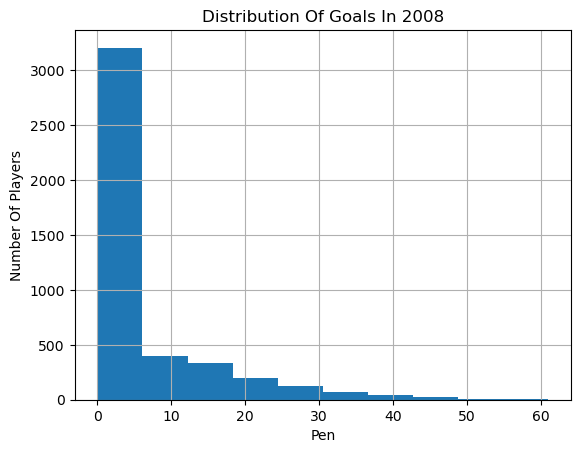

In [2011]:
df["penalties"].hist()
plt.xlabel('Pen') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Distribution Of Goals In 2008') # label for the whole plot

It's hard to score goals in the NHL! Lots of players with zero or close to it. There's a lot of players who don't play a lot of games, I'll take a look at games played next

Text(0.5, 1.0, 'Distribution Of Games Played in 2008')

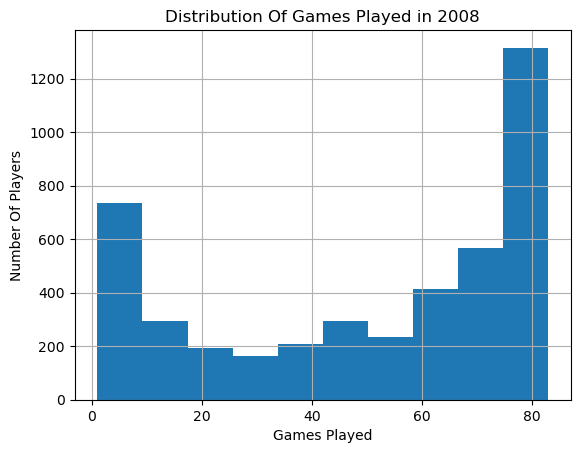

In [2012]:
df["games_played"].hist()
plt.xlabel('Games Played') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Distribution Of Games Played in 2008') # label for the whole plot

This is an odd distribution. Plenty of players playing all 82 and a lot not playing many at all. This actually makes sense. Most players don't have season ending inuries, so there won't be a lot with middle of the road games played. Also, player's that aren't very good won't play many games at all.

I'm curious to see what the penalty minutes per player looks like.

Text(0.5, 1.0, 'Penalty Minutes Distribution in 2008')

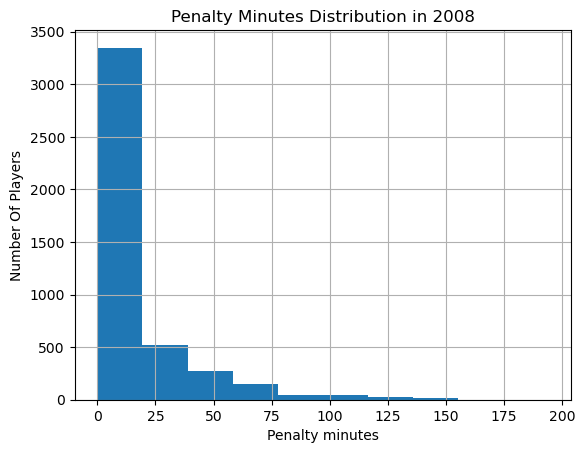

In [2013]:
df["penalityMinutes"].hist() # why did they spell it like this???
plt.xlabel('Penalty minutes') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Penalty Minutes Distribution in 2008') # label for the whole plot

Also interesting. I assumed this would be higher over all!

Moving on, since MoneyPuck uses this data for their services, it's pre-cleaned! I'm pretty happy about that, it means I can move right into feature engineering.

# Feature Engineering

## Offensive Features

Since my goal is to find the elite two way forwards and illuminate what makes them good, I'm going to have to create some statistics. There are two areas that I'm concerned with: offensive production and defensive prowess.

Offensive production is a bit straightforward. I can grab some basic statistics like goals and assists, while also adding in some data for shots, penalties, faceoffs and total goals.

Starting with goals, assists and secondary assists. These are how games are won. Getting more goals than the opposition results in a win and is THE most valuable skill in hockey. Assisting on a goal with a pass is a huge marker for offensive production. The best passers in the game can make something from nothing, so it gets included. I've also included what are called "secondary assists" which means I passed it to a player, who passed it to another player who shot and scored. I like this marker in here because it adds an extra dimension for those players who move the puck with passes, but might be further back on the ice in more of a defensive posture. 

#### points = ('I_F_goals' + 'I_F_primaryAssists' + 'I_F_secondaryAssists') 

Next, I'll make some room for total shots. A single shot may not result in a goal, but the more times your teams shoots the puck on net vs your opponent is a good measure of success. It's not the whole story, but outshooting your opponent will lead to better results over time, usually. I've added 'shotsBlockedByPlayer' here as well. Hockey players are crazy. A legitimate defensive strategy is for players to block opposing team's shots instead of just letting their goaltender handle it... The players that do this get lauded for their commitment. I've included it here as a way to express commitment to defense.

#### shots = ('I_F_shotsOnGoal' + 'shotsBlockedByPlayer')

Penalties are huge in hockey. The best teams score on a power play (when the opposing team is called for an infraction - a penalty) around 20-30% of the time. The best two way players play on both the power play and the reverse - the penalty kill. If they take themselves off the ice too often with infractions, they consistently put their team at a disadvantage. Converesely, if opposing players are taking penalties to contain them, that's a major benefit. I've expressed this as such.

#### penalties = ('penalityMinutesDrawn' - 'penalityMinutes')

(sidebar: this isn't how it's actually spelled. It's spelled 'penalty' I think moneypuck.com made an error on this dataset and decided it was easier to keep for ALL of their datasets rather than change it. Ugh.)


I'm including faceoffs in here as well. The faceoff is how a game starts and the event that occurs after every stoppage in the game. Two players line up at one of the various spots around the rink (there are 9 of them, and they're referred to as "dots") and a refereee drops the puck between them to start or restart play. If a player (typically a centre) wins the puck in this battle, they gain a significant advantage for their team. These events occur often, and not every players takes faceoffs. The "Centre" forward position usually takes these. Centres are usually tasked with playing on offense and defense, so most of the players I'm looking at finding will be centres.
The best centres win just above 50% of their draws, with 53-57% being wildly successful. I added this  as it represents a niche skill in hockey, but one with a high benefit to winning and a high cost to losing.

#### faceoffs = ('faceoffsWon' - 'faceoffsLost')

Finally, for offense I'm including total goals scored when this player is on the ice. The best two way forward affexct the game in ways that may not produce goals or assists, but they are consistently on the ice for more goals for their team , than against.

#### plus/minus = ('OnIce_F_Goals' - 'OnIce_A_Goals')

This grouping of stats is influenced by Dom Luszczyszyn and his "GameScore" metric. I've adapted it for my own use, but I've gained a lot of insight from reading his articles and I thought it was worth mentioning here. 

Article about the method and thinking behind it's creation is here: 
https://hockey-graphs.com/2016/07/13/measuring-single-game-productivity-an-introduction-to-game-score/

# Defensive Features

Next, I'll dig in to the defensive side of hockey. These statistics will be more micro-stats based and are a bit of untested waters. There aren't a lot of publicly available references to be able to draw influence from. I've taken several aspects of defensive play that I think are important and made statistics from them.

First, we'll talk about takeways and giveaways. The best two way players are responsible with the puck. They don't let opposing players take it from them easily and avoid errant passes or plays that result in a quick change of puck posession. They also work as hard as they can to take the puck away from the other team. Elite two way forwards excel at turning defense into offense. Stealing the puck from an opposing player at an opportune moment represents this aspect well.

#### puck responsibility = ('I_F_takeaways' - 'I_F_giveaways')

In the offensive statistics, I included total shots as a proxy for offesive success. Here, I've dialled this down to be a bit more specific. a "high danger shot" is one that occurs in specific circumstances. It's preceded by a pass, especially through some areas of the ice, or with movement from the goaltender before the shot. NHL defenders and goaltenders are very good at their jobs, so most chances in the game are not of the high danger variety. A player's ability to produce more of these chances than other teams represents the offensive production vs defensive prowess question well.

#### HDC = ('OnIce_F_highDangerShots' - 'OnIce_A_highDangerShots')

Following that, I'm including what are called "rebound goals". A rebound is when a player's shot bounces off of the goaltender and back onto the ice. Rebound goals are technically easy to score. The goaltender and defenders are scrambling to find the puck. If you can scoop it up and shoot it, there's a great chance it becomes a goal. There's a big problem here though. Opposition defenders work very hard to keep players from the areas that rebound goals come from. It's often a very physical contest, and from personal experince, can be very painful. Going to these areas, despite opposition is referred to as "paying the price". The best two way forward understand that paying this price is essential to producing offense, especially against excellent defenders. In my mind, it's a proxy for effort and toughness.

#### rebounds = ('OnIce_F_reboundGoals' - 'OnIce_A_reboundGoals')

The best two way forwards take defensive siutations and turn them into offensive opportunities. This next stat is called "puck transportation". It gives a positive value if a player starts his shift on the ice in the defensive zone and finishes in the offensive zone. This can be accomplished by skating with the puck themselves, passing it etc. I've added a negative for the times when a player starts his shift in the offensive zone and finishes on the defensive.

#### puck transportation = ('I_F_dZoneShiftStarts' - 'I_F_oZoneShiftStarts') +  ('I_F_oZoneShiftEnds' - 'I_F_dZoneShiftEnds') 
                   


This final stat groups some of these together. I've called "chance gradient" it gives a positve value if a player is creating more of all different types of chances. There are: low, medium and high.


#### chance gradient = ('OnIce_F_highDangerShots')) - ('OnIce_F_mediumDangerShots') -  ('OnIce_F_lowDangerShots') - ('OnIce_A_highDangerShots') -  ('OnIce_A_mediumDangerShots') - ('OnIce_A_lowDangerShots')
 
 This concludes my engineered features that I'll be working with!

Now that I've clarified why each engineered features belong, let's make some features!

In [2014]:
# make a copy that won't reflect changes on the original
skaters_copy = df.copy(deep=True)

In [2015]:
# it worked! 
skaters_copy.head()


playerId  season              name team position situation  games_played  \
0   8462196    2008  Stephane Robidas  DAL        D     other            72   
1   8462196    2008  Stephane Robidas  DAL        D       all            72   
2   8462196    2008  Stephane Robidas  DAL        D      5on5            72   
3   8462196    2008  Stephane Robidas  DAL        D      4on5            72   
4   8462196    2008  Stephane Robidas  DAL        D      5on4            72   

    icetime  shifts  gameScore  ...  OffIce_F_xGoals  OffIce_A_xGoals  \
0    6729.0   105.0      31.93  ...             6.79            12.11   
1  105958.0  2026.0      31.71  ...            95.61           116.39   
2   74053.0  1480.0      31.71  ...            66.29            74.66   
3   10397.0   235.0      30.26  ...             2.24            27.37   
4   14779.0   206.0      31.69  ...            19.15             1.47   

   OffIce_F_shotAttempts  OffIce_A_shotAttempts  xGoalsForAfterShifts  \
0                  106.0                  122.0                  0.14   
1                 2161.0                 2223.0                  0.00   
2                 1678.0                 1647.0                  3.64   
3                   57.0                  380.0                  0.15   
4                  294.0                   42.0                  0.13   

   xGoalsAgainstAfterShifts  corsiForAfterShifts  corsiAgainstAfterShifts  \
0                      0.00                  4.0                      0.0   
1                      0.00                  0.0                      0.0   
2                      0.18                 91.0                     10.0   
3                      0.00                  3.0                      0.0   
4                      0.00                  6.0                      0.0   

   fenwickForAfterShifts  fenwickAgainstAfterShifts  
0                    3.0                        0.0  
1                    0.0                        0.0  
2                   74.0                        8.0  
3                    3.0                        0.0  
4                    6.0                        0.0  

[5 rows x 154 columns]

Since my question is concerned with finding the best forwards, I'm dropping all defensemen from the dataframe

In [2016]:
# drop all defensemen from the copy
skaters_copy.drop(df.loc[skaters_copy['position']=='D'].index, inplace=True)

Next, I'm only going to concern myself with the "5v5" situation category for now. 5v5 is the defualt setting for hockey, both teams have all of their players. A "power play" would be 5v4 and a "penalty kill" would be 4v5. "Other" is a rarity (e.g 6v5 or 4v3). "All" might be a good statistic to go with, but I'll check if it has the stuff I need after this.

In [2017]:
# keep only 5v5 situation
skaters_copy[skaters_copy['situation'] == '5on5']

playerId  season               name team position situation  \
7      8470144    2008      Frans Nielsen  NYI        C      5on5   
22     8474091    2008     Brandon Sutter  CAR        C      5on5   
32     8471277    2008    Martins Karsums  T.B        R      5on5   
37     8459461    2008   Brendan Morrison  DAL        C      5on5   
42     8471234    2008      Wojtek Wolski  COL        L      5on5   
...        ...     ...                ...  ...      ...       ...   
4392   8470639    2008       Dan Fritsche  MIN        C      5on5   
4407   8465028    2008          Boyd Kane  PHI        L      5on5   
4412   8470358    2008  Alexandre Burrows  VAN        L      5on5   
4417   8474564    2008     Steven Stamkos  T.B        C      5on5   
4422   8470622    2008      Patrick Eaves  CAR        R      5on5   

      games_played  icetime  shifts  gameScore  ...  OffIce_F_xGoals  \
7               59  38706.0   896.0      32.70  ...            73.47   
22              50  19559.0   450.0       8.06  ...            80.67   
32              24  15665.0   374.0       6.11  ...            28.94   
37              81  54157.0  1140.0      31.50  ...           100.44   
42              78  61577.0  1334.0      32.88  ...            94.10   
...            ...      ...     ...        ...  ...              ...   
4392            50  29606.0   703.0       7.70  ...            63.27   
4407             1    492.0    10.0      -0.10  ...             0.95   
4412            81  62937.0  1450.0      58.69  ...            87.89   
4417            79  55257.0  1228.0      42.40  ...            96.38   
4422            74  41058.0   950.0      22.75  ...           110.64   

      OffIce_A_xGoals  OffIce_F_shotAttempts  OffIce_A_shotAttempts  \
7               84.18                 1790.0                 2160.0   
22              75.60                 1994.0                 1739.0   
32              32.08                  683.0                  739.0   
37              95.93                 2287.0                 2216.0   
42              91.89                 2158.0                 2392.0   
...               ...                    ...                    ...   
4392            71.29                 1592.0                 1620.0   
4407             0.78                   33.0                   30.0   
4412            96.37                 2015.0                 2215.0   
4417            96.84                 2140.0                 2337.0   
4422           108.53                 2666.0                 2443.0   

      xGoalsForAfterShifts  xGoalsAgainstAfterShifts  corsiForAfterShifts  \
7                     2.31                      1.46                 42.0   
22                    0.61                      0.28                 19.0   
32                    0.66                      0.45                  9.0   
37                    1.15                      1.05                 23.0   
42                    1.82                      1.90                 37.0   
...                    ...                       ...                  ...   
4392                  0.92                      1.23                 29.0   
4407                  0.00                      0.00                  0.0   
4412                  1.38                      1.98                 23.0   
4417                  0.66                      1.55                 19.0   
4422                  1.10                      0.76                 43.0   

      corsiAgainstAfterShifts  fenwickForAfterShifts  \
7                        42.0                   32.0   
22                       13.0                   17.0   
32                       14.0                    8.0   
37                       23.0                   22.0   
42                       48.0                   29.0   
...                       ...                    ...   
4392                     20.0                   26.0   
4407                      0.0                    0.0   
4412                     46.0 

To create these features, I'll need a for loop and iterrows. Here's my experiment to make sure I can do it at all.

In [2018]:
#m small amount of columns
small_df = skaters_copy[['OffIce_F_xGoals','OffIce_A_xGoals', 'OffIce_F_shotAttempts' , 'OffIce_A_shotAttempts']].copy()
small_df

OffIce_F_xGoals  OffIce_A_xGoals  OffIce_F_shotAttempts  \
5                6.87            16.44                  110.0   
6               97.84           136.48                 2199.0   
7               73.47            84.18                 1790.0   
8                4.12            27.78                   68.0   
9               11.07             1.76                  200.0   
...               ...              ...                    ...   
4420             7.03             6.09                   64.0   
4421           189.43           174.29                 3830.0   
4422           110.64           108.53                 2666.0   
4423             4.08            32.28                   59.0   
4424            25.44             3.71                  450.0   

      OffIce_A_shotAttempts  
5                     145.0  
6                    2860.0  
7                    2160.0  
8                     456.0  
9                      39.0  
...                     ...  
4420                   73.0  
4421                 3361.0  
4422                 2443.0  
4423                  514.0  
4424                   68.0  

[2900 rows x 4 columns]

In [2019]:
# test it
for ind, row in small_df.iterrows():
    small_df.loc[ind,"xGoals"]  = row['OffIce_F_xGoals'] + row['OffIce_A_xGoals']
    small_df.loc[ind,"ShotAttmepts"]  = row['OffIce_F_shotAttempts'] + row['OffIce_A_shotAttempts']

In [2020]:
# sanity check
small_df

OffIce_F_xGoals  OffIce_A_xGoals  OffIce_F_shotAttempts  \
5                6.87            16.44                  110.0   
6               97.84           136.48                 2199.0   
7               73.47            84.18                 1790.0   
8                4.12            27.78                   68.0   
9               11.07             1.76                  200.0   
...               ...              ...                    ...   
4420             7.03             6.09                   64.0   
4421           189.43           174.29                 3830.0   
4422           110.64           108.53                 2666.0   
4423             4.08            32.28                   59.0   
4424            25.44             3.71                  450.0   

      OffIce_A_shotAttempts  xGoals  ShotAttmepts  
5                     145.0   23.31         255.0  
6                    2860.0  234.32        5059.0  
7                    2160.0  157.65        3950.0  
8                     456.0   31.90         524.0  
9                      39.0   12.83         239.0  
...                     ...     ...           ...  
4420                   73.0   13.12         137.0  
4421                 3361.0  363.72        7191.0  
4422                 2443.0  219.17        5109.0  
4423                  514.0   36.36         573.0  
4424                   68.0   29.15         518.0  

[2900 rows x 6 columns]

It works! now to make a dataframe with all of the data I need.

I'll start with 0809_5on5

In [2021]:
# all column names, becasuse the names and capitalization is all over the place...
for col in skaters_copy.columns:
    print(col)

playerId
season
name
team
position
situation
games_played
icetime
shifts
gameScore
onIce_xGoalsPercentage
offIce_xGoalsPercentage
onIce_corsiPercentage
offIce_corsiPercentage
onIce_fenwickPercentage
offIce_fenwickPercentage
iceTimeRank
I_F_xOnGoal
I_F_xGoals
I_F_xRebounds
I_F_xFreeze
I_F_xPlayStopped
I_F_xPlayContinuedInZone
I_F_xPlayContinuedOutsideZone
I_F_flurryAdjustedxGoals
I_F_scoreVenueAdjustedxGoals
I_F_flurryScoreVenueAdjustedxGoals
I_F_primaryAssists
I_F_secondaryAssists
I_F_shotsOnGoal
I_F_missedShots
I_F_blockedShotAttempts
I_F_shotAttempts
I_F_points
I_F_goals
I_F_rebounds
I_F_reboundGoals
I_F_freeze
I_F_playStopped
I_F_playContinuedInZone
I_F_playContinuedOutsideZone
I_F_savedShotsOnGoal
I_F_savedUnblockedShotAttempts
penalties
I_F_penalityMinutes
I_F_faceOffsWon
I_F_hits
I_F_takeaways
I_F_giveaways
I_F_lowDangerShots
I_F_mediumDangerShots
I_F_highDangerShots
I_F_lowDangerxGoals
I_F_mediumDangerxGoals
I_F_highDangerxGoals
I_F_lowDangerGoals
I_F_mediumDangerGoals
I_F_highD

In [2022]:
# create first dataframe to work with
o8o9_5on5 = skaters_copy[['playerId','season','name','team','position', 'situation','I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 
                          'I_F_shotsOnGoal', 'shotsBlockedByPlayer','penalityMinutesDrawn',
                          'penalityMinutes','faceoffsWon','faceoffsLost',
                          'OnIce_F_goals','OnIce_A_goals',
                          'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                          'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                          'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                          'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                          'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots']].copy()
o8o9_5on5

playerId  season           name team position situation  I_F_goals  \
5      8470144    2008  Frans Nielsen  NYI        C     other        0.0   
6      8470144    2008  Frans Nielsen  NYI        C       all        9.0   
7      8470144    2008  Frans Nielsen  NYI        C      5on5        5.0   
8      8470144    2008  Frans Nielsen  NYI        C      4on5        1.0   
9      8470144    2008  Frans Nielsen  NYI        C      5on4        3.0   
...        ...     ...            ...  ...      ...       ...        ...   
4420   8470622    2008  Patrick Eaves  CAR        R     other        0.0   
4421   8470622    2008  Patrick Eaves  CAR        R       all        6.0   
4422   8470622    2008  Patrick Eaves  CAR        R      5on5        4.0   
4423   8470622    2008  Patrick Eaves  CAR        R      4on5        1.0   
4424   8470622    2008  Patrick Eaves  CAR        R      5on4        1.0   

      I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
5                    3.0                   1.0              5.0  ...   
6                   11.0                  13.0            101.0  ...   
7                    4.0                   4.0             66.0  ...   
8                    1.0                   0.0              7.0  ...   
9                    3.0                   7.0             22.0  ...   
...                  ...                   ...              ...  ...   
4420                 0.0                   0.0              2.0  ...   
4421                 4.0                   4.0            115.0  ...   
4422                 4.0                   4.0            105.0  ...   
4423                 0.0                   0.0              4.0  ...   
4424                 0.0                   0.0              3.0  ...   

      OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
5                      1.0                   1.0                  14.0   
6                     11.0                   9.0                 211.0   
7                      5.0                   5.0                 125.0   
8                      1.0                   1.0                  68.0   
9                      4.0                   2.0                   4.0   
...                    ...                   ...                   ...   
4420                   0.0                   0.0                   4.0   
4421                   5.0                   7.0                 153.0   
4422                   5.0                   4.0                  93.0   
4423                   0.0                   3.0                  52.0   
4424                   0.0                   0.0                   4.0   

      I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
5                     23.0                 7.0                 5.0   
6                    243.0               147.0               195.0   
7                    112.0               108.0               145.0   
8                      3.0                 8.0                35.0   
9                    105.0                24.0                10.0   
...                    ...                 ...                 ...   
4420                   2.0                 4.0                 6.0   
4421                 122.0               189.0               179.0   
4422                 108.0               157.0               126.0   
4423                   2.0                17.0                41.0   
4424                  10.0                11.0                 6.0   

      OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
5                           9.0                    40.0   
6                         128.0                   594.0   
7                          66.0                   371.0   
8                           9.0                    18.0   
9                          44.0                   163.0   
...                         ...                     ...   
4420                        0.0                     5.0   
4421                      

In [2023]:
# need to drop 5on4, 4on 5, all, and other situations
o8o9_5on5_df = pd.Dataframe = o8o9_5on5[o8o9_5on5['situation'] == '5on5']
o8o9_5on5_df

playerId  season               name team position situation  I_F_goals  \
7      8470144    2008      Frans Nielsen  NYI        C      5on5        5.0   
22     8474091    2008     Brandon Sutter  CAR        C      5on5        0.0   
32     8471277    2008    Martins Karsums  T.B        R      5on5        1.0   
37     8459461    2008   Brendan Morrison  DAL        C      5on5       13.0   
42     8471234    2008      Wojtek Wolski  COL        L      5on5       10.0   
...        ...     ...                ...  ...      ...       ...        ...   
4392   8470639    2008       Dan Fritsche  MIN        C      5on5        2.0   
4407   8465028    2008          Boyd Kane  PHI        L      5on5        0.0   
4412   8470358    2008  Alexandre Burrows  VAN        L      5on5       20.0   
4417   8474564    2008     Steven Stamkos  T.B        C      5on5       13.0   
4422   8470622    2008      Patrick Eaves  CAR        R      5on5        4.0   

      I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
7                    4.0                   4.0             66.0  ...   
22                   3.0                   2.0             51.0  ...   
32                   3.0                   0.0             28.0  ...   
37                   7.0                   3.0             88.0  ...   
42                  11.0                   5.0            122.0  ...   
...                  ...                   ...              ...  ...   
4392                 4.0                   2.0             48.0  ...   
4407                 0.0                   0.0              0.0  ...   
4412                10.0                  10.0            144.0  ...   
4417                 8.0                   6.0            116.0  ...   
4422                 4.0                   4.0            105.0  ...   

      OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
7                      5.0                   5.0                 125.0   
22                     3.0                   4.0                  34.0   
32                     1.0                   1.0                  50.0   
37                     6.0                   9.0                 100.0   
42                     7.0                   7.0                 138.0   
...                    ...                   ...                   ...   
4392                   1.0                   3.0                  55.0   
4407                   0.0                   0.0                   0.0   
4412                   8.0                   8.0                 179.0   
4417                   6.0                   5.0                  57.0   
4422                   5.0                   4.0                  93.0   

      I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
7                    112.0               108.0               145.0   
22                    56.0                92.0                56.0   
32                    34.0                62.0                42.0   
37                   156.0               205.0               200.0   
42                   155.0               212.0               177.0   
...                    ...                 ...                 ...   
4392                  58.0               105.0               105.0   
4407                   0.0                 1.0                 2.0   
4412                 154.0               257.0               197.0   
4417                 130.0               153.0               246.0   
4422                 108.0               157.0               126.0   

      OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
7                          66.0                   371.0   
22                         29.0                   193.0   
32                         32.0                   120.0   
37                         88.0                   488.0   
42                        118.0                   475.0   
...                         ...                     ...   
4392                       52.0      

In [2024]:
# drop the defensemen
df.drop(o8o9_5on5_df[(o8o9_5on5_df['position'] == 'D')].index, inplace=True)

In [2025]:
# it worked! note the lack of position "D" in the below columns
o8o9_5on5_df

playerId  season               name team position situation  I_F_goals  \
7      8470144    2008      Frans Nielsen  NYI        C      5on5        5.0   
22     8474091    2008     Brandon Sutter  CAR        C      5on5        0.0   
32     8471277    2008    Martins Karsums  T.B        R      5on5        1.0   
37     8459461    2008   Brendan Morrison  DAL        C      5on5       13.0   
42     8471234    2008      Wojtek Wolski  COL        L      5on5       10.0   
...        ...     ...                ...  ...      ...       ...        ...   
4392   8470639    2008       Dan Fritsche  MIN        C      5on5        2.0   
4407   8465028    2008          Boyd Kane  PHI        L      5on5        0.0   
4412   8470358    2008  Alexandre Burrows  VAN        L      5on5       20.0   
4417   8474564    2008     Steven Stamkos  T.B        C      5on5       13.0   
4422   8470622    2008      Patrick Eaves  CAR        R      5on5        4.0   

      I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
7                    4.0                   4.0             66.0  ...   
22                   3.0                   2.0             51.0  ...   
32                   3.0                   0.0             28.0  ...   
37                   7.0                   3.0             88.0  ...   
42                  11.0                   5.0            122.0  ...   
...                  ...                   ...              ...  ...   
4392                 4.0                   2.0             48.0  ...   
4407                 0.0                   0.0              0.0  ...   
4412                10.0                  10.0            144.0  ...   
4417                 8.0                   6.0            116.0  ...   
4422                 4.0                   4.0            105.0  ...   

      OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
7                      5.0                   5.0                 125.0   
22                     3.0                   4.0                  34.0   
32                     1.0                   1.0                  50.0   
37                     6.0                   9.0                 100.0   
42                     7.0                   7.0                 138.0   
...                    ...                   ...                   ...   
4392                   1.0                   3.0                  55.0   
4407                   0.0                   0.0                   0.0   
4412                   8.0                   8.0                 179.0   
4417                   6.0                   5.0                  57.0   
4422                   5.0                   4.0                  93.0   

      I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
7                    112.0               108.0               145.0   
22                    56.0                92.0                56.0   
32                    34.0                62.0                42.0   
37                   156.0               205.0               200.0   
42                   155.0               212.0               177.0   
...                    ...                 ...                 ...   
4392                  58.0               105.0               105.0   
4407                   0.0                 1.0                 2.0   
4412                 154.0               257.0               197.0   
4417                 130.0               153.0               246.0   
4422                 108.0               157.0               126.0   

      OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
7                          66.0                   371.0   
22                         29.0                   193.0   
32                         32.0                   120.0   
37                         88.0                   488.0   
42                        118.0                   475.0   
...                         ...                     ...   
4392                       52.0      

In [2026]:
# drop position and situation, not needed since there's only one position and situation
o8o9_5on5_df.drop(columns = 'position', inplace = True)
o8o9_5on5_df.drop(columns = 'situation', inplace = True)
o8o9_5on5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 7 to 4422
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playerId                   580 non-null    int64  
 1   season                     580 non-null    int64  
 2   name                       580 non-null    object 
 3   team                       580 non-null    object 
 4   I_F_goals                  580 non-null    float64
 5   I_F_primaryAssists         580 non-null    float64
 6   I_F_secondaryAssists       580 non-null    float64
 7   I_F_shotsOnGoal            580 non-null    float64
 8   shotsBlockedByPlayer       580 non-null    float64
 9   penalityMinutesDrawn       580 non-null    float64
 10  penalityMinutes            580 non-null    float64
 11  faceoffsWon                580 non-null    float64
 12  faceoffsLost               580 non-null    float64
 13  OnIce_F_goals              580 non-null    float6

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1792928533.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1792928533.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now that I have my dataframe I can begin running my for loops for the coefficients 

After that, I'll run the for loop for the equations!

In [2027]:
# sanity check
o8o9_5on5_df

playerId  season               name team  I_F_goals  I_F_primaryAssists  \
7      8470144    2008      Frans Nielsen  NYI        5.0                 4.0   
22     8474091    2008     Brandon Sutter  CAR        0.0                 3.0   
32     8471277    2008    Martins Karsums  T.B        1.0                 3.0   
37     8459461    2008   Brendan Morrison  DAL       13.0                 7.0   
42     8471234    2008      Wojtek Wolski  COL       10.0                11.0   
...        ...     ...                ...  ...        ...                 ...   
4392   8470639    2008       Dan Fritsche  MIN        2.0                 4.0   
4407   8465028    2008          Boyd Kane  PHI        0.0                 0.0   
4412   8470358    2008  Alexandre Burrows  VAN       20.0                10.0   
4417   8474564    2008     Steven Stamkos  T.B       13.0                 8.0   
4422   8470622    2008      Patrick Eaves  CAR        4.0                 4.0   

      I_F_secondaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
7                      4.0             66.0                  30.0   
22                     2.0             51.0                   8.0   
32                     0.0             28.0                  12.0   
37                     3.0             88.0                  11.0   
42                     5.0            122.0                  25.0   
...                    ...              ...                   ...   
4392                   2.0             48.0                   8.0   
4407                   0.0              0.0                   1.0   
4412                  10.0            144.0                  21.0   
4417                   6.0            116.0                  13.0   
4422                   4.0            105.0                  17.0   

      penalityMinutesDrawn  ...  OnIce_F_reboundGoals  OnIce_A_reboundGoals  \
7                     43.0  ...                   5.0                   5.0   
22                    26.0  ...                   3.0                   4.0   
32                    10.0  ...                   1.0                   1.0   
37                    26.0  ...                   6.0                   9.0   
42                    30.0  ...                   7.0                   7.0   
...                    ...  ...                   ...                   ...   
4392                  10.0  ...                   1.0                   3.0   
4407                   0.0  ...                   0.0                   0.0   
4412                  94.0  ...                   8.0                   8.0   
4417                  49.0  ...                   6.0                   5.0   
4422                  35.0  ...                   5.0                   4.0   

      I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
7                    125.0                 112.0               108.0   
22                    34.0                  56.0                92.0   
32                    50.0                  34.0                62.0   
37                   100.0                 156.0               205.0   
42                   138.0                 155.0               212.0   
...                    ...                   ...                 ...   
4392                  55.0                  58.0               105.0   
4407                   0.0                   0.0                 1.0   
4412                 179.0                 154.0               257.0   
4417                  57.0                 130.0               153.0   
4422                  93.0                 108.0               157.0   

      I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
7                  145.0                       66.0                   371.0   
22                  56.0                       29.0                   193.0   
32                  42.0                       32.0                   120.0   
37                 200.0                       88.0                   488.

Here's where I create my engineered features! I'm curious to see if they can help illuminate player performace in a meaningful way.

In [2028]:
# add/subtract columns to create new statistics
for ind, row in  o8o9_5on5_df.iterrows():
     o8o9_5on5_df.loc[ind,"points"]  = row['I_F_goals'] + row['I_F_primaryAssists'] + row['I_F_secondaryAssists']
     o8o9_5on5_df.loc[ind,"shots"]  = row['I_F_shotsOnGoal'] + row['shotsBlockedByPlayer'] 
     o8o9_5on5_df.loc[ind,"penalties"]  = row['penalityMinutesDrawn'] + row['penalityMinutes'] 
     o8o9_5on5_df.loc[ind,"faceoffs"]  = row['faceoffsWon'] - row['faceoffsLost'] 
     o8o9_5on5_df.loc[ind,"plus/minus"]  = row['OnIce_F_goals'] - row['OnIce_A_goals']  
     o8o9_5on5_df.loc[ind,"puck responsibility"]  = row['I_F_takeaways'] - row['I_F_giveaways'] 
     o8o9_5on5_df.loc[ind,"HDC"]  = row['OnIce_F_highDangerShots'] + row['OnIce_A_highDangerShots'] 
     o8o9_5on5_df.loc[ind,"rebounds"]  = row['OnIce_F_reboundGoals'] + row['OnIce_A_reboundGoals'] 
     o8o9_5on5_df.loc[ind,"puck transportation"]  = row['I_F_dZoneShiftStarts'] - row['I_F_oZoneShiftStarts'] + row['I_F_oZoneShiftEnds'] - row['I_F_dZoneShiftEnds'] 
     o8o9_5on5_df.loc[ind,"chance gradient"]  = row['OnIce_F_highDangerShots'] + row['OnIce_F_mediumDangerShots'] + row['OnIce_F_lowDangerShots'] - row['OnIce_A_highDangerShots'] -   row['OnIce_A_mediumDangerShots'] - row['OnIce_A_lowDangerShots']  
                                             

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2466242764.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2466242764.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2466242764.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [2029]:
# sanity check
o8o9_5on5_df

playerId  season               name team  I_F_goals  I_F_primaryAssists  \
7      8470144    2008      Frans Nielsen  NYI        5.0                 4.0   
22     8474091    2008     Brandon Sutter  CAR        0.0                 3.0   
32     8471277    2008    Martins Karsums  T.B        1.0                 3.0   
37     8459461    2008   Brendan Morrison  DAL       13.0                 7.0   
42     8471234    2008      Wojtek Wolski  COL       10.0                11.0   
...        ...     ...                ...  ...        ...                 ...   
4392   8470639    2008       Dan Fritsche  MIN        2.0                 4.0   
4407   8465028    2008          Boyd Kane  PHI        0.0                 0.0   
4412   8470358    2008  Alexandre Burrows  VAN       20.0                10.0   
4417   8474564    2008     Steven Stamkos  T.B       13.0                 8.0   
4422   8470622    2008      Patrick Eaves  CAR        4.0                 4.0   

      I_F_secondaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
7                      4.0             66.0                  30.0   
22                     2.0             51.0                   8.0   
32                     0.0             28.0                  12.0   
37                     3.0             88.0                  11.0   
42                     5.0            122.0                  25.0   
...                    ...              ...                   ...   
4392                   2.0             48.0                   8.0   
4407                   0.0              0.0                   1.0   
4412                  10.0            144.0                  21.0   
4417                   6.0            116.0                  13.0   
4422                   4.0            105.0                  17.0   

      penalityMinutesDrawn  ...  points  shots  penalties  faceoffs  \
7                     43.0  ...    13.0   96.0       55.0     -39.0   
22                    26.0  ...     5.0   59.0       42.0     -30.0   
32                    10.0  ...     4.0   40.0       16.0       0.0   
37                    26.0  ...    23.0   99.0       52.0     -22.0   
42                    30.0  ...    26.0  147.0       48.0     -18.0   
...                    ...  ...     ...    ...        ...       ...   
4392                  10.0  ...     8.0   56.0       22.0      -8.0   
4407                   0.0  ...     0.0    1.0        0.0       0.0   
4412                  94.0  ...    40.0  165.0      202.0      -3.0   
4417                  49.0  ...    27.0  129.0       80.0     -51.0   
4422                  35.0  ...    12.0  122.0       60.0      -2.0   

      plus/minus  puck responsibility   HDC  rebounds  puck transportation  \
7           -4.0                 13.0  45.0      10.0                -24.0   
22          -2.0                  9.0  22.0       7.0                 14.0   
32          -5.0                  1.0   6.0       2.0                 36.0   
37           9.0                 -7.0  44.0      15.0                -51.0   
42         -10.0                 18.0  48.0      14.0                 18.0   
...          ...                  ...   ...       ...                  ...   
4392        -8.0                 -4.0  15.0       4.0                 -3.0   
4407         0.0                  0.0   0.0       0.0                 -1.0   
4412        15.0                 26.0  55.0      16.0                 85.0   
4417        -5.0                 21.0  40.0      11.0               -166.0   
4422         8.0                 13.0  42.0       9.0                 16.0   

      chance gradient  
7               -26.0  
22                4.0  
32               -4.0  
37               -9.0  
42             -124.0  
...               ...  
4392            -88.0  
4407             -2.0  
4412             67.0  
4417            -86.0  
4422             19.0  

[580 rows x 39 columns]

Now that I have these new features, I'll aggregate them into some more features. I'm calling them "offensive score" and "defensive score". Very original. This will give anyone looking a quick look at the values, without digging too much into my engineered features.

In [2030]:
# create offensive score and defensive score
for ind, row in  o8o9_5on5_df.iterrows():
     o8o9_5on5_df.loc[ind,"off_score"]  = row['points'] + row['shots'] + row['penalties'] + row['faceoffs'] + row['plus/minus']
     o8o9_5on5_df.loc[ind,"def_score"]  = row['puck responsibility'] + row['HDC'] + row['rebounds'] + row['puck transportation'] + row['chance gradient']   

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1321152893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1321152893.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2031]:
o8o9_5on5_df

playerId  season               name team  I_F_goals  I_F_primaryAssists  \
7      8470144    2008      Frans Nielsen  NYI        5.0                 4.0   
22     8474091    2008     Brandon Sutter  CAR        0.0                 3.0   
32     8471277    2008    Martins Karsums  T.B        1.0                 3.0   
37     8459461    2008   Brendan Morrison  DAL       13.0                 7.0   
42     8471234    2008      Wojtek Wolski  COL       10.0                11.0   
...        ...     ...                ...  ...        ...                 ...   
4392   8470639    2008       Dan Fritsche  MIN        2.0                 4.0   
4407   8465028    2008          Boyd Kane  PHI        0.0                 0.0   
4412   8470358    2008  Alexandre Burrows  VAN       20.0                10.0   
4417   8474564    2008     Steven Stamkos  T.B       13.0                 8.0   
4422   8470622    2008      Patrick Eaves  CAR        4.0                 4.0   

      I_F_secondaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
7                      4.0             66.0                  30.0   
22                     2.0             51.0                   8.0   
32                     0.0             28.0                  12.0   
37                     3.0             88.0                  11.0   
42                     5.0            122.0                  25.0   
...                    ...              ...                   ...   
4392                   2.0             48.0                   8.0   
4407                   0.0              0.0                   1.0   
4412                  10.0            144.0                  21.0   
4417                   6.0            116.0                  13.0   
4422                   4.0            105.0                  17.0   

      penalityMinutesDrawn  ...  penalties  faceoffs  plus/minus  \
7                     43.0  ...       55.0     -39.0        -4.0   
22                    26.0  ...       42.0     -30.0        -2.0   
32                    10.0  ...       16.0       0.0        -5.0   
37                    26.0  ...       52.0     -22.0         9.0   
42                    30.0  ...       48.0     -18.0       -10.0   
...                    ...  ...        ...       ...         ...   
4392                  10.0  ...       22.0      -8.0        -8.0   
4407                   0.0  ...        0.0       0.0         0.0   
4412                  94.0  ...      202.0      -3.0        15.0   
4417                  49.0  ...       80.0     -51.0        -5.0   
4422                  35.0  ...       60.0      -2.0         8.0   

      puck responsibility   HDC  rebounds  puck transportation  \
7                    13.0  45.0      10.0                -24.0   
22                    9.0  22.0       7.0                 14.0   
32                    1.0   6.0       2.0                 36.0   
37                   -7.0  44.0      15.0                -51.0   
42                   18.0  48.0      14.0                 18.0   
...                   ...   ...       ...                  ...   
4392                 -4.0  15.0       4.0                 -3.0   
4407                  0.0   0.0       0.0                 -1.0   
4412                 26.0  55.0      16.0                 85.0   
4417                 21.0  40.0      11.0               -166.0   
4422                 13.0  42.0       9.0                 16.0   

      chance gradient  off_score  def_score  
7               -26.0      121.0       18.0  
22                4.0       74.0       56.0  
32               -4.0       55.0       41.0  
37               -9.0      161.0       -8.0  
42             -124.0      193.0      -26.0  
...               ...        ...        ...  
4392            -88.0       70.0      -76.0  
4407             -2.0        1.0       -3.0  
4412             67.0      419.0      249.0  
4417            -86.0      180.0     -180.0  
4422             19.0      200.0       99.0  

[580 rows x 41 columns]

Finally, i'm creating a catch all metric for two way forwards called "two_way_score". This is another quick look at what a player provides

In [2032]:
# create final metric, two way score!
for ind, row in  o8o9_5on5_df.iterrows():
     o8o9_5on5_df.loc[ind,"two_way_score"]  = row['off_score'] + row['def_score']

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2362001893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2033]:
o8o9_5on5_df

playerId  season               name team  I_F_goals  I_F_primaryAssists  \
7      8470144    2008      Frans Nielsen  NYI        5.0                 4.0   
22     8474091    2008     Brandon Sutter  CAR        0.0                 3.0   
32     8471277    2008    Martins Karsums  T.B        1.0                 3.0   
37     8459461    2008   Brendan Morrison  DAL       13.0                 7.0   
42     8471234    2008      Wojtek Wolski  COL       10.0                11.0   
...        ...     ...                ...  ...        ...                 ...   
4392   8470639    2008       Dan Fritsche  MIN        2.0                 4.0   
4407   8465028    2008          Boyd Kane  PHI        0.0                 0.0   
4412   8470358    2008  Alexandre Burrows  VAN       20.0                10.0   
4417   8474564    2008     Steven Stamkos  T.B       13.0                 8.0   
4422   8470622    2008      Patrick Eaves  CAR        4.0                 4.0   

      I_F_secondaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
7                      4.0             66.0                  30.0   
22                     2.0             51.0                   8.0   
32                     0.0             28.0                  12.0   
37                     3.0             88.0                  11.0   
42                     5.0            122.0                  25.0   
...                    ...              ...                   ...   
4392                   2.0             48.0                   8.0   
4407                   0.0              0.0                   1.0   
4412                  10.0            144.0                  21.0   
4417                   6.0            116.0                  13.0   
4422                   4.0            105.0                  17.0   

      penalityMinutesDrawn  ...  faceoffs  plus/minus  puck responsibility  \
7                     43.0  ...     -39.0        -4.0                 13.0   
22                    26.0  ...     -30.0        -2.0                  9.0   
32                    10.0  ...       0.0        -5.0                  1.0   
37                    26.0  ...     -22.0         9.0                 -7.0   
42                    30.0  ...     -18.0       -10.0                 18.0   
...                    ...  ...       ...         ...                  ...   
4392                  10.0  ...      -8.0        -8.0                 -4.0   
4407                   0.0  ...       0.0         0.0                  0.0   
4412                  94.0  ...      -3.0        15.0                 26.0   
4417                  49.0  ...     -51.0        -5.0                 21.0   
4422                  35.0  ...      -2.0         8.0                 13.0   

       HDC  rebounds  puck transportation  chance gradient  off_score  \
7     45.0      10.0                -24.0            -26.0      121.0   
22    22.0       7.0                 14.0              4.0       74.0   
32     6.0       2.0                 36.0             -4.0       55.0   
37    44.0      15.0                -51.0             -9.0      161.0   
42    48.0      14.0                 18.0           -124.0      193.0   
...    ...       ...                  ...              ...        ...   
4392  15.0       4.0                 -3.0            -88.0       70.0   
4407   0.0       0.0                 -1.0             -2.0        1.0   
4412  55.0      16.0                 85.0             67.0      419.0   
4417  40.0      11.0               -166.0            -86.0      180.0   
4422  42.0       9.0                 16.0             19.0      200.0   

      def_score  two_way_score  
7          18.0          139.0  
22         56.0          130.0  
32         41.0           96.0  
37         -8.0          153.0  
42        -26.0          167.0  
...         ...            ...  
4392      -76.0           -6.0  
4407       -3.0           -2.0  
4412      249.0          668.0  
4417     -180.0            0.0  
4422       99.0          29

Now that I have this dataframe, I'll start to check on how it looks

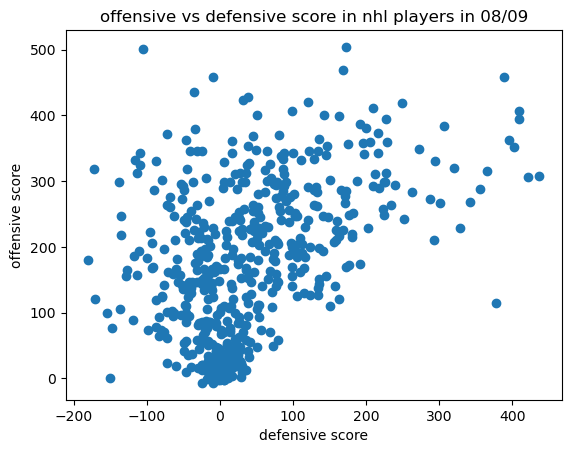

In [2034]:
plt.figure()
plt.scatter(o8o9_5on5_df['def_score'],o8o9_5on5_df["off_score"])
plt.xlabel('defensive score') # add a label for the x-axis
plt.ylabel('offensive score')         # add a label for the y-axis
plt.title('offensive vs defensive score in nhl players in 08/09') # label for the whole plot
plt.show()

Awesome! this shows a pretty clear distribution. There are plenty of players grouped at the bottom of the chart, some of them are even negatives! Lots to do to get this cleaned up, but I see this as an absolute win!

In [2042]:
# try a plotly chart to see if I've got something
fig = px.scatter(
        data_frame=o8o9_5on5_df,
        x="def_score",
        y="off_score",
        hover_data=["name"],labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Distribution Of Players And Selke Award Winner")
fig.add_scatter(x=[409], 
                y=[395],
                name= "Pavel Datsyuk", 
                mode="markers",
                marker=dict(size=10,opacity=1, color="Red"))
fig.show()

I like this plot a bit better. Being able to have the names in there gives some context. The NHL awards a trophy every year for the type of player I'm looking for called the "Frank J Selke" trophy for Best Defensive Forward. I've highlited that point in red. Seeing it in the top right, high in both offensive and defensive score is a good sign!

# 4v5 Dataframe

I'd like to check out the other "situations" in this first dataframe to see if I'd like to add it into the 5v5 dataframe. I'm assuming that there are less players in this segment, since not all players play in the 4v5 situation.  It's usually called the "penalty kill". 

A penalty occurs when a player commits an infraction of various types. The offending player will be sent to the penalty box if the infraction is minor, or can be sent out of the game entirely if the infraction is sevee.

The type of players who are usually deployed in this scenario typically have less offesive skill or aptitude. They do excel at defending, however. Having a good penalty kill is crucial for a team to succeed. Your opposition will put out their best offensive players to try and caitalize on the numbers imbalance.

Having a penalty kill success rate of above 80% is considered good, with the best penalty killing team (Carolina Hurricanes) having an 88% success rate in 2021. 

In [2043]:
# olny the columns I need
o8o9_4on5 = skaters_copy[['playerId','season','name','team','position', 'situation','I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 
                          'I_F_shotsOnGoal', 'shotsBlockedByPlayer','penalityMinutesDrawn',
                          'penalityMinutes','faceoffsWon','faceoffsLost',
                          'onIce_corsiPercentage','OnIce_F_goals','OnIce_A_goals',
                          'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                          'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                          'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                          'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                          'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots']].copy()
o8o9_4on5

playerId  season           name team position situation  I_F_goals  \
5      8470144    2008  Frans Nielsen  NYI        C     other        0.0   
6      8470144    2008  Frans Nielsen  NYI        C       all        9.0   
7      8470144    2008  Frans Nielsen  NYI        C      5on5        5.0   
8      8470144    2008  Frans Nielsen  NYI        C      4on5        1.0   
9      8470144    2008  Frans Nielsen  NYI        C      5on4        3.0   
...        ...     ...            ...  ...      ...       ...        ...   
4420   8470622    2008  Patrick Eaves  CAR        R     other        0.0   
4421   8470622    2008  Patrick Eaves  CAR        R       all        6.0   
4422   8470622    2008  Patrick Eaves  CAR        R      5on5        4.0   
4423   8470622    2008  Patrick Eaves  CAR        R      4on5        1.0   
4424   8470622    2008  Patrick Eaves  CAR        R      5on4        1.0   

      I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
5                    3.0                   1.0              5.0  ...   
6                   11.0                  13.0            101.0  ...   
7                    4.0                   4.0             66.0  ...   
8                    1.0                   0.0              7.0  ...   
9                    3.0                   7.0             22.0  ...   
...                  ...                   ...              ...  ...   
4420                 0.0                   0.0              2.0  ...   
4421                 4.0                   4.0            115.0  ...   
4422                 4.0                   4.0            105.0  ...   
4423                 0.0                   0.0              4.0  ...   
4424                 0.0                   0.0              3.0  ...   

      OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
5                      1.0                   1.0                  14.0   
6                     11.0                   9.0                 211.0   
7                      5.0                   5.0                 125.0   
8                      1.0                   1.0                  68.0   
9                      4.0                   2.0                   4.0   
...                    ...                   ...                   ...   
4420                   0.0                   0.0                   4.0   
4421                   5.0                   7.0                 153.0   
4422                   5.0                   4.0                  93.0   
4423                   0.0                   3.0                  52.0   
4424                   0.0                   0.0                   4.0   

      I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
5                     23.0                 7.0                 5.0   
6                    243.0               147.0               195.0   
7                    112.0               108.0               145.0   
8                      3.0                 8.0                35.0   
9                    105.0                24.0                10.0   
...                    ...                 ...                 ...   
4420                   2.0                 4.0                 6.0   
4421                 122.0               189.0               179.0   
4422                 108.0               157.0               126.0   
4423                   2.0                17.0                41.0   
4424                  10.0                11.0                 6.0   

      OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
5                           9.0                    40.0   
6                         128.0                   594.0   
7                          66.0                   371.0   
8                           9.0                    18.0   
9                          44.0                   163.0   
...                         ...                     ...   
4420                        0.0                     5.0   
4421                      

In [2044]:
# need to drop 5on4, 5on5, all, and other situations
o8o9_4on5_df = pd.Dataframe = o8o9_4on5[o8o9_4on5['situation'] == '4on5']
o8o9_4on5_df

playerId  season               name team position situation  I_F_goals  \
8      8470144    2008      Frans Nielsen  NYI        C      4on5        1.0   
23     8474091    2008     Brandon Sutter  CAR        C      4on5        0.0   
33     8471277    2008    Martins Karsums  T.B        R      4on5        0.0   
38     8459461    2008   Brendan Morrison  DAL        C      4on5        0.0   
43     8471234    2008      Wojtek Wolski  COL        L      4on5        1.0   
...        ...     ...                ...  ...      ...       ...        ...   
4393   8470639    2008       Dan Fritsche  MIN        C      4on5        1.0   
4408   8465028    2008          Boyd Kane  PHI        L      4on5        0.0   
4413   8470358    2008  Alexandre Burrows  VAN        L      4on5        4.0   
4418   8474564    2008     Steven Stamkos  T.B        C      4on5        0.0   
4423   8470622    2008      Patrick Eaves  CAR        R      4on5        1.0   

      I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
8                    1.0                   0.0              7.0  ...   
23                   0.0                   0.0              3.0  ...   
33                   0.0                   0.0              0.0  ...   
38                   0.0                   0.0              0.0  ...   
43                   0.0                   0.0              8.0  ...   
...                  ...                   ...              ...  ...   
4393                 0.0                   0.0              3.0  ...   
4408                 0.0                   0.0              0.0  ...   
4413                 1.0                   0.0             16.0  ...   
4418                 0.0                   0.0              1.0  ...   
4423                 0.0                   0.0              4.0  ...   

      OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
8                      1.0                   1.0                  68.0   
23                     0.0                   3.0                  67.0   
33                     0.0                   0.0                   0.0   
38                     0.0                   0.0                  18.0   
43                     0.0                   0.0                  79.0   
...                    ...                   ...                   ...   
4393                   0.0                   0.0                   6.0   
4408                   0.0                   0.0                   0.0   
4413                   1.0                   4.0                 126.0   
4418                   0.0                   0.0                   0.0   
4423                   0.0                   3.0                  52.0   

      I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
8                      3.0                 8.0                35.0   
23                     2.0                 8.0                20.0   
33                     1.0                 0.0                 1.0   
38                     1.0                 5.0                19.0   
43                     3.0                11.0                40.0   
...                    ...                 ...                 ...   
4393                   1.0                 2.0                 9.0   
4408                   0.0                 0.0                 0.0   
4413                   4.0                21.0                53.0   
4418                   1.0                 1.0                 7.0   
4423                   2.0                17.0                41.0   

      OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
8                           9.0                    18.0   
23                          3.0                     9.0   
33                          0.0                     0.0   
38                          0.0                     2.0   
43                          4.0                    19.0   
...                         ...                     ...   
4393                        1.0      

In [2045]:
# drop defensemen from the df
df.drop(o8o9_4on5_df[(o8o9_4on5_df['position'] == 'D')].index, inplace=True)
o8o9_4on5_df.head()

playerId  season              name team position situation  I_F_goals  \
8    8470144    2008     Frans Nielsen  NYI        C      4on5        1.0   
23   8474091    2008    Brandon Sutter  CAR        C      4on5        0.0   
33   8471277    2008   Martins Karsums  T.B        R      4on5        0.0   
38   8459461    2008  Brendan Morrison  DAL        C      4on5        0.0   
43   8471234    2008     Wojtek Wolski  COL        L      4on5        1.0   

    I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
8                  1.0                   0.0              7.0  ...   
23                 0.0                   0.0              3.0  ...   
33                 0.0                   0.0              0.0  ...   
38                 0.0                   0.0              0.0  ...   
43                 0.0                   0.0              8.0  ...   

    OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
8                    1.0                   1.0                  68.0   
23                   0.0                   3.0                  67.0   
33                   0.0                   0.0                   0.0   
38                   0.0                   0.0                  18.0   
43                   0.0                   0.0                  79.0   

    I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
8                    3.0                 8.0                35.0   
23                   2.0                 8.0                20.0   
33                   1.0                 0.0                 1.0   
38                   1.0                 5.0                19.0   
43                   3.0                11.0                40.0   

    OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
8                         9.0                    18.0   
23                        3.0                     9.0   
33                        0.0                     0.0   
38                        0.0                     2.0   
43                        4.0                    19.0   

    OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
8                        21.0                    97.0  
23                       19.0                    90.0  
33                        1.0                     1.0  
38                        8.0                    34.0  
43                       27.0                   117.0  

[5 rows x 32 columns]

In [2046]:
# add/subtract columns to create new statistics
for ind, row in  o8o9_4on5_df.iterrows():
     o8o9_4on5_df.loc[ind,"points"]  = row['I_F_goals'] + row['I_F_primaryAssists'] + row['I_F_secondaryAssists']
     o8o9_4on5_df.loc[ind,"shots"]  = row['I_F_shotsOnGoal'] + row['shotsBlockedByPlayer'] 
     o8o9_4on5_df.loc[ind,"penalties"]  = row['penalityMinutesDrawn'] + row['penalityMinutes'] 
     o8o9_4on5_df.loc[ind,"faceoffs"]  = row['faceoffsWon'] - row['faceoffsLost'] 
     o8o9_4on5_df.loc[ind,"plus/minus"]  = row['OnIce_F_goals'] - row['OnIce_A_goals']  
     o8o9_4on5_df.loc[ind,"puck responsibility"]  = row['I_F_takeaways'] - row['I_F_giveaways'] 
     o8o9_4on5_df.loc[ind,"HDC"]  = row['OnIce_F_highDangerShots'] + row['OnIce_A_highDangerShots'] 
     o8o9_4on5_df.loc[ind,"rebounds"]  = row['OnIce_F_reboundGoals'] + row['OnIce_A_reboundGoals'] 
     o8o9_4on5_df.loc[ind,"puck transportation"]  = row['I_F_dZoneShiftStarts'] - row['I_F_oZoneShiftStarts'] + row['I_F_oZoneShiftEnds'] - row['I_F_dZoneShiftEnds'] 
     o8o9_4on5_df.loc[ind,"chance gradient"]  = row['OnIce_F_highDangerShots'] + row['OnIce_F_mediumDangerShots'] + row['OnIce_F_lowDangerShots'] - row['OnIce_A_highDangerShots'] -   row['OnIce_A_mediumDangerShots'] - row['OnIce_A_lowDangerShots']  

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/848661145.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/848661145.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/848661145.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [2047]:
# create offensive score and defensive score
for ind, row in  o8o9_4on5_df.iterrows():
     o8o9_4on5_df.loc[ind,"off_score"]  = row['points'] + row['shots'] + row['penalties'] + row['faceoffs'] + row['plus/minus']
     o8o9_4on5_df.loc[ind,"def_score"]  = row['puck responsibility'] + row['HDC'] + row['rebounds'] + row['puck transportation'] + row['chance gradient']   

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1080508338.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1080508338.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2048]:
# create final metric, two way score!
for ind, row in  o8o9_4on5_df.iterrows():
     o8o9_4on5_df.loc[ind,"two_way_score"]  = row['off_score'] + row['def_score']

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2554449988.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2049]:
o8o9_4on5_df.head()

playerId  season              name team position situation  I_F_goals  \
8    8470144    2008     Frans Nielsen  NYI        C      4on5        1.0   
23   8474091    2008    Brandon Sutter  CAR        C      4on5        0.0   
33   8471277    2008   Martins Karsums  T.B        R      4on5        0.0   
38   8459461    2008  Brendan Morrison  DAL        C      4on5        0.0   
43   8471234    2008     Wojtek Wolski  COL        L      4on5        1.0   

    I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  faceoffs  \
8                  1.0                   0.0              7.0  ...     -13.0   
23                 0.0                   0.0              3.0  ...      23.0   
33                 0.0                   0.0              0.0  ...       0.0   
38                 0.0                   0.0              0.0  ...     -10.0   
43                 0.0                   0.0              8.0  ...       5.0   

    plus/minus  puck responsibility   HDC  rebounds  puck transportation  \
8         -7.0                  8.0  16.0       2.0                 38.0   
23        -9.0                  7.0  13.0       3.0                 53.0   
33         0.0                  0.0   0.0       0.0                 -2.0   
38        -3.0                 -2.0   4.0       0.0                  3.0   
43        -5.0                 13.0  10.0       0.0                 47.0   

    chance gradient  off_score  def_score  two_way_score  
8             -99.0       -9.0      -35.0          -44.0  
23           -110.0       19.0      -34.0          -15.0  
33             -2.0        0.0       -4.0           -4.0  
38            -44.0       -9.0      -39.0          -48.0  
43           -127.0       16.0      -57.0          -41.0  

[5 rows x 45 columns]

In [2051]:
# try a plotly chart to see if I've got something
fig = px.scatter(
        data_frame=o8o9_4on5_df,
        x="def_score",
        y="off_score",
        hover_data=["name"],
labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Penalty Kill Offense and Defense Scores")
fig.show()

Cool! This is interesting. There are way less players on this chart than on the 5v5 one. Not every hockey players plays on the penalty kill (4v5 scenario), so this tracks. It's also very negative in terms of offense and defense scores. This also tracks, as every time you go on the penalty kill, you're at a distinct disdavantage. The opposing team outbnumbers you until they score or a set time period. Penalties are 2 minutes for a minor infraction and there are 4, 5 and 10 minute penalties for various levels of infraction.

The player highlighted in the previous dataframe - Pavel Datsyuk - isn't in this dataframe. While it's only one person missing, it's the winner of the Selke award.

While this is interesting to me, the lack of players in this leads me to think I should just stick with the 5v5 dataframe. I'll take a look at the 5v4 scenario next.

# 5v4 Dataframe

This scenario is called the "power play" and occurs when a player commits an infraction. 

The team with a player in the penalty box is only allowed 4 players on the ice. The team with the 5 players is on what's called a "power play".

They send out their best offensive plaers and attempt to take advantage of the numbers imbalance. The best power plays typically score on 20-25% of the time.

The Edmonton Oilers had a power play percentage of 32.4% in 2022, the highest in NHL history!

In [2052]:
# make the dataframe
o8o9_5on4 = skaters_copy[['playerId','season','name','team','position', 'situation','I_F_goals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 
                          'I_F_shotsOnGoal', 'shotsBlockedByPlayer','penalityMinutesDrawn',
                          'penalityMinutes','faceoffsWon','faceoffsLost',
                          'OnIce_F_goals','OnIce_A_goals',
                          'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                          'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                          'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                          'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                          'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots']].copy()
o8o9_5on4.head()

playerId  season           name team position situation  I_F_goals  \
5   8470144    2008  Frans Nielsen  NYI        C     other        0.0   
6   8470144    2008  Frans Nielsen  NYI        C       all        9.0   
7   8470144    2008  Frans Nielsen  NYI        C      5on5        5.0   
8   8470144    2008  Frans Nielsen  NYI        C      4on5        1.0   
9   8470144    2008  Frans Nielsen  NYI        C      5on4        3.0   

   I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
5                 3.0                   1.0              5.0  ...   
6                11.0                  13.0            101.0  ...   
7                 4.0                   4.0             66.0  ...   
8                 1.0                   0.0              7.0  ...   
9                 3.0                   7.0             22.0  ...   

   OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
5                   1.0                   1.0                  14.0   
6                  11.0                   9.0                 211.0   
7                   5.0                   5.0                 125.0   
8                   1.0                   1.0                  68.0   
9                   4.0                   2.0                   4.0   

   I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
5                  23.0                 7.0                 5.0   
6                 243.0               147.0               195.0   
7                 112.0               108.0               145.0   
8                   3.0                 8.0                35.0   
9                 105.0                24.0                10.0   

   OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
5                        9.0                    40.0   
6                      128.0                   594.0   
7                       66.0                   371.0   
8                        9.0                    18.0   
9                       44.0                   163.0   

   OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
5                        7.0                    17.0  
6                      109.0                   528.0  
7                       75.0                   383.0  
8                       21.0                    97.0  
9                        5.0                    29.0  

[5 rows x 31 columns]

In [2053]:
# need to drop 4on5, 5on5, all, and other situations
o8o9_5on4_df = pd.Dataframe = o8o9_5on4[o8o9_4on5['situation'] == '5on4']
o8o9_5on4_df.head()

playerId  season              name team position situation  I_F_goals  \
9    8470144    2008     Frans Nielsen  NYI        C      5on4        3.0   
24   8474091    2008    Brandon Sutter  CAR        C      5on4        0.0   
34   8471277    2008   Martins Karsums  T.B        R      5on4        0.0   
39   8459461    2008  Brendan Morrison  DAL        C      5on4        3.0   
44   8471234    2008     Wojtek Wolski  COL        L      5on4        2.0   

    I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
9                  3.0                   7.0             22.0  ...   
24                 0.0                   0.0              0.0  ...   
34                 1.0                   0.0              1.0  ...   
39                 2.0                   2.0             18.0  ...   
44                 5.0                   4.0             25.0  ...   

    OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
9                    4.0                   2.0                   4.0   
24                   0.0                   0.0                   1.0   
34                   0.0                   0.0                   1.0   
39                   2.0                   0.0                   5.0   
44                   3.0                   0.0                   4.0   

    I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
9                  105.0                24.0                10.0   
24                   3.0                 4.0                 1.0   
34                   6.0                 9.0                 4.0   
39                  70.0                51.0                15.0   
44                 117.0                38.0                20.0   

    OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
9                        44.0                   163.0   
24                        0.0                     3.0   
34                        6.0                    16.0   
39                       32.0                   157.0   
44                       49.0                   162.0   

    OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
9                         5.0                    29.0  
24                        0.0                     2.0  
34                        2.0                     4.0  
39                        5.0                    16.0  
44                        6.0                    33.0  

[5 rows x 31 columns]

In [2054]:
# drop defensemen from the df
df.drop(o8o9_5on4_df[(o8o9_5on4_df['position'] == 'D')].index, inplace=True)
o8o9_5on4_df.head()

playerId  season              name team position situation  I_F_goals  \
9    8470144    2008     Frans Nielsen  NYI        C      5on4        3.0   
24   8474091    2008    Brandon Sutter  CAR        C      5on4        0.0   
34   8471277    2008   Martins Karsums  T.B        R      5on4        0.0   
39   8459461    2008  Brendan Morrison  DAL        C      5on4        3.0   
44   8471234    2008     Wojtek Wolski  COL        L      5on4        2.0   

    I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  \
9                  3.0                   7.0             22.0  ...   
24                 0.0                   0.0              0.0  ...   
34                 1.0                   0.0              1.0  ...   
39                 2.0                   2.0             18.0  ...   
44                 5.0                   4.0             25.0  ...   

    OnIce_F_reboundGoals  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
9                    4.0                   2.0                   4.0   
24                   0.0                   0.0                   1.0   
34                   0.0                   0.0                   1.0   
39                   2.0                   0.0                   5.0   
44                   3.0                   0.0                   4.0   

    I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
9                  105.0                24.0                10.0   
24                   3.0                 4.0                 1.0   
34                   6.0                 9.0                 4.0   
39                  70.0                51.0                15.0   
44                 117.0                38.0                20.0   

    OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
9                        44.0                   163.0   
24                        0.0                     3.0   
34                        6.0                    16.0   
39                       32.0                   157.0   
44                       49.0                   162.0   

    OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
9                         5.0                    29.0  
24                        0.0                     2.0  
34                        2.0                     4.0  
39                        5.0                    16.0  
44                        6.0                    33.0  

[5 rows x 31 columns]

In [2055]:
# add/subtract columns to create new statistics
for ind, row in  o8o9_5on4_df.iterrows():
     o8o9_5on4_df.loc[ind,"points"]  = row['I_F_goals'] + row['I_F_primaryAssists'] + row['I_F_secondaryAssists']
     o8o9_5on4_df.loc[ind,"shots"]  = row['I_F_shotsOnGoal'] + row['shotsBlockedByPlayer'] 
     o8o9_5on4_df.loc[ind,"penalties"]  = row['penalityMinutesDrawn'] + row['penalityMinutes'] 
     o8o9_5on4_df.loc[ind,"faceoffs"]  = row['faceoffsWon'] - row['faceoffsLost'] 
     o8o9_5on4_df.loc[ind,"plus/minus"]  = row['OnIce_F_goals'] - row['OnIce_A_goals']  
     o8o9_5on4_df.loc[ind,"puck responsibility"]  = row['I_F_takeaways'] - row['I_F_giveaways'] 
     o8o9_5on4_df.loc[ind,"HDC"]  = row['OnIce_F_highDangerShots'] + row['OnIce_A_highDangerShots'] 
     o8o9_5on4_df.loc[ind,"rebounds"]  = row['OnIce_F_reboundGoals'] + row['OnIce_A_reboundGoals'] 
     o8o9_5on4_df.loc[ind,"puck transportation"]  = row['I_F_dZoneShiftStarts'] - row['I_F_oZoneShiftStarts'] + row['I_F_oZoneShiftEnds'] - row['I_F_dZoneShiftEnds'] 
     o8o9_5on4_df.loc[ind,"chance gradient"]  = row['OnIce_F_highDangerShots'] + row['OnIce_F_mediumDangerShots'] + row['OnIce_F_lowDangerShots'] - row['OnIce_A_highDangerShots'] -   row['OnIce_A_mediumDangerShots'] - row['OnIce_A_lowDangerShots']  

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3486359488.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3486359488.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3486359488.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [2056]:
# create offensive score and defensive score
for ind, row in  o8o9_5on4_df.iterrows():
     o8o9_5on4_df.loc[ind,"off_score"]  = row['points'] + row['shots'] + row['penalties'] + row['faceoffs'] + row['plus/minus']
     o8o9_5on4_df.loc[ind,"def_score"]  = row['puck responsibility'] + row['HDC'] + row['rebounds'] + row['puck transportation'] + row['chance gradient']   

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/591394578.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/591394578.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2057]:
# sanity check
o8o9_5on4_df.head()

playerId  season              name team position situation  I_F_goals  \
9    8470144    2008     Frans Nielsen  NYI        C      5on4        3.0   
24   8474091    2008    Brandon Sutter  CAR        C      5on4        0.0   
34   8471277    2008   Martins Karsums  T.B        R      5on4        0.0   
39   8459461    2008  Brendan Morrison  DAL        C      5on4        3.0   
44   8471234    2008     Wojtek Wolski  COL        L      5on4        2.0   

    I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  ...  penalties  \
9                  3.0                   7.0             22.0  ...        8.0   
24                 0.0                   0.0              0.0  ...        4.0   
34                 1.0                   0.0              1.0  ...        0.0   
39                 2.0                   2.0             18.0  ...        4.0   
44                 5.0                   4.0             25.0  ...        8.0   

    faceoffs  plus/minus  puck responsibility   HDC  rebounds  \
9       17.0        19.0                -11.0  42.0       6.0   
24     -23.0         0.0                 -1.0   0.0       0.0   
34       1.0         0.0                  0.0   1.0       0.0   
39      15.0         7.0                 -6.0  15.0       2.0   
44      -6.0        14.0                -10.0  28.0       3.0   

    puck transportation  chance gradient  off_score  def_score  
9                 -87.0            209.0       86.0      159.0  
24                  1.0              1.0      -17.0        1.0  
34                  0.0             17.0        3.0       18.0  
39                -29.0            173.0       54.0      155.0  
44                -95.0            196.0       65.0      122.0  

[5 rows x 43 columns]

In [2062]:
# try a plotly chart to see if I've got something
fig = px.scatter(
        data_frame=o8o9_5on4_df,
        x="def_score",
        y="off_score",
        hover_data=["name"],
labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Offense and Defense Scores On The Power Play And Selke Award Winner")
fig.add_scatter(x=[278], 
                y=[236], mode="markers",
                name= "Pavel Datsyuk", 
                marker=dict(size=10,opacity=1, color="red"))
fig.show()

Interesting again. This is a who's who of top offensive players in the league and again, much smaller than the 5v5 data. Not all players play the power play (5v4 scenario) and it's reserved for top offensive players only. The offense scores are pretty high given the situation. I'll stick with just the 5v5 dataframe for my machine learning.

I'm going to run some machine learning on my 5v5 data frame to try and classify the players as elite two way forward or not. I'll try a KNN first, and then a Kmeans. If these don't work I can try. Decision Tree as well

# Logistic Regression 

I'd like to know which of my features contributes the most to two way performance. This can shed some light on what is happening on the ice and how significant each event can be. To do this I'll have to create a boolean classifier to base my logistic regression off of. This can actually double as a statistic that show me who the best two way forwards are!

I'll bring back the 5v5 dataframe to make this column. I'll need to find some data on the mean values for offensive and defensive score. 

To create this elite two way player threshold I'd like to know where the average player sits in terms of offensive and defensive score. From there, I can set a higher standard in both for my elite players and check who is in there.

As a confirmation, I'll use Hockey reference's voting on the Frank J Selke Award. This is a trophy awarded to the best two way forward in the NHL. Hockey reference also has every player who was nominated for that year. I'll check for the top 10 in votes, plus the winners above my threshold.

https://www.hockey-reference.com/awards/voting-2008.html is where the voting is. You'll have to scroll down a bit to find the Frank J Selke award.



In [2063]:
# back to the 5v5 dataframe
o8o9_5on5_df.head()

playerId  season              name team  I_F_goals  I_F_primaryAssists  \
7    8470144    2008     Frans Nielsen  NYI        5.0                 4.0   
22   8474091    2008    Brandon Sutter  CAR        0.0                 3.0   
32   8471277    2008   Martins Karsums  T.B        1.0                 3.0   
37   8459461    2008  Brendan Morrison  DAL       13.0                 7.0   
42   8471234    2008     Wojtek Wolski  COL       10.0                11.0   

    I_F_secondaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
7                    4.0             66.0                  30.0   
22                   2.0             51.0                   8.0   
32                   0.0             28.0                  12.0   
37                   3.0             88.0                  11.0   
42                   5.0            122.0                  25.0   

    penalityMinutesDrawn  ...  faceoffs  plus/minus  puck responsibility  \
7                   43.0  ...     -39.0        -4.0                 13.0   
22                  26.0  ...     -30.0        -2.0                  9.0   
32                  10.0  ...       0.0        -5.0                  1.0   
37                  26.0  ...     -22.0         9.0                 -7.0   
42                  30.0  ...     -18.0       -10.0                 18.0   

     HDC  rebounds  puck transportation  chance gradient  off_score  \
7   45.0      10.0                -24.0            -26.0      121.0   
22  22.0       7.0                 14.0              4.0       74.0   
32   6.0       2.0                 36.0             -4.0       55.0   
37  44.0      15.0                -51.0             -9.0      161.0   
42  48.0      14.0                 18.0           -124.0      193.0   

    def_score  two_way_score  
7        18.0          139.0  
22       56.0          130.0  
32       41.0           96.0  
37       -8.0          153.0  
42      -26.0          167.0  

[5 rows x 42 columns]

I'll want to drop the 'playerid', 'season' and 'team' columns. I'll make my 'name' column into the index. I'll need to names for identification later, but I can't have it there for logistic regression or any sort of machine learning.

I'll also drop my engineered features for the analysis portion. They'll be collinear with the raw statistics they were created from and also with the 'def_score', 'off_score' and two_way_score columns that they created.

The fact that I've created features from other features will become an issue with accuracy later on in any machine learning models. Any target variables I choose will have a high accuracy when modelled with these statistics and my engineered features.

I've had to create these features through research and personal knowlege. I'm confident they'll be useful in locating who the best players are, they just might have some issues with clarity or accuracy later on.

In [2064]:
o8o9_5on5_df.drop(columns = 'playerId', inplace = True)
o8o9_5on5_df.drop(columns = 'season', inplace = True)
o8o9_5on5_df.drop(columns = 'team', inplace = True)
o8o9_5on5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 7 to 4422
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       580 non-null    object 
 1   I_F_goals                  580 non-null    float64
 2   I_F_primaryAssists         580 non-null    float64
 3   I_F_secondaryAssists       580 non-null    float64
 4   I_F_shotsOnGoal            580 non-null    float64
 5   shotsBlockedByPlayer       580 non-null    float64
 6   penalityMinutesDrawn       580 non-null    float64
 7   penalityMinutes            580 non-null    float64
 8   faceoffsWon                580 non-null    float64
 9   faceoffsLost               580 non-null    float64
 10  OnIce_F_goals              580 non-null    float64
 11  OnIce_A_goals              580 non-null    float64
 12  I_F_takeaways              580 non-null    float64
 13  I_F_giveaways              580 non-null    float6

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3096422684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3096422684.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3096422684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2065]:
# dropping my collinear engineered features
o8o9_5on5_df.drop(columns = 'points', inplace = True)
o8o9_5on5_df.drop(columns = 'shots', inplace = True)
o8o9_5on5_df.drop(columns = 'penalties', inplace = True)
o8o9_5on5_df.drop(columns = 'faceoffs', inplace = True)
o8o9_5on5_df.drop(columns = 'plus/minus', inplace = True)
o8o9_5on5_df.drop(columns = 'puck responsibility', inplace = True)
o8o9_5on5_df.drop(columns = 'HDC', inplace = True)
o8o9_5on5_df.drop(columns = 'rebounds', inplace = True)
o8o9_5on5_df.drop(columns = 'puck transportation', inplace = True)
o8o9_5on5_df.drop(columns = 'chance gradient', inplace = True)
o8o9_5on5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 7 to 4422
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       580 non-null    object 
 1   I_F_goals                  580 non-null    float64
 2   I_F_primaryAssists         580 non-null    float64
 3   I_F_secondaryAssists       580 non-null    float64
 4   I_F_shotsOnGoal            580 non-null    float64
 5   shotsBlockedByPlayer       580 non-null    float64
 6   penalityMinutesDrawn       580 non-null    float64
 7   penalityMinutes            580 non-null    float64
 8   faceoffsWon                580 non-null    float64
 9   faceoffsLost               580 non-null    float64
 10  OnIce_F_goals              580 non-null    float64
 11  OnIce_A_goals              580 non-null    float64
 12  I_F_takeaways              580 non-null    float64
 13  I_F_giveaways              580 non-null    float6

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2208093215.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2208093215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2208093215.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipyker

In [2066]:
# keep 'name' column as index
o8o9_5on5_df.set_index('name', inplace = True)

In [2067]:
# standard scaler
from sklearn.preprocessing import StandardScaler

In [2068]:
# make a new df and keep the old one
new_df_08 = o8o9_5on5_df
scaler = StandardScaler()
scaled_df_new_08 = scaler.fit_transform(new_df_08)

In [2069]:
# sanity check
scaled_df_new_08

array([[-0.2506914 , -0.27748444,  0.10037085, ..., -0.35356186,
        -0.18255505, -0.32594191],
       [-1.0730953 , -0.46660427, -0.47036537, ..., -0.7437524 ,
         0.20750925, -0.37453161],
       [-0.90861452, -0.46660427, -1.0411016 , ..., -0.901489  ,
         0.0535365 , -0.55809268],
       ...,
       [ 2.21652031,  0.85723455,  1.81257953, ...,  2.12041217,
         2.18862532,  2.53005243],
       [ 1.06515485,  0.47899488,  0.67110708, ...,  0.13625179,
        -2.21499536, -1.07638277],
       [-0.41517218, -0.27748444,  0.10037085, ...,  0.30229031,
         0.64889781,  0.5378749 ]])

In [2070]:
# I have a new, scaled dataframe! 
scaled_df_08 = pd.DataFrame(scaled_df_new_08, columns = ['I_F_goals','I_F_primaryAssists','I_F_secondaryAssists',
                                                  'I_F_shotsOnGoal','shotsBlockedByPlayer','penalityMinutesDrawn',
                                                  'penalityMinutes','faceoffsWon','faceoffsLost',
                                                  'OnIce_F_goals','OnIce_A_goals',
                                                  'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                                                  'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                                                  'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                                                  'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                                                  'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots','off_score',
                                                  'def_score','two_way_score'
                                                  ])

print(scaled_df_08)
print(type(scaled_df_08))

     I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  \
0    -0.250691           -0.277484              0.100371        -0.085454   
1    -1.073095           -0.466604             -0.470365        -0.355308   
2    -0.908615           -0.466604             -1.041102        -0.769084   
3     1.065155            0.289875             -0.184997         0.310332   
4     0.571713            1.046354              0.385739         0.922001   
..         ...                 ...                   ...              ...   
575  -0.744134           -0.277484             -0.470365        -0.409278   
576  -1.073095           -1.033964             -1.041102        -1.272811   
577   2.216520            0.857235              1.812580         1.317786   
578   1.065155            0.478995              0.671107         0.814059   
579  -0.415172           -0.277484              0.100371         0.616166   

     shotsBlockedByPlayer  penalityMinutesDrawn  penalityMinutes  faceoffsW

I have a scaled dataframe that's ready for machine learning and has a classifier for logistic regression

In [2072]:
# plotly chart to check on stuff
fig = px.scatter(
        data_frame=scaled_df_08 ,
        x='off_score',
        y='def_score',
        labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Scaled Offense and Defense Scores In 2008")
fig.show()

While I don't have the names for this visual, it has a similar distriubtion to the other graphs I've used here.

I'll start to look at some distributions to create my elite player cutoff value.

In [1737]:
# look at histograms for distribution

In [1738]:
# aggregated values for my offensive score metric
scaled_df_08["off_score"].agg(["min","max",np.median,"mean"])

min      -1.416208e+00
max       2.826076e+00
median   -3.808867e-02
mean      7.656711e-17
Name: off_score, dtype: float64

In [1739]:
scaled_df_08["off_score"].describe()

count    5.800000e+02
mean     7.656711e-17
std      1.000863e+00
min     -1.416208e+00
25%     -9.533760e-01
50%     -3.808867e-02
75%      7.588963e-01
max      2.826076e+00
Name: off_score, dtype: float64

The average player offensive score is basically zero. This is a great result! This tracks with another hockey advanced statistic called WAR (wins above replacement). It's been used in baseball and basketball and is now being adapted for use in hockey.

A great article on WAR for hockey is here: https://hockey-graphs.com/2019/01/16/wins-above-replacement-history-philosophy-and-objectives-part-1/

It's a three part series, so the TLDR is that the average player in the NHL is around 0 value. It posits that basing your calculations of a player's value is better established with a baseline of a "replacement" level of player. One who could easily be replaced with little to no effect on your team's chances of winning.

What I see on the below histogram is a lot of replacement level players. (from -0.5 to -1 will be considered replacement level in this case). 

This is a good sign moving forward, I feel like I'm on the right track with my engineered features.

Text(0.5, 1.0, 'Offense Score Distribution in 2008')

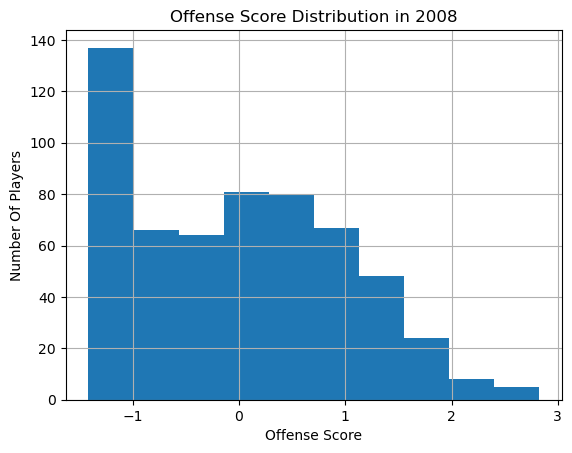

In [1979]:
scaled_df_08["off_score"].hist()
plt.xlabel('Offense Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Offense Score Distribution in 2008') # label for the whole plot

In [1741]:
# checking my defensive score aggregates
scaled_df_08["def_score"].agg(["min","max",np.median,"mean"])

min      -2.214995e+00
max       4.118417e+00
median   -2.646738e-01
mean     -3.981489e-17
Name: def_score, dtype: float64

In [1742]:
scaled_df_08["def_score"].describe()

count    5.800000e+02
mean    -3.981489e-17
std      1.000863e+00
min     -2.214995e+00
25%     -5.520897e-01
50%     -2.646738e-01
75%      4.256373e-01
max      4.118417e+00
Name: def_score, dtype: float64

This shows a similar distribution. Most of the players in the league can be considered replacement level in term of defensive performance. Also, this looks to be a very normal distribution curve. 

Text(0.5, 1.0, 'Defensive Score Distribution in 2008')

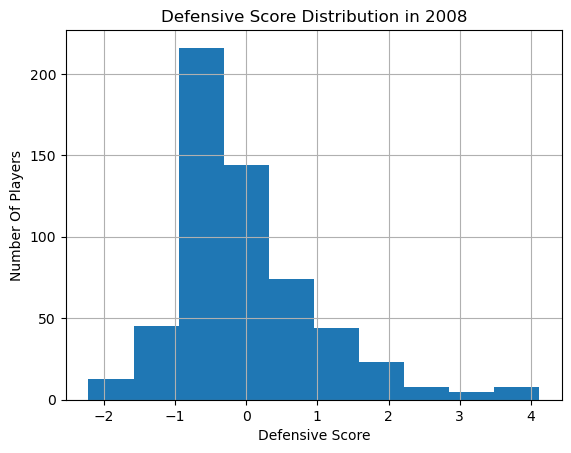

In [1977]:
scaled_df_08["def_score"].hist()
plt.xlabel('Defensive Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Defensive Score Distribution in 2008') # label for the whole plot

In [1744]:
# sanity check for two way score
scaled_df_08["two_way_score"].agg(["min","max","mean"])

min    -1.891610e+00
max     3.496447e+00
mean    1.914178e-17
Name: two_way_score, dtype: float64

Text(0.5, 1.0, 'Two Way Score Distribution in 2008')

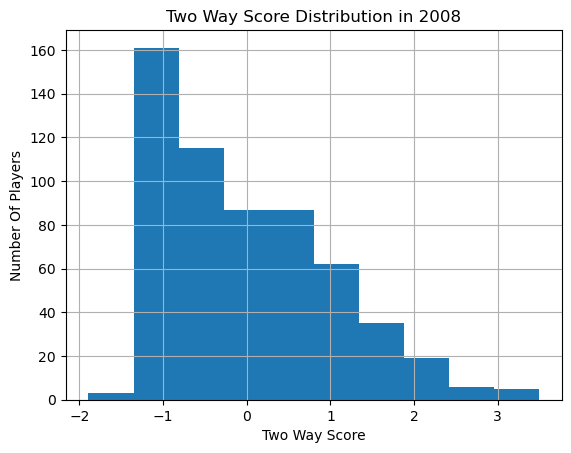

In [1980]:
# smiliar distribution to the others
scaled_df_08["two_way_score"].hist()
plt.xlabel('Two Way Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Two Way Score Distribution in 2008') # label for the whole plot

It seems as though the average player is right about a zero score for both offensive and defensive score. I'm going to set my standard for elite two way forwards at a cut-off of one for each. 

In [1746]:
# create my elite two way forward binary classifier
scaled_df_08['is_good'] = np.where(((scaled_df_08['off_score']>1) & (scaled_df_08['def_score']>1)), 1, 0)

In [1747]:
# sanity check
scaled_df_08.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  I_F_shotsOnGoal  \
0  -0.250691           -0.277484              0.100371        -0.085454   
1  -1.073095           -0.466604             -0.470365        -0.355308   
2  -0.908615           -0.466604             -1.041102        -0.769084   
3   1.065155            0.289875             -0.184997         0.310332   
4   0.571713            1.046354              0.385739         0.922001   

   shotsBlockedByPlayer  penalityMinutesDrawn  penalityMinutes  faceoffsWon  \
0              1.346664              0.335559        -0.566694     1.140541   
1             -0.551429             -0.225984        -0.439075     0.064909   
2             -0.206321             -0.754495        -0.758123    -0.594812   
3             -0.292598             -0.225984        -0.120028     0.495162   
4              0.915279             -0.093856        -0.375266     0.724630   

   faceoffsLost  OnIce_F_goals  ...  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
0      1.486490       0.050369  ...           -0.109003            0.426850   
1      0.293292      -0.728678  ...           -0.315992           -0.760199   
2     -0.622243      -0.895617  ...           -0.704095           -0.946926   
3      0.683520       0.662478  ...            1.145864            1.160421   
4      0.893643       0.829417  ...            1.236421            0.853655   

   OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
0                   0.005011                0.323660   
1                  -0.721607               -0.500762   
2                  -0.662692               -0.838867   
3                   0.437054                0.865555   
4                   1.026204                0.805344   

   OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  off_score  def_score  \
0                   0.206494                0.406337  -0.353562  -0.182555   
1                  -0.741129               -0.515880  -0.743752   0.207509   
2                  -0.611907               -0.888691  -0.901489   0.053537   
3                   0.594158                0.921405  -0.021485  -0.449441   
4                   1.391023                1.416851   0.244177  -0.634208   

   two_way_score  is_good  
0      -0.325942        0  
1      -0.374532        0  
2      -0.558093        0  
3      -0.250358        0  
4      -0.174774        0  

[5 rows x 29 columns]

In [1748]:
# how many
scaled_df_08["is_good"].value_counts()

0    536
1     44
Name: is_good, dtype: int64

In [1749]:
# overall percentage of players in the NHL who are "elite two way forwards"
44/580 *100

7.586206896551724

Now that i have this new column, I can use it as my target variable for logistic regression and machine learning models.

I'm curious to find out how these features perform and if I can gain some extra insight into what makes these players so effective and how a machine learning model might split these players into categories.

# Logistic Regression

I'm starting with a basic logistic regression. this will let me see some coefficients and p-values for each of my raw statistics.

In [1750]:
# target variable
y = scaled_df_08['is_good']

I'll drop all of my engineered features from this analysis, I think it would muddy the waters and be incredibly collinear. 

In [1751]:
# dependent variables
X = scaled_df_08.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1752]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
0    1.0  -0.250691           -0.277484              0.100371   
1    1.0  -1.073095           -0.466604             -0.470365   
2    1.0  -0.908615           -0.466604             -1.041102   
3    1.0   1.065155            0.289875             -0.184997   
4    1.0   0.571713            1.046354              0.385739   

   I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
0        -0.085454              1.346664              0.335559   
1        -0.355308             -0.551429             -0.225984   
2        -0.769084             -0.206321             -0.754495   
3         0.310332             -0.292598             -0.225984   
4         0.922001              0.915279             -0.093856   

   penalityMinutes  faceoffsWon  faceoffsLost  ...  OnIce_F_reboundGoals  \
0        -0.566694     1.140541      1.486490  ...              0.173957   
1        -0.439075     0.064909      0.293292  ...             -0.340814   
2        -0.758123    -0.594812     -0.622243  ...             -0.855586   
3        -0.120028     0.495162      0.683520  ...              0.431343   
4        -0.375266     0.724630      0.893643  ...              0.688729   

   OnIce_A_reboundGoals  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
0              0.210014              0.751759              0.332973   
1             -0.077948             -0.764630             -0.568575   
2             -0.941835             -0.498012             -0.922755   
3              1.361863              0.335169              1.041333   
4              0.785938              0.968386              1.025234   

   I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
0           -0.109003            0.426850                   0.005011   
1           -0.315992           -0.760199                  -0.721607   
2           -0.704095           -0.946926                  -0.662692   
3            1.145864            1.160421                   0.437054   
4            1.236421            0.853655                   1.026204   

   OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
0                0.323660                   0.206494                0.406337  
1               -0.500762                  -0.741129               -0.515880  
2               -0.838867                  -0.611907               -0.888691  
3                0.865555                   0.594158                0.921405  
4                0.805344                   1.391023                1.416851  

[5 rows x 26 columns]

In [1753]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.028296
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      554
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.8946
Time:                        15:25:19   Log-Likelihood:                -16.411
converged:                       True   LL-Null:                       -155.76
Covariance Type:            nonrobust   LLR p-value:                 1.100e-44
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -31.7701     10.534     -3.016      0.003     -52.417     -11.123
I_F_goals                     4.2828      2.555      1.676      0.094      -0.725       9.290
I_F_primaryAssists            3.9543      1.939      2.040      0.041       0.155       7.754
I_F_secondaryAssists          2.8234      1.567      1.802      0.072      -0.248       5.895
I_F_shotsOnGoal              10.6142      4.258      2.493      0.013       2.270      18.959
shotsBlockedByPlayer          3.9987      1.626      2.459      0.014       0.812       7.185
penalityMinutesDrawn          3.0140      1.677      1.797      0.072      -0.272       6.300
penalityMinutes               4.7463      1.896      2.503      0.012       1.029       8.463
faceoffsWon                  16.2438      6.343      2.561      0.010       3.812      28.676
faceoffsLost                -15.0795      5.978     -2.522      0.012     -26.797      -3.362
OnIce_F_goals                -1.2189      4.486     -0.272      0.786     -10.011       7.573
OnIce_A_goals               -10.2852      4.320     -2.381      0.017     -18.751      -1.819
I_F_takeaways                 1.1675      1.081      1.080      0.280      -0.950       3.285
I_F_giveaways                 0.8323      1.030      0.808      0.419      -1.186       2.850
OnIce_F_highDangerShots      -1.0485      1.097     -0.955      0.339      -3.199       1.102
OnIce_A_highDangerShots       0.3433      1.427      0.241      0.810      -2.453       3.140
OnIce_F_reboundGoals          4.5318      2.051      2.209      0.027       0.511       8.552
OnIce_A_reboundGoals          1.2172      1.202      1.013      0.311      -1.138       3.573
I_F_dZoneShiftStarts          2.7065      1.839      1.472      0.141      -0.898       6.311
I_F_oZoneShiftStarts         -0.3950      2.486     -0.159      0.874      -5.267       4.477
I_F_oZoneShiftEnds           -2.9410      3.305     -0.890      0.374      -9.419       3.537
I_F_dZoneShiftEnds           -8.8662      3.926     -2.258      0.024     -16.562      -1.170
OnIce_F_mediumDangerShots    -1.3610      2.607     -0.522      0.602      -6.470       3.748
OnIce_F_lowDangerShots       25.8428      9.887      2.614      0.009       6.465      45.220
OnIce_A_mediumDangerShots     2.8512      3.114      0.916      0.360      -3.252       8.954
OnIce_A_lowDangerShots      -25.8664     10.445     -2.476      0.013     -46.338      -5.395
=============================================================================================

Possibly complete quasi-separation: A fraction 0.89 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Lots of features to dig through, here.

It seem like a bit less half of them have really high p-values.

Interesting to find is that my groups of statistics that I used to create my engineered features are being split up, here.

Take I_F_Goals, I_F_primaryAssists and I_F_secondary_Assists. These make up the feature "points" and two out of the three (goals/secondary assists) have p-values that are too high to keep.

Also to note, the highest coeeficients by far are low danger shots for and against (OnIce_F_lowDangerShots/OnIce_A_lowDangerShots). This mkaes sense, as a lot of hockey teams preach "get pucks to the net", which means shoot every time you get the chance and good things will happen.

I thought that high danger shots (OnIce_F_highDangerShots, OnIce_A_highDangerShots) would have a greater impact, since you're much more likely to score on a high danger shot than a low danger shot, percentage wise.

Here's a quick section on high vs low danger shots:https://www.hockey-reference.com/about/advanced_stats.html

TLDR: high danger chances occur closer to the net and have a higher chance of being a goal. Lower danger chances occur from further away from the net and have a lower chance of becoming a goal.

I'll drop all of the high p-value features and rerun to see if there's any changes.

In [1754]:
# drop all columns with p-values that are too high
scaled_df_08.drop(columns = 'I_F_goals', inplace = True)
scaled_df_08.drop(columns = 'I_F_secondaryAssists', inplace = True)
scaled_df_08.drop(columns = 'penalityMinutesDrawn', inplace = True)
scaled_df_08.drop(columns = 'OnIce_F_goals', inplace = True)
scaled_df_08.drop(columns = 'I_F_takeaways', inplace = True)
scaled_df_08.drop(columns = 'I_F_giveaways', inplace = True)
scaled_df_08.drop(columns = 'OnIce_F_highDangerShots', inplace = True)
scaled_df_08.drop(columns = 'OnIce_A_highDangerShots', inplace = True)
scaled_df_08.drop(columns = 'OnIce_A_reboundGoals', inplace = True)
scaled_df_08.drop(columns = 'I_F_dZoneShiftStarts', inplace = True)
scaled_df_08.drop(columns = 'I_F_oZoneShiftStarts', inplace = True)
scaled_df_08.drop(columns = 'I_F_oZoneShiftEnds', inplace = True)
scaled_df_08.drop(columns = 'OnIce_F_mediumDangerShots', inplace = True)
scaled_df_08.drop(columns = 'OnIce_A_mediumDangerShots', inplace = True)

scaled_df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   I_F_primaryAssists      580 non-null    float64
 1   I_F_shotsOnGoal         580 non-null    float64
 2   shotsBlockedByPlayer    580 non-null    float64
 3   penalityMinutes         580 non-null    float64
 4   faceoffsWon             580 non-null    float64
 5   faceoffsLost            580 non-null    float64
 6   OnIce_A_goals           580 non-null    float64
 7   OnIce_F_reboundGoals    580 non-null    float64
 8   I_F_dZoneShiftEnds      580 non-null    float64
 9   OnIce_F_lowDangerShots  580 non-null    float64
 10  OnIce_A_lowDangerShots  580 non-null    float64
 11  off_score               580 non-null    float64
 12  def_score               580 non-null    float64
 13  two_way_score           580 non-null    float64
 14  is_good                 580 non-null    in

In [1755]:
y = scaled_df_08['is_good']

In [1756]:
X = scaled_df_08.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1757]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_primaryAssists  I_F_shotsOnGoal  shotsBlockedByPlayer  \
0    1.0           -0.277484        -0.085454              1.346664   
1    1.0           -0.466604        -0.355308             -0.551429   
2    1.0           -0.466604        -0.769084             -0.206321   
3    1.0            0.289875         0.310332             -0.292598   
4    1.0            1.046354         0.922001              0.915279   

   penalityMinutes  faceoffsWon  faceoffsLost  OnIce_A_goals  \
0        -0.566694     1.140541      1.486490       0.322902   
1        -0.439075     0.064909      0.293292      -0.694595   
2        -0.758123    -0.594812     -0.622243      -0.694595   
3        -0.120028     0.495162      0.683520       0.195715   
4        -0.375266     0.724630      0.893643       1.594772   

   OnIce_F_reboundGoals  I_F_dZoneShiftEnds  OnIce_F_lowDangerShots  \
0              0.173957            0.426850                0.323660   
1             -0.340814           -0.760199               -0.500762   
2             -0.855586           -0.946926               -0.838867   
3              0.431343            1.160421                0.865555   
4              0.688729            0.853655                0.805344   

   OnIce_A_lowDangerShots  
0                0.406337  
1               -0.515880  
2               -0.888691  
3                0.921405  
4                1.416851

In [1758]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.054821
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           11
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.7959
Time:                        15:25:22   Log-Likelihood:                -31.796
converged:                       True   LL-Null:                       -155.76
Covariance Type:            nonrobust   LLR p-value:                 7.616e-47
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11.1104      2.138     -5.195      0.000     -15.302      -6.919
I_F_primaryAssists         1.2770      0.551      2.318      0.020       0.197       2.357
I_F_shotsOnGoal            2.9754      1.010      2.945      0.003       0.995       4.956
shotsBlockedByPlayer       0.9792      0.408      2.400      0.016       0.179       1.779
penalityMinutes            2.2598      0.537      4.209      0.000       1.208       3.312
faceoffsWon                4.5835      1.377      3.329      0.001       1.885       7.282
faceoffsLost              -4.2907      1.406     -3.052      0.002      -7.047      -1.535
OnIce_A_goals             -2.4218      1.077     -2.248      0.025      -4.533      -0.310
OnIce_F_reboundGoals       1.1690      0.547      2.136      0.033       0.096       2.242
I_F_dZoneShiftEnds        -3.7752      1.347     -2.802      0.005      -6.416      -1.134
OnIce_F_lowDangerShots     8.9038      1.996      4.460      0.000       4.991      12.816
OnIce_A_lowDangerShots    -4.0774      1.940     -2.102      0.036      -7.879      -0.276
==========================================================================================

Possibly complete quasi-separation: A fraction 0.67 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

I've reduced the dimensionality down, and the distributions have become much more even. The highest positive impact is still low danger shots for and the highest negative impact is faceoffs lost. Faceoffs won also has a really high positve value.

I'm really certain about faceoffs won and lost. There are three forward positions; centre, right and left wingers. The wingers are typically tasked with transitioning the puck from their defensive zone to the offensive zone and contributing offensively.

The centre position is a bit like mid-field in soccer. They're expected to contribute to offense and defense. They help defenders win the puck back from opposition forwards, transfer the puck to their wingers and then contribute offensively. I would bet that most of the elite two way forwards I find will be centres.

They are also tasked with faceoffs. Faceoffs are how the game of hockey starts and restarts after a stoppage.

faceoff rules here: https://www.purehockey.com/c/hockey-face-off-rules-and-strategies

Winning the puck for your team in this scenario is huge. You gain posession of the puck and deny the same to the other team. The best faceoff winners by percentage hover around 53-55%, with some rare players getting up towards 60%.

I'm not surprised to see faceoffs be impactful, I'm just a bit surprised to see it be this impactful!

In [1759]:
mylogreg_results.params 

const                    -11.110365
I_F_primaryAssists         1.277008
I_F_shotsOnGoal            2.975448
shotsBlockedByPlayer       0.979177
penalityMinutes            2.259767
faceoffsWon                4.583488
faceoffsLost              -4.290655
OnIce_A_goals             -2.421775
OnIce_F_reboundGoals       1.168982
I_F_dZoneShiftEnds        -3.775220
OnIce_F_lowDangerShots     8.903789
OnIce_A_lowDangerShots    -4.077367
dtype: float64

I'd like to check the log odds of low danger chances for

In [1760]:
# The independent variable
X = scaled_df_08['OnIce_F_lowDangerShots']
# The dependent variable
y = scaled_df_08['is_good']

In [1761]:
# manually add an intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  OnIce_F_lowDangerShots
0    1.0                0.323660
1    1.0               -0.500762
2    1.0               -0.838867
3    1.0                0.865555
4    1.0                0.805344

In [1762]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.129626
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.5173
Time:                        15:25:24   Log-Likelihood:                -75.183
converged:                       True   LL-Null:                       -155.76
Covariance Type:            nonrobust   LLR p-value:                 6.357e-37
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.6344      0.828     -8.014      0.000      -8.257      -5.012
OnIce_F_lowDangerShots     4.2042      0.597      7.040      0.000       3.034       5.375
==========================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1763]:
mylogreg_results.params 

const                    -6.634438
OnIce_F_lowDangerShots    4.204215
dtype: float64

In [1764]:
beta0 = mylogreg_results.params[0]

In [1765]:
beta1 = mylogreg_results.params[1]

In [1766]:
# LDSF = Low Danger Shots For
def my_model(LDSF):
    exponent = -6.634438 + 4.204215*LDSF
    sig_val = 1.0 / (1.0 + np.exp(-exponent))
    return sig_val

In [1767]:
# these are the odds of being an elite two way forward with low amounts of low danger shot totals
my_model(0)

0.0013125920216470548

In [1768]:
# these are the odds of being an elite two way forward with medium amounts of low danger shot totals
my_model(1)

0.08089688504064005

In [1769]:
# these are the odds of being an elite two way forward with high amounts of low danger shot totals
my_model(2.0)

0.8549534130918062

It seems that low danger shots are a major catalyst for being considered an elite two way forward in my model, very cool!

In [1770]:
# this is an "odds ratio"
my_model(0.0)/(1.0 - my_model(0.0))

0.001314317183896551

I borrowed this code from the logistic regression lecture and adapted it for my data.

In [1771]:
OnIce_F_lowDangerShots = [i for i in range(4)]

for LDS in OnIce_F_lowDangerShots :
    
    # plug in the hours researched in our regression equation
    linear_combination = 4.204215*LDS -6.634438
    
    # Pass this into the sigmoid curve function defined earlier, this gives us p
    probability_of_being_elite_two_way_player = sigmoid_curve(linear_combination)
    
    # 1-p
    probability_of_not_being_elite_two_way_player = 1 - probability_of_being_elite_two_way_player
    
    # lets calculate our odds ratio
    odds_ratio = probability_of_being_elite_two_way_player/probability_of_not_being_elite_two_way_player
    
    print(f'After {LDS} number of low danger shots the')
    print(f'Probability of being an elite two way forward is: {probability_of_being_elite_two_way_player}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

After 0 number of low danger shots the
Probability of being an elite two way forward is: 0.0013125920216470548
Odds ratio is: 0.001314317183896551

After 1 number of low danger shots the
Probability of being an elite two way forward is: 0.08089688504064005
Odds ratio is: 0.08801720255753576

After 2 number of low danger shots the
Probability of being an elite two way forward is: 0.8549534130918062
Odds ratio is: 5.894336649458306

After 3 number of low danger shots the
Probability of being an elite two way forward is: 0.9974730371729338
Odds ratio is: 394.73197883602927



I'll examine faceoffs lost next.

# Faceoffs Lost

In [1772]:
# The independent variable
X = scaled_df_08['faceoffsLost']
# The dependent variable
y = scaled_df_08['is_good']

In [1773]:
# manually add an intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  faceoffsLost
0    1.0      1.486490
1    1.0      0.293292
2    1.0     -0.622243
3    1.0      0.683520
4    1.0      0.893643

In [1774]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.253628
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                 0.05555
Time:                        15:25:30   Log-Likelihood:                -147.10
converged:                       True   LL-Null:                       -155.76
Covariance Type:            nonrobust   LLR p-value:                 3.186e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6448      0.174    -15.164      0.000      -2.987      -2.303
faceoffsLost     0.5402      0.123      4.376      0.000       0.298       0.782
================================================================================
"""

In [1775]:
mylogreg_results.params 

const          -2.644785
faceoffsLost    0.540170
dtype: float64

In [1776]:
beta0 = mylogreg_results.params[0]

In [1777]:
beta1 = mylogreg_results.params[1]

In [1778]:
# LDSA = Low Danger Shots Against
def my_model(FOL):
    exponent = -2.644785 + 0.540170*FOL
    sig_val = 1.0 / (1.0 + np.exp(-exponent))
    return sig_val

In [1779]:
# these are the odds of not being an elite two way forward with low amounts of lost faceoffs lost
my_model(0)

0.0663111616192193

In [1780]:
# these are the odds of not being an elite two way forward with medium amounts of faceoffs lost
my_model(1)

0.10864907616780475

In [1781]:
# these are the odds of not being an elite two way forward with high amounts of faceoffs lost
my_model(2.0)

0.17300974342731415

In [1782]:
# this is an "odds ratio"
my_model(0.0)/(1.0 - my_model(0.0))

0.07102062153191985

In [1783]:
faceoffsLost = [i for i in range(4)]

for FOL in faceoffsLost :
    
    # plug in the hours researched in our regression equation
    linear_combination = 0.540170*FOL -2.644785
    
    # Pass this into the sigmoid curve function defined earlier, this gives us p
    probability_of_being_elite_two_way_player = sigmoid_curve(linear_combination)
    
    # 1-p
    probability_of_not_being_elite_two_way_player = 1 - probability_of_being_elite_two_way_player
    
    # lets calculate our odds ratio
    odds_ratio = probability_of_being_elite_two_way_player/probability_of_not_being_elite_two_way_player
    
    print(f'After {LDS} factors of losing faceoffs the')
    print(f'Probability of not being an elite two way forward is: {probability_of_being_elite_two_way_player}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

After 3 factors of losing faceoffs the
Probability of not being an elite two way forward is: 0.0663111616192193
Odds ratio is: 0.07102062153191985

After 3 factors of losing faceoffs the
Probability of not being an elite two way forward is: 0.10864907616780475
Odds ratio is: 0.1218925938851205

After 3 factors of losing faceoffs the
Probability of not being an elite two way forward is: 0.17300974342731415
Odds ratio is: 0.2092040892287199

After 3 factors of losing faceoffs the
Probability of not being an elite two way forward is: 0.2641955192553824
Odds ratio is: 0.3590566871623594



Very interesting. Since this column is a negative value in my features (losing faceoffs is a negative for your team) it seems as though increasing your factor of losing faceoffs means you're less likely to be an elite two way forward.

I'd like to try a logistic regression on the unscaled data to see if that looks any different, or offers any additional insights

# Logistic Regression With Unscaled Data

In [1784]:
o8o9_5on5_df.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                    
Frans Nielsen           5.0                 4.0                   4.0   
Brandon Sutter          0.0                 3.0                   2.0   
Martins Karsums         1.0                 3.0                   0.0   
Brendan Morrison       13.0                 7.0                   3.0   
Wojtek Wolski          10.0                11.0                   5.0   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen                66.0                  30.0                  43.0   
Brandon Sutter               51.0                   8.0                  26.0   
Martins Karsums              28.0                  12.0                  10.0   
Brendan Morrison             88.0                  11.0                  26.0   
Wojtek Wolski               122.0                  25.0                  30.0   

                  penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  \
name                                                                          
Frans Nielsen                12.0        243.0         282.0           23.0   
Brandon Sutter               16.0         93.0         123.0            9.0   
Martins Karsums               6.0          1.0           1.0            6.0   
Brendan Morrison             26.0        153.0         175.0           34.0   
Wojtek Wolski                18.0        185.0         203.0           37.0   

                  ...  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
name              ...                                             
Frans Nielsen     ...                 112.0               108.0   
Brandon Sutter    ...                  56.0                92.0   
Martins Karsums   ...                  34.0                62.0   
Brendan Morrison  ...                 156.0               205.0   
Wojtek Wolski     ...                 155.0               212.0   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen                  145.0                       66.0   
Brandon Sutter                  56.0                       29.0   
Martins Karsums                 42.0                       32.0   
Brendan Morrison               200.0                       88.0   
Wojtek Wolski                  177.0                      118.0   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                      371.0                       75.0   
Brandon Sutter                     193.0                       31.0   
Martins Karsums                    120.0                       37.0   
Brendan Morrison                   488.0                       93.0   
Wojtek Wolski                      475.0                      130.0   

                  OnIce_A_lowDangerShots  off_score  def_score  two_way_score  
name                                                                           
Frans Nielsen                      383.0      121.0       18.0          139.0  
Brandon Sutter                     195.0       74.0       56.0          130.0  
Martins Karsums                    119.0       55.0       41.0           96.0  
Brendan Morrison                   488.0      161.0       -8.0          153.0  
Wojtek Wolski                      589.0      193.0      -26.0          167.0  

[5 rows x 28 columns]

<Axes: >

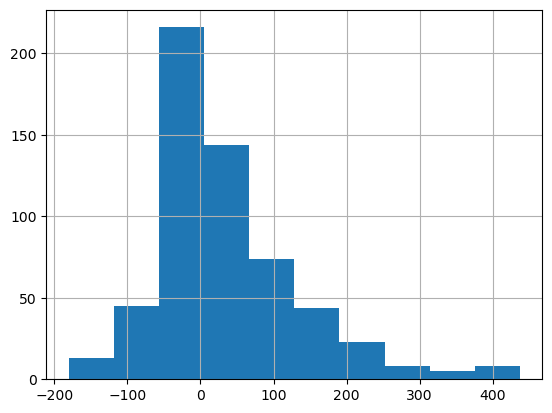

In [1785]:
# distributions look similar to the sclaed data
o8o9_5on5_df["def_score"].hist()
plt.xlabel('Defense Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Defense Score Distribution in 2008') # label for the whole plot

<Axes: >

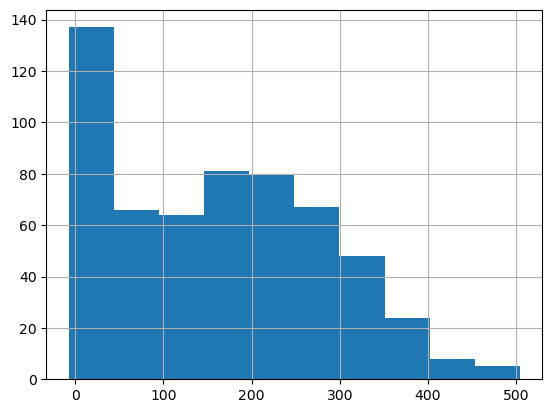

In [1786]:
# same here
o8o9_5on5_df["off_score"].hist()
plt.xlabel('Offense Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Offense Score Distribution in 2008') # label for the whole plot

<Axes: >

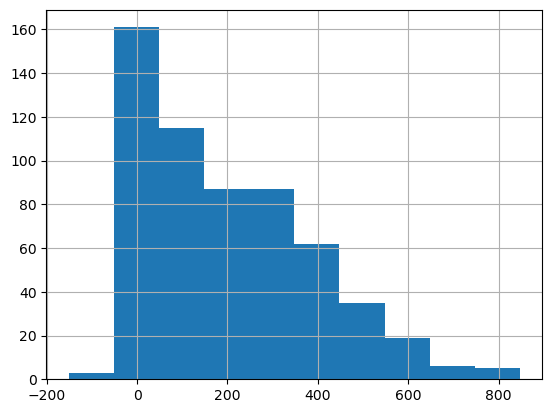

In [1787]:
# same here as well
o8o9_5on5_df["two_way_score"].hist()
plt.xlabel('Two Way Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Two Way Score Distribution in 2008') # label for the whole plot

I'm mkaing a rough version of my elite two way forward threshold, here.

In [1788]:
o8o9_5on5_df['is_good'] = np.where(((o8o9_5on5_df['off_score']>250) & (o8o9_5on5_df['def_score']>100)), 1, 0)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2858645074.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1789]:
o8o9_5on5_df.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                    
Frans Nielsen           5.0                 4.0                   4.0   
Brandon Sutter          0.0                 3.0                   2.0   
Martins Karsums         1.0                 3.0                   0.0   
Brendan Morrison       13.0                 7.0                   3.0   
Wojtek Wolski          10.0                11.0                   5.0   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen                66.0                  30.0                  43.0   
Brandon Sutter               51.0                   8.0                  26.0   
Martins Karsums              28.0                  12.0                  10.0   
Brendan Morrison             88.0                  11.0                  26.0   
Wojtek Wolski               122.0                  25.0                  30.0   

                  penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  \
name                                                                          
Frans Nielsen                12.0        243.0         282.0           23.0   
Brandon Sutter               16.0         93.0         123.0            9.0   
Martins Karsums               6.0          1.0           1.0            6.0   
Brendan Morrison             26.0        153.0         175.0           34.0   
Wojtek Wolski                18.0        185.0         203.0           37.0   

                  ...  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name              ...                                           
Frans Nielsen     ...               108.0               145.0   
Brandon Sutter    ...                92.0                56.0   
Martins Karsums   ...                62.0                42.0   
Brendan Morrison  ...               205.0               200.0   
Wojtek Wolski     ...               212.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                          66.0                   371.0   
Brandon Sutter                         29.0                   193.0   
Martins Karsums                        32.0                   120.0   
Brendan Morrison                       88.0                   488.0   
Wojtek Wolski                         118.0                   475.0   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  \
name                                                                  
Frans Nielsen                          75.0                   383.0   
Brandon Sutter                         31.0                   195.0   
Martins Karsums                        37.0                   119.0   
Brendan Morrison                       93.0                   488.0   
Wojtek Wolski                         130.0                   589.0   

                  off_score  def_score  two_way_score  is_good  
name                                                            
Frans Nielsen         121.0       18.0          139.0        0  
Brandon Sutter         74.0       56.0          130.0        0  
Martins Karsums        55.0       41.0           96.0        0  
Brendan Morrison      161.0       -8.0          153.0        0  
Wojtek Wolski         193.0      -26.0          167.0        0  

[5 rows x 29 columns]

In [1790]:
# independent variable
y = o8o9_5on5_df['is_good']

In [1791]:
# dependent variables
X = o8o9_5on5_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1792]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                           
Frans Nielsen       1.0        5.0                 4.0                   4.0   
Brandon Sutter      1.0        0.0                 3.0                   2.0   
Martins Karsums     1.0        1.0                 3.0                   0.0   
Brendan Morrison    1.0       13.0                 7.0                   3.0   
Wojtek Wolski       1.0       10.0                11.0                   5.0   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen                66.0                  30.0                  43.0   
Brandon Sutter               51.0                   8.0                  26.0   
Martins Karsums              28.0                  12.0                  10.0   
Brendan Morrison             88.0                  11.0                  26.0   
Wojtek Wolski               122.0                  25.0                  30.0   

                  penalityMinutes  faceoffsWon  faceoffsLost  ...  \
name                                                          ...   
Frans Nielsen                12.0        243.0         282.0  ...   
Brandon Sutter               16.0         93.0         123.0  ...   
Martins Karsums               6.0          1.0           1.0  ...   
Brendan Morrison             26.0        153.0         175.0  ...   
Wojtek Wolski                18.0        185.0         203.0  ...   

                  OnIce_F_reboundGoals  OnIce_A_reboundGoals  \
name                                                           
Frans Nielsen                      5.0                   5.0   
Brandon Sutter                     3.0                   4.0   
Martins Karsums                    1.0                   1.0   
Brendan Morrison                   6.0                   9.0   
Wojtek Wolski                      7.0                   7.0   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
name                                                           
Frans Nielsen                    125.0                 112.0   
Brandon Sutter                    34.0                  56.0   
Martins Karsums                   50.0                  34.0   
Brendan Morrison                 100.0                 156.0   
Wojtek Wolski                    138.0                 155.0   

                  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name                                                       
Frans Nielsen                  108.0               145.0   
Brandon Sutter                  92.0                56.0   
Martins Karsums                 62.0                42.0   
Brendan Morrison               205.0               200.0   
Wojtek Wolski                  212.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                          66.0                   371.0   
Brandon Sutter                         29.0                   193.0   
Martins Karsums                        32.0                   120.0   
Brendan Morrison                       88.0                   488.0   
Wojtek Wolski                         118.0                   475.0   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
name                                                                 
Frans Nielsen                          75.0                   383.0  
Brandon Sutter                         31.0                   195.0  
Martins Karsums                        37.0                   119.0  
Brendan Morrison                       93.0                   488.0  
Wojtek Wolski                         130.0                   589.0  

[5 rows x 26 columns]

In [1793]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.059389
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      554
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.8307
Time:                        15:25:38   Log-Likelihood:                -34.445
converged:                       True   LL-Null:                       -203.48
Covariance Type:            nonrobust   LLR p-value:                 1.279e-56
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -25.1453      5.865     -4.287      0.000     -36.640     -13.650
I_F_goals                     0.1729      0.154      1.124      0.261      -0.129       0.475
I_F_primaryAssists            0.1408      0.157      0.895      0.371      -0.167       0.449
I_F_secondaryAssists          0.3531      0.179      1.968      0.049       0.001       0.705
I_F_shotsOnGoal               0.0291      0.017      1.717      0.086      -0.004       0.062
shotsBlockedByPlayer         -0.0366      0.044     -0.830      0.407      -0.123       0.050
penalityMinutesDrawn          0.0250      0.021      1.165      0.244      -0.017       0.067
penalityMinutes               0.0535      0.026      2.084      0.037       0.003       0.104
faceoffsWon                   0.0500      0.015      3.317      0.001       0.020       0.079
faceoffsLost                 -0.0517      0.016     -3.244      0.001      -0.083      -0.020
OnIce_F_goals                -0.0975      0.132     -0.741      0.458      -0.355       0.160
OnIce_A_goals                -0.1572      0.088     -1.782      0.075      -0.330       0.016
I_F_takeaways                 0.1118      0.046      2.446      0.014       0.022       0.201
I_F_giveaways                 0.0004      0.033      0.012      0.990      -0.063       0.064
OnIce_F_highDangerShots       0.0411      0.060      0.683      0.494      -0.077       0.159
OnIce_A_highDangerShots      -0.1344      0.074     -1.822      0.068      -0.279       0.010
OnIce_F_reboundGoals          0.3437      0.209      1.643      0.100      -0.066       0.754
OnIce_A_reboundGoals          0.0201      0.176      0.115      0.909      -0.324       0.364
I_F_dZoneShiftStarts          0.0522      0.016      3.207      0.001       0.020       0.084
I_F_oZoneShiftStarts         -0.0445      0.023     -1.932      0.053      -0.090       0.001
I_F_oZoneShiftEnds            0.0727      0.027      2.743      0.006       0.021       0.125
I_F_dZoneShiftEnds           -0.0419      0.021     -1.957      0.050      -0.084    7.38e-05
OnIce_F_mediumDangerShots     0.0559      0.028      2.017      0.044       0.002       0.110
OnIce_F_lowDangerShots        0.0407      0.012      3.405      0.001       0.017       0.064
OnIce_A_mediumDangerShots    -0.0713      0.035     -2.064      0.039      -0.139      -0.004
OnIce_A_lowDangerShots       -0.0226      0.011     -2.149      0.032      -0.043      -0.002
=============================================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

This distribution is much more even than my scaled data was at first. The scaled data evened out considerably after I dropped the high p-value columns.

In [1794]:
o8o9_5on5_df.drop(columns = 'I_F_goals', inplace = True)
o8o9_5on5_df.drop(columns = 'I_F_primaryAssists', inplace = True)
o8o9_5on5_df.drop(columns = 'I_F_shotsOnGoal', inplace = True)
o8o9_5on5_df.drop(columns = 'shotsBlockedByPlayer', inplace = True)
o8o9_5on5_df.drop(columns = 'penalityMinutesDrawn', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_F_goals', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_A_goals', inplace = True)
o8o9_5on5_df.drop(columns = 'I_F_giveaways', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_F_highDangerShots', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_A_highDangerShots', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_F_reboundGoals', inplace = True)
o8o9_5on5_df.drop(columns = 'I_F_oZoneShiftStarts', inplace = True)
o8o9_5on5_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, Frans Nielsen to Patrick Eaves
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   I_F_secondaryAssists       580 non-null    float64
 1   penalityMinutes            580 non-null    float64
 2   faceoffsWon                580 non-null    float64
 3   faceoffsLost               580 non-null    float64
 4   I_F_takeaways              580 non-null    float64
 5   OnIce_A_reboundGoals       580 non-null    float64
 6   I_F_dZoneShiftStarts       580 non-null    float64
 7   I_F_oZoneShiftEnds         580 non-null    float64
 8   I_F_dZoneShiftEnds         580 non-null    float64
 9   OnIce_F_mediumDangerShots  580 non-null    float64
 10  OnIce_F_lowDangerShots     580 non-null    float64
 11  OnIce_A_mediumDangerShots  580 non-null    float64
 12  OnIce_A_lowDangerShots     580 non-null    float64
 13  off_score                  580 no

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3802879014.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3802879014.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3802879014.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipyker

In [1795]:
# independent variable
y = o8o9_5on5_df['is_good']

In [1796]:
# dependent variable
X = o8o9_5on5_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1797]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_secondaryAssists  penalityMinutes  faceoffsWon  \
name                                                                          
Frans Nielsen       1.0                   4.0             12.0        243.0   
Brandon Sutter      1.0                   2.0             16.0         93.0   
Martins Karsums     1.0                   0.0              6.0          1.0   
Brendan Morrison    1.0                   3.0             26.0        153.0   
Wojtek Wolski       1.0                   5.0             18.0        185.0   

                  faceoffsLost  I_F_takeaways  OnIce_A_reboundGoals  \
name                                                                  
Frans Nielsen            282.0           29.0                   5.0   
Brandon Sutter           123.0           13.0                   4.0   
Martins Karsums            1.0            7.0                   1.0   
Brendan Morrison         175.0           17.0                   9.0   
Wojtek Wolski            203.0           52.0                   7.0   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftEnds  \
name                                                         
Frans Nielsen                    125.0               108.0   
Brandon Sutter                    34.0                92.0   
Martins Karsums                   50.0                62.0   
Brendan Morrison                 100.0               205.0   
Wojtek Wolski                    138.0               212.0   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen                  145.0                       66.0   
Brandon Sutter                  56.0                       29.0   
Martins Karsums                 42.0                       32.0   
Brendan Morrison               200.0                       88.0   
Wojtek Wolski                  177.0                      118.0   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                      371.0                       75.0   
Brandon Sutter                     193.0                       31.0   
Martins Karsums                    120.0                       37.0   
Brendan Morrison                   488.0                       93.0   
Wojtek Wolski                      475.0                      130.0   

                  OnIce_A_lowDangerShots  
name                                      
Frans Nielsen                      383.0  
Brandon Sutter                     195.0  
Martins Karsums                    119.0  
Brendan Morrison                   488.0  
Wojtek Wolski                      589.0

In [1798]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.082316
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                           13
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.7654
Time:                        15:25:40   Log-Likelihood:                -47.743
converged:                       True   LL-Null:                       -203.48
Covariance Type:            nonrobust   LLR p-value:                 9.569e-59
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -18.2808      3.405     -5.369      0.000     -24.954     -11.608
I_F_secondaryAssists          0.2083      0.101      2.063      0.039       0.010       0.406
penalityMinutes               0.0475      0.013      3.700      0.000       0.022       0.073
faceoffsWon                   0.0249      0.008      3.083      0.002       0.009       0.041
faceoffsLost                 -0.0284      0.009     -3.311      0.001      -0.045      -0.012
I_F_takeaways                 0.0674      0.027      2.499      0.012       0.015       0.120
OnIce_A_reboundGoals         -0.2305      0.125     -1.841      0.066      -0.476       0.015
I_F_dZoneShiftStarts          0.0298      0.011      2.774      0.006       0.009       0.051
I_F_oZoneShiftEnds            0.0427      0.014      3.025      0.002       0.015       0.070
I_F_dZoneShiftEnds           -0.0469      0.014     -3.272      0.001      -0.075      -0.019
OnIce_F_mediumDangerShots     0.0476      0.017      2.741      0.006       0.014       0.082
OnIce_F_lowDangerShots        0.0327      0.007      5.021      0.000       0.020       0.045
OnIce_A_mediumDangerShots    -0.0626      0.021     -2.971      0.003      -0.104      -0.021
OnIce_A_lowDangerShots       -0.0140      0.008     -1.838      0.066      -0.029       0.001
=============================================================================================

Possibly complete quasi-separation: A fraction 0.54 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Something to note here: in the scaled data, low danger shots for and against had very low p-values and very effective coefficeints, both positive and negative. Here, in the unsclaed data, the model isn't so sure.

We're also not seeing any coefficients that are really high. 

In [1799]:
# drop the high p-values and run it again
o8o9_5on5_df.drop(columns = 'OnIce_A_reboundGoals', inplace = True)
o8o9_5on5_df.drop(columns = 'OnIce_A_lowDangerShots', inplace = True)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1358984150.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1358984150.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1800]:
# independent variable
y = o8o9_5on5_df['is_good']

In [1801]:
# dependent variable
X = o8o9_5on5_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1802]:
# add the contstant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_secondaryAssists  penalityMinutes  faceoffsWon  \
name                                                                          
Frans Nielsen       1.0                   4.0             12.0        243.0   
Brandon Sutter      1.0                   2.0             16.0         93.0   
Martins Karsums     1.0                   0.0              6.0          1.0   
Brendan Morrison    1.0                   3.0             26.0        153.0   
Wojtek Wolski       1.0                   5.0             18.0        185.0   

                  faceoffsLost  I_F_takeaways  I_F_dZoneShiftStarts  \
name                                                                  
Frans Nielsen            282.0           29.0                 125.0   
Brandon Sutter           123.0           13.0                  34.0   
Martins Karsums            1.0            7.0                  50.0   
Brendan Morrison         175.0           17.0                 100.0   
Wojtek Wolski            203.0           52.0                 138.0   

                  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name                                                       
Frans Nielsen                  108.0               145.0   
Brandon Sutter                  92.0                56.0   
Martins Karsums                 62.0                42.0   
Brendan Morrison               205.0               200.0   
Wojtek Wolski                  212.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                          66.0                   371.0   
Brandon Sutter                         29.0                   193.0   
Martins Karsums                        32.0                   120.0   
Brendan Morrison                       88.0                   488.0   
Wojtek Wolski                         118.0                   475.0   

                  OnIce_A_mediumDangerShots  
name                                         
Frans Nielsen                          75.0  
Brandon Sutter                         31.0  
Martins Karsums                        37.0  
Brendan Morrison                       93.0  
Wojtek Wolski                         130.0

In [1803]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.089046
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           11
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.7462
Time:                        15:25:43   Log-Likelihood:                -51.646
converged:                       True   LL-Null:                       -203.48
Covariance Type:            nonrobust   LLR p-value:                 1.485e-58
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -17.4295      3.033     -5.747      0.000     -23.374     -11.485
I_F_secondaryAssists          0.1426      0.093      1.537      0.124      -0.039       0.324
penalityMinutes               0.0439      0.011      3.859      0.000       0.022       0.066
faceoffsWon                   0.0267      0.008      3.251      0.001       0.011       0.043
faceoffsLost                 -0.0302      0.009     -3.490      0.000      -0.047      -0.013
I_F_takeaways                 0.0638      0.025      2.505      0.012       0.014       0.114
I_F_dZoneShiftStarts          0.0144      0.009      1.668      0.095      -0.003       0.031
I_F_oZoneShiftEnds            0.0403      0.013      3.105      0.002       0.015       0.066
I_F_dZoneShiftEnds           -0.0571      0.012     -4.638      0.000      -0.081      -0.033
OnIce_F_mediumDangerShots     0.0430      0.016      2.626      0.009       0.011       0.075
OnIce_F_lowDangerShots        0.0288      0.006      5.134      0.000       0.018       0.040
OnIce_A_mediumDangerShots    -0.0771      0.019     -4.033      0.000      -0.115      -0.040
=============================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1804]:
# drop the high p-values
o8o9_5on5_df.drop(columns = 'I_F_secondaryAssists', inplace = True)
o8o9_5on5_df.drop(columns = 'I_F_dZoneShiftStarts', inplace = True)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3617318030.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3617318030.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1805]:
# independent variable
y = o8o9_5on5_df['is_good']

In [1806]:
# dependent variable
X = o8o9_5on5_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1807]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  penalityMinutes  faceoffsWon  faceoffsLost  \
name                                                                  
Frans Nielsen       1.0             12.0        243.0         282.0   
Brandon Sutter      1.0             16.0         93.0         123.0   
Martins Karsums     1.0              6.0          1.0           1.0   
Brendan Morrison    1.0             26.0        153.0         175.0   
Wojtek Wolski       1.0             18.0        185.0         203.0   

                  I_F_takeaways  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name                                                                      
Frans Nielsen              29.0               108.0               145.0   
Brandon Sutter             13.0                92.0                56.0   
Martins Karsums             7.0                62.0                42.0   
Brendan Morrison           17.0               205.0               200.0   
Wojtek Wolski              52.0               212.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                          66.0                   371.0   
Brandon Sutter                         29.0                   193.0   
Martins Karsums                        32.0                   120.0   
Brendan Morrison                       88.0                   488.0   
Wojtek Wolski                         118.0                   475.0   

                  OnIce_A_mediumDangerShots  
name                                         
Frans Nielsen                          75.0  
Brandon Sutter                         31.0  
Martins Karsums                        37.0  
Brendan Morrison                       93.0  
Wojtek Wolski                         130.0

In [1808]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.093788
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                  580
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            9
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.7327
Time:                        15:25:44   Log-Likelihood:                -54.397
converged:                       True   LL-Null:                       -203.48
Covariance Type:            nonrobust   LLR p-value:                 6.422e-59
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -16.3272      2.701     -6.044      0.000     -21.622     -11.033
penalityMinutes               0.0387      0.010      3.708      0.000       0.018       0.059
faceoffsWon                   0.0269      0.008      3.569      0.000       0.012       0.042
faceoffsLost                 -0.0289      0.008     -3.635      0.000      -0.045      -0.013
I_F_takeaways                 0.0617      0.024      2.550      0.011       0.014       0.109
I_F_oZoneShiftEnds            0.0440      0.012      3.795      0.000       0.021       0.067
I_F_dZoneShiftEnds           -0.0490      0.011     -4.360      0.000      -0.071      -0.027
OnIce_F_mediumDangerShots     0.0437      0.015      2.891      0.004       0.014       0.073
OnIce_F_lowDangerShots        0.0277      0.006      5.031      0.000       0.017       0.039
OnIce_A_mediumDangerShots    -0.0753      0.019     -3.996      0.000      -0.112      -0.038
=============================================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Unscaled data doesn't have any very large coefficients.

This was my assumption going into this project, that all of these features contribute, but not massively so. Hockey is a multi-faceted game, so my thoughts going into this were that I'd see small coefficient for a lot of different variables.

The amount of variables was reduced by a lot in the scaled and unscaled data, so my assumptions that there would be a massive amount of features to sif through was wrong.

Nest, I'm going to get into some machine learning models. I'm hoping to get a KNN to effectively classify the players as elite or not elite two way players and have a decision trees indicate what differentiates these players with thje branches.

# KNN

First, I'll run a KNN to test if this model can classify the players in the dataset. I do expcet some pretty high accuracies. The target variable is created from the dependent variables, but this will be useful to have as a barometer.

In [1809]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [1810]:
# make a copy that won't reflect changes on the original
KNN_copy = scaled_df_08.copy(deep=True)

In [1811]:
# independent variable
y = KNN_copy['is_good']

In [1812]:
# dependent variables
X = KNN_copy.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1813]:
# sanity check
X.shape

(580, 11)

In [1814]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [1815]:
# default KNN

# 1) instantiate

KNN_08 = KNeighborsClassifier()

# 2) fit

KNN_08.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {KNN_08.score(X_train,y_train)}")
print(f"Test set accuracy: {KNN_08.score(X_test,y_test)}")

Score on training set: 0.9384236453201971
Test set accuracy: 0.9597701149425287


I'd like to see if I can optimize this a little bit further. I'll look for the optimal number of nearest neighbors.

In [1816]:
# testing possible k's
candidate_ks = list(range(1,len(X_train),1))

# two empty lists to capture train and test accuracies corresponding to each k

train_accs = []
test_accs = []

for k in candidate_ks:
    
    # 1) instantiate

    df_0809_knn = KNeighborsClassifier(n_neighbors = k)

# 2) fit (on training data)

    df_0809_knn.fit(X_train,y_train)
    
    # 3) store accuracies in lists
    
    train_accs.append(df_0809_knn.score(X_train,y_train))
    test_accs.append(df_0809_knn.score(X_test,y_test))
    
    print(f"fitting with k = {k}")

fitting with k = 1
fitting with k = 2
fitting with k = 3
fitting with k = 4
fitting with k = 5
fitting with k = 6
fitting with k = 7
fitting with k = 8
fitting with k = 9
fitting with k = 10
fitting with k = 11
fitting with k = 12
fitting with k = 13
fitting with k = 14
fitting with k = 15
fitting with k = 16
fitting with k = 17
fitting with k = 18
fitting with k = 19
fitting with k = 20
fitting with k = 21
fitting with k = 22
fitting with k = 23
fitting with k = 24
fitting with k = 25
fitting with k = 26
fitting with k = 27
fitting with k = 28
fitting with k = 29
fitting with k = 30
fitting with k = 31
fitting with k = 32
fitting with k = 33
fitting with k = 34
fitting with k = 35
fitting with k = 36
fitting with k = 37
fitting with k = 38
fitting with k = 39
fitting with k = 40
fitting with k = 41
fitting with k = 42
fitting with k = 43
fitting with k = 44
fitting with k = 45
fitting with k = 46
fitting with k = 47
fitting with k = 48
fitting with k = 49
fitting with k = 50
fitting w

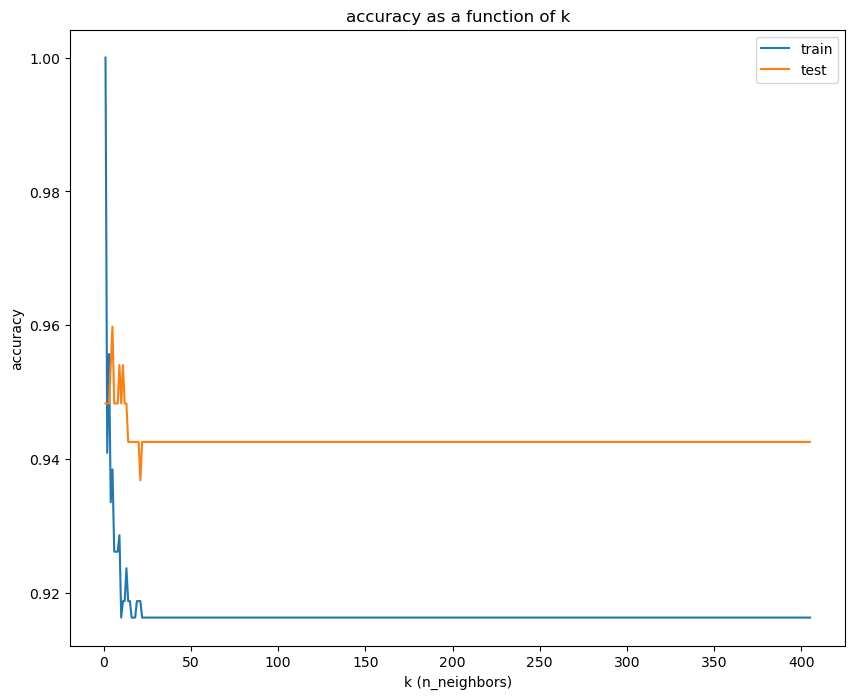

In [1817]:
# plot to see what's what
plt.figure(figsize = (10,8))
plt.plot(candidate_ks,train_accs,label = "train")
plt.plot(candidate_ks,test_accs,label = "test")
plt.title("accuracy as a function of k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("accuracy")
plt.legend()
plt.show()

This looks like they meet at 2 nearest neighbors. I'll give that a run and see how it does.

In [1818]:
# default KNN

# 1) instantiate

KNN_08 = KNeighborsClassifier(n_neighbors = 2)

# 2) fit (on training data)

KNN_08.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {KNN_08.score(X_train,y_train)}")
print(f"Test set accuracy: {KNN_08.score(X_test,y_test)}")

Score on training set: 0.9408866995073891
Test set accuracy: 0.9482758620689655


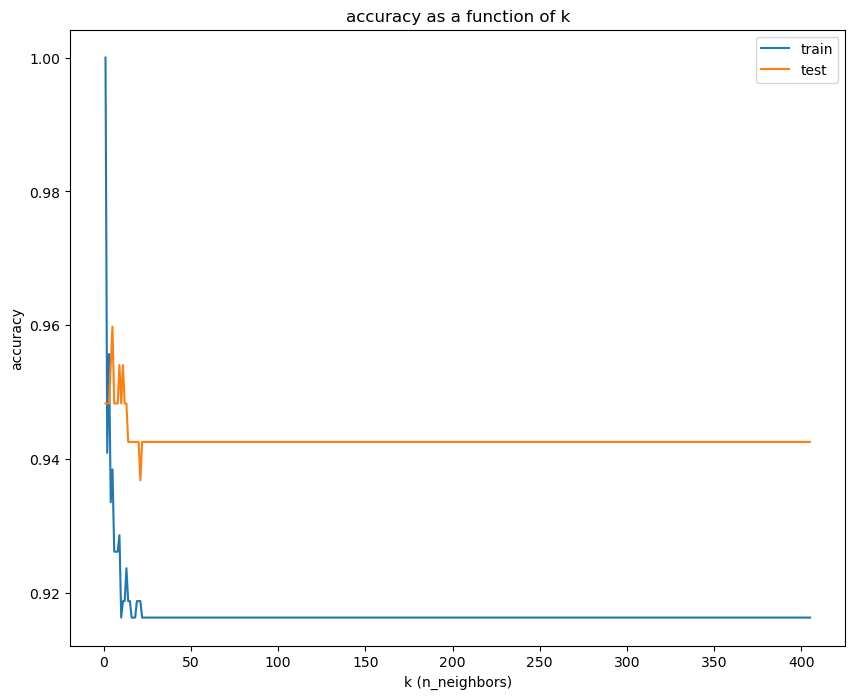

In [1819]:
# plot to see what's what
plt.figure(figsize = (10,8))
plt.plot(candidate_ks,train_accs,label = "train")
plt.plot(candidate_ks,test_accs,label = "test")
plt.title("accuracy as a function of k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("accuracy")
plt.legend()
plt.show()

A little less accurate, but closer in percentage. I'll stick with the 3 for nearest neighbors for this version.

Next, I'll test out my highest impact variables (foaceoffs lost and low danger shots for) as the dependent variables.

# LDCF and FOL as dependent variables

In [1820]:
# independent variable
y = scaled_df_08['is_good']

In [1821]:
# drop all but FOL and LDCF
X = scaled_df_08.drop(columns=['I_F_shotsOnGoal','shotsBlockedByPlayer','penalityMinutes','faceoffsWon','OnIce_A_goals','OnIce_F_reboundGoals','I_F_dZoneShiftEnds','two_way_score','off_score','def_score','is_good','OnIce_A_lowDangerShots','I_F_primaryAssists'], axis = 1)

In [1822]:
X

faceoffsLost  OnIce_F_lowDangerShots
0        1.486490                0.323660
1        0.293292               -0.500762
2       -0.622243               -0.838867
3        0.683520                0.865555
4        0.893643                0.805344
..            ...                     ...
575     -0.299554               -0.408130
576     -0.629747               -1.385394
577     -0.397111                1.078608
578      1.501498                0.629344
579     -0.584721                0.495028

[580 rows x 2 columns]

In [1823]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [1824]:
# default KNN

# 1) instantiate

LDSFA = KNeighborsClassifier()

# 2) fit (on training data)

LDSFA.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {LDSFA.score(X_train,y_train)}")
print(f"Test set accuracy: {LDSFA.score(X_test,y_test)}")

Score on training set: 0.9433497536945813
Test set accuracy: 0.9540229885057471


Pretty accurate! I'll see if it can be optimized any further

In [1825]:
# testing possible k's
candidate_ks = list(range(1,len(X_train),1))

# two empty lists to capture train and test accuracies corresponding to each k

train_accs = []
test_accs = []

for k in candidate_ks:
    
    # 1) instantiate

    df_0809_knn = KNeighborsClassifier(n_neighbors = k)

# 2) fit (on training data)

    df_0809_knn.fit(X_train,y_train)
    
    # 3) store accuracies in lists
    
    train_accs.append(df_0809_knn.score(X_train,y_train))
    test_accs.append(df_0809_knn.score(X_test,y_test))
    
    print(f"fitting with k = {k}")

fitting with k = 1
fitting with k = 2
fitting with k = 3
fitting with k = 4
fitting with k = 5
fitting with k = 6
fitting with k = 7
fitting with k = 8
fitting with k = 9
fitting with k = 10
fitting with k = 11
fitting with k = 12
fitting with k = 13
fitting with k = 14
fitting with k = 15
fitting with k = 16
fitting with k = 17
fitting with k = 18
fitting with k = 19
fitting with k = 20
fitting with k = 21
fitting with k = 22
fitting with k = 23
fitting with k = 24
fitting with k = 25
fitting with k = 26
fitting with k = 27
fitting with k = 28
fitting with k = 29
fitting with k = 30
fitting with k = 31
fitting with k = 32
fitting with k = 33
fitting with k = 34
fitting with k = 35
fitting with k = 36
fitting with k = 37
fitting with k = 38
fitting with k = 39
fitting with k = 40
fitting with k = 41
fitting with k = 42
fitting with k = 43
fitting with k = 44
fitting with k = 45
fitting with k = 46
fitting with k = 47
fitting with k = 48
fitting with k = 49
fitting with k = 50
fitting w

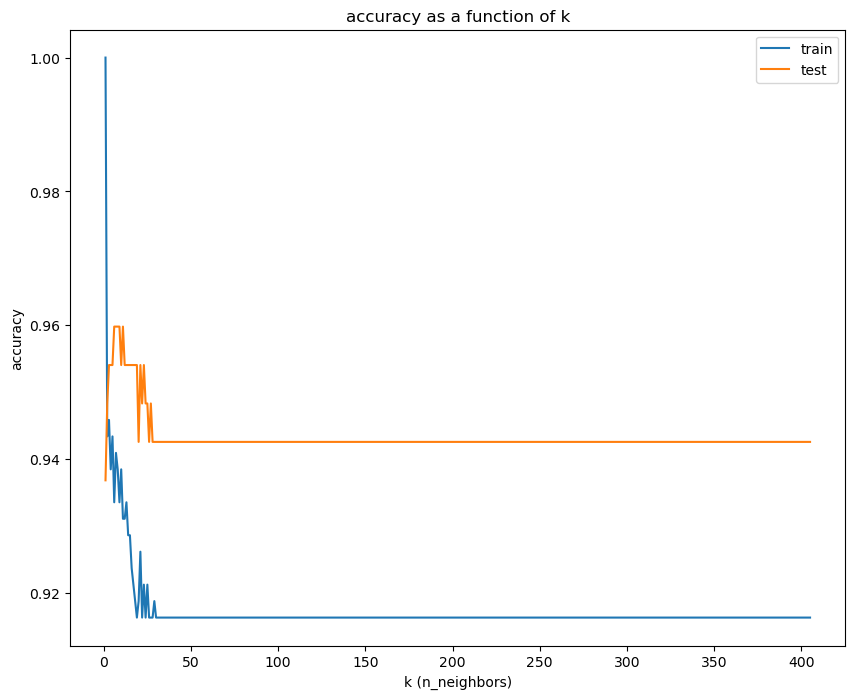

In [1826]:
# plot to see what's what
plt.figure(figsize = (10,8))
plt.plot(candidate_ks,train_accs,label = "train")
plt.plot(candidate_ks,test_accs,label = "test")
plt.title("accuracy as a function of k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("accuracy")
plt.legend()
plt.show()

This looks like two again. I'll rerun it to be sure.

In [1827]:
# default KNN

# 1) instantiate

LDSFA = KNeighborsClassifier(n_neighbors = 2)

# 2) fit (on training data)

LDSFA.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {LDSFA.score(X_train,y_train)}")
print(f"Test set accuracy: {LDSFA.score(X_test,y_test)}")

Score on training set: 0.9433497536945813
Test set accuracy: 0.9482758620689655


A little less acurate, but an almost perfect fit!
Finally, I'd lke to see what the model looks like when it's run with my offenseive and defensive score as the dependent variables. I'm thinking that it'll be the most accurate of the bunch, as my elite player threshold is created from these two columns.

In [1828]:
# independent variable
y = scaled_df_08['is_good']

In [1829]:
# all but offense and defense score dropped
X = scaled_df_08.drop(columns=['OnIce_F_lowDangerShots','OnIce_A_lowDangerShots','I_F_shotsOnGoal','shotsBlockedByPlayer','penalityMinutes','faceoffsWon','faceoffsLost','OnIce_A_goals','OnIce_F_reboundGoals','I_F_dZoneShiftEnds','two_way_score','is_good','I_F_primaryAssists'], axis = 1)

In [1830]:
# sanity check
X

off_score  def_score
0    -0.353562  -0.182555
1    -0.743752   0.207509
2    -0.901489   0.053537
3    -0.021485  -0.449441
4     0.244177  -0.634208
..         ...        ...
575  -0.776960  -1.147451
576  -1.349793  -0.398117
577   2.120412   2.188625
578   0.136252  -2.214995
579   0.302290   0.648898

[580 rows x 2 columns]

In [1831]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [1832]:
# default KNN

# 1) instantiate

off_def = KNeighborsClassifier()

# 2) fit (on training data)

off_def.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {off_def.score(X_train,y_train)}")
print(f"Test set accuracy: {off_def.score(X_test,y_test)}")

Score on training set: 0.9926108374384236
Test set accuracy: 0.9942528735632183


Assumption confirmed! These are extremely accurate, possibly collinear.

All in all, an interesting bit of information. KNN divides these players quite accurately into elite and sub elite two way forwards. It's less accurate when using all of the features and the two most impactful features compared withh offense and defensce score.

This is a positive. The offense and defense score are collinear with the "is good" column, so having my other features perform only slightly worse than collinearity is a good sign.

Nest, I'll take a look at some decision trees to see how these players get split into the elite and sub eilte categories.

# Decision Trees

First, i'll run a tree with all of the features present, minues my engineered features.

In [1833]:
from sklearn.tree import DecisionTreeClassifier

In [1834]:
# independent variable
y = scaled_df_08['is_good']

In [1835]:
# all but the engineered features dropped
X = scaled_df_08.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1836]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1837]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

# Visualize its results
#PlotBoundaries(DT_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 1.0
DT test set accuracy: 0.9252873563218391


Excellent! I'd like to try and optimize this, but this a great accuracy for the stock option

In [1838]:
# depth accuracy tester - borrowed from the DT lecture notes
depths,train_scores,test_scores = [],[],[]
for md in [1,2,3,4,5,6,7,8,9,10]:
    DT_model = DecisionTreeClassifier(max_depth=md)
    DT_model.fit(X_train, y_train)
    train_acc = DT_model.score(X_train,y_train)
    test_acc = DT_model.score(X_test,y_test)
    print("Run depth={} Train_acc={:.2f} Test_acc={:.2f}".format(md,train_acc,test_acc))
    depths.append(md)
    train_scores.append(train_acc)
    test_scores.append(test_acc)

Run depth=1 Train_acc=0.94 Test_acc=0.93
Run depth=2 Train_acc=0.97 Test_acc=0.93
Run depth=3 Train_acc=0.97 Test_acc=0.93
Run depth=4 Train_acc=0.98 Test_acc=0.93
Run depth=5 Train_acc=0.99 Test_acc=0.93
Run depth=6 Train_acc=1.00 Test_acc=0.94
Run depth=7 Train_acc=1.00 Test_acc=0.93
Run depth=8 Train_acc=1.00 Test_acc=0.93
Run depth=9 Train_acc=1.00 Test_acc=0.92
Run depth=10 Train_acc=1.00 Test_acc=0.92


Thest best accuracy here is a run depth of 3. I'll visualize it to check

Text(0.5, 0, 'Max_Depth')

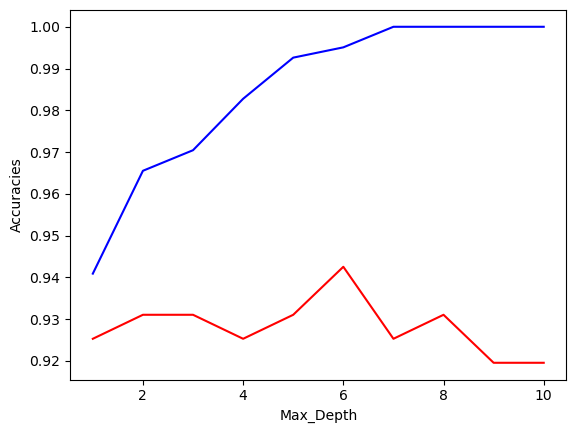

In [1839]:
# plot to vizualize
fig,ax = plt.subplots()
ax.plot(depths,train_scores,color='blue')
ax.plot(depths,test_scores,color='r')
ax.set_ylabel("Accuracies")
ax.set_xlabel("Max_Depth")

This looks closer at 3 depth. I'll check that first

In [1973]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train, y_train)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.9324586977648203
DT test set accuracy: 0.9353985644125425


Let's see how the model separated the players

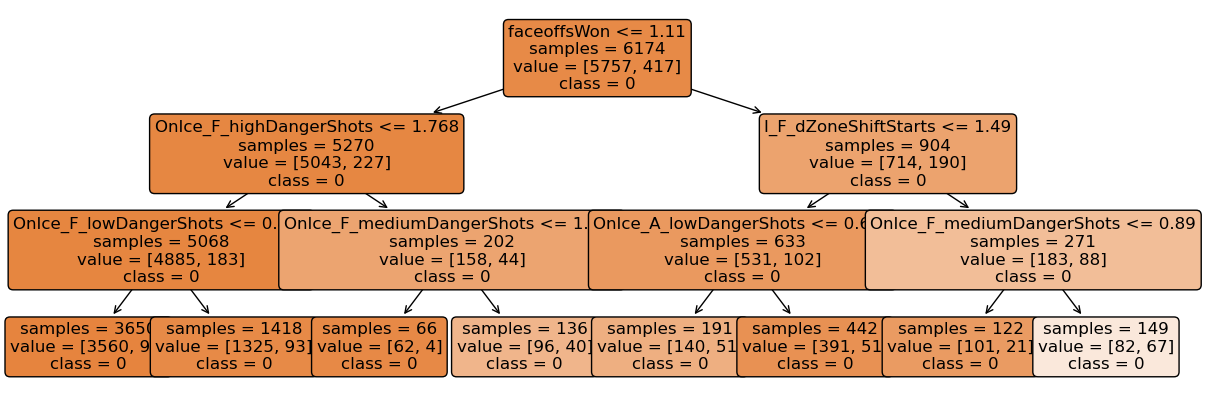

In [1974]:
# size for our tree figure
fig, ax = plt.subplots(figsize=(15,5))

plot_tree(DT_model,
          feature_names=X.columns,
          class_names=["0","1"],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

This is interesting. Having the first split being low danger shots for tracks perfectly with what was found in the logistic regression. The model split on the variable with the highest positive correlation to being and elite player. 


# What's next?

I've tested logistic regression, KNN and Decision trees on one season of data from 2008. Next, I'll comboine all of the datasets from moneypuck.com (2008-2022) and run the same analysis to see if there's any change with a massive increase in data.

# 2009- 2022

I'll follow the exact same process for creating this dataframe and the feature engineering as i did for the 2008 dataset

In [1842]:
# creating a dataframe for all years of data for analysis

# 2008
df_08 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Downloads/skaters.csv', index_col=2)
# 2009
df_09 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 09:10.csv', index_col=2)
# 2010
df_10 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 10:11.csv', index_col=2)
# 2011
df_11 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 11:12.csv', index_col=2)
# 2012
df_12 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 12:13.csv', index_col=2)
# 2013
df_13 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 13:14.csv', index_col=2)
# 2014
df_14 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 14:15.csv', index_col=2)
# 2015
df_15 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 15:16.csv', index_col=2)
# 2016
df_16 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 16:17.csv', index_col=2)
# 2017
df_17 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 17:18.csv', index_col=2)
# 2018
df_18 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 18:19.csv', index_col=2)
# 2019
df_19 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 19:20.csv', index_col=2)
# 2020
df_20 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 20:21.csv', index_col=2)
# 2021
df_21 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 21:22.csv', index_col=2)
# 2022
df_22 = pd.read_csv('/Users/hannatapang/Dropbox/Mac (3)/Desktop/Money puck raw data/skaters 22:23.csv', index_col=2)


In [1843]:
# concat all the frames
all_years_df = pd.concat([df_08, df_09, df_10,
                          df_11, df_12, df_13,
                          df_14, df_15, df_16,
                          df_17, df_18, df_19,
                          df_20, df_21, df_22])

In [1844]:
# sanity check 1
all_years_df.head()

playerId  season team position situation  games_played  \
name                                                                       
Stephane Robidas   8462196    2008  DAL        D     other            72   
Stephane Robidas   8462196    2008  DAL        D       all            72   
Stephane Robidas   8462196    2008  DAL        D      5on5            72   
Stephane Robidas   8462196    2008  DAL        D      4on5            72   
Stephane Robidas   8462196    2008  DAL        D      5on4            72   

                   icetime  shifts  gameScore  onIce_xGoalsPercentage  ...  \
name                                                                   ...   
Stephane Robidas    6729.0   105.0      31.93                    0.51  ...   
Stephane Robidas  105958.0  2026.0      31.71                    0.53  ...   
Stephane Robidas   74053.0  1480.0      31.71                    0.51  ...   
Stephane Robidas   10397.0   235.0      30.26                    0.07  ...   
Stephane Robidas   14779.0   206.0      31.69                    0.92  ...   

                  OffIce_F_xGoals  OffIce_A_xGoals  OffIce_F_shotAttempts  \
name                                                                        
Stephane Robidas             6.79            12.11                  106.0   
Stephane Robidas            95.61           116.39                 2161.0   
Stephane Robidas            66.29            74.66                 1678.0   
Stephane Robidas             2.24            27.37                   57.0   
Stephane Robidas            19.15             1.47                  294.0   

                  OffIce_A_shotAttempts  xGoalsForAfterShifts  \
name                                                            
Stephane Robidas                  122.0                  0.14   
Stephane Robidas                 2223.0                  0.00   
Stephane Robidas                 1647.0                  3.64   
Stephane Robidas                  380.0                  0.15   
Stephane Robidas                   42.0                  0.13   

                  xGoalsAgainstAfterShifts  corsiForAfterShifts  \
name                                                              
Stephane Robidas                      0.00                  4.0   
Stephane Robidas                      0.00                  0.0   
Stephane Robidas                      0.18                 91.0   
Stephane Robidas                      0.00                  3.0   
Stephane Robidas                      0.00                  6.0   

                  corsiAgainstAfterShifts  fenwickForAfterShifts  \
name                                                               
Stephane Robidas                      0.0                    3.0   
Stephane Robidas                      0.0                    0.0   
Stephane Robidas                     10.0                   74.0   
Stephane Robidas                      0.0                    3.0   
Stephane Robidas                      0.0                    6.0   

                  fenwickAgainstAfterShifts  
name                                         
Stephane Robidas                        0.0  
Stephane Robidas                        0.0  
Stephane Robidas                        8.0  
Stephane Robidas                        0.0  
Stephane Robidas                        0.0  

[5 rows x 153 columns]

In [1845]:
# sanity check 2
all_years_df.tail()

playerId  season team position situation  games_played  icetime  \
name                                                                        
Matt Roy   8478911    2022  LAK        D     other            82   3806.0   
Matt Roy   8478911    2022  LAK        D       all            82  92377.0   
Matt Roy   8478911    2022  LAK        D      5on5            82  78783.0   
Matt Roy   8478911    2022  LAK        D      4on5            82   9555.0   
Matt Roy   8478911    2022  LAK        D      5on4            82    233.0   

          shifts  gameScore  onIce_xGoalsPercentage  ...  OffIce_F_xGoals  \
name                                                 ...                    
Matt Roy    64.0      31.22                    0.52  ...            18.75   
Matt Roy  1802.0      40.08                    0.51  ...           192.70   
Matt Roy  1522.0      40.08                    0.56  ...           117.82   
Matt Roy   196.0      38.80                    0.17  ...             2.74   
Matt Roy    20.0      16.30                    0.73  ...            13.12   

          OffIce_A_xGoals  OffIce_F_shotAttempts  OffIce_A_shotAttempts  \
name                                                                      
Matt Roy            13.85                  147.0                  140.0   
Matt Roy           161.97                 3415.0                 3001.0   
Matt Roy           109.30                 2509.0                 2289.0   
Matt Roy            27.57                   45.0                  435.0   
Matt Roy             1.57                  172.0                   32.0   

          xGoalsForAfterShifts  xGoalsAgainstAfterShifts  corsiForAfterShifts  \
name                                                                            
Matt Roy                  0.01                      0.00                  2.0   
Matt Roy                  0.00                      0.00                  0.0   
Matt Roy                  3.43                      0.92                 87.0   
Matt Roy                  0.48                      0.00                  3.0   
Matt Roy                  0.00                      0.00                  2.0   

          corsiAgainstAfterShifts  fenwickForAfterShifts  \
name                                                       
Matt Roy                      0.0                    1.0   
Matt Roy                      0.0                    0.0   
Matt Roy                     12.0                   68.0   
Matt Roy                      0.0                    3.0   
Matt Roy                      0.0                    0.0   

          fenwickAgainstAfterShifts  
name                                 
Matt Roy                        0.0  
Matt Roy                        0.0  
Matt Roy                        8.0  
Matt Roy                        0.0  
Matt Roy                        0.0  

[5 rows x 153 columns]

It worked! glad to see this come together.

In [1846]:
# keep 5 on 5 situation
all_years_df = pd.Dataframe = all_years_df[all_years_df['situation'] == '5on5']
all_years_df.head()

playerId  season team position situation  games_played  \
name                                                                       
Stephane Robidas   8462196    2008  DAL        D      5on5            72   
Frans Nielsen      8470144    2008  NYI        C      5on5            59   
Jay Leach          8467436    2008  N.J        D      5on5            24   
Jaroslav Spacek    8467439    2008  BUF        D      5on5            80   
Brandon Sutter     8474091    2008  CAR        C      5on5            50   

                  icetime  shifts  gameScore  onIce_xGoalsPercentage  ...  \
name                                                                  ...   
Stephane Robidas  74053.0  1480.0      31.71                    0.51  ...   
Frans Nielsen     38706.0   896.0      32.70                    0.48  ...   
Jay Leach         19220.0   420.0       0.37                    0.48  ...   
Jaroslav Spacek   74211.0  1613.0      51.55                    0.57  ...   
Brandon Sutter    19559.0   450.0       8.06                    0.52  ...   

                  OffIce_F_xGoals  OffIce_A_xGoals  OffIce_F_shotAttempts  \
name                                                                        
Stephane Robidas            66.29            74.66                 1678.0   
Frans Nielsen               73.47            84.18                 1790.0   
Jay Leach                   27.40            27.15                  715.0   
Jaroslav Spacek             79.20            85.08                 1961.0   
Brandon Sutter              80.67            75.60                 1994.0   

                  OffIce_A_shotAttempts  xGoalsForAfterShifts  \
name                                                            
Stephane Robidas                 1647.0                  3.64   
Frans Nielsen                    2160.0                  2.31   
Jay Leach                         624.0                  1.19   
Jaroslav Spacek                  2201.0                  4.69   
Brandon Sutter                   1739.0                  0.61   

                  xGoalsAgainstAfterShifts  corsiForAfterShifts  \
name                                                              
Stephane Robidas                      0.18                 91.0   
Frans Nielsen                         1.46                 42.0   
Jay Leach                             0.34                 29.0   
Jaroslav Spacek                       1.40                128.0   
Brandon Sutter                        0.28                 19.0   

                  corsiAgainstAfterShifts  fenwickForAfterShifts  \
name                                                               
Stephane Robidas                     10.0                   74.0   
Frans Nielsen                        42.0                   32.0   
Jay Leach                            10.0                   19.0   
Jaroslav Spacek                      36.0                  108.0   
Brandon Sutter                       13.0                   17.0   

                  fenwickAgainstAfterShifts  
name                                         
Stephane Robidas                        8.0  
Frans Nielsen                          29.0  
Jay Leach                               6.0  
Jaroslav Spacek                        27.0  
Brandon Sutter                         10.0  

[5 rows x 153 columns]

In [1847]:
#drop defensemen from the df
all_years_df.drop(all_years_df.index[(all_years_df['position'] == 'D')], inplace=True)
all_years_df.head(15)
# 15 so I can see a lot of different players in the df to confirm no defensemen

playerId  season team position situation  games_played  \
name                                                                       
Frans Nielsen      8470144    2008  NYI        C      5on5            59   
Brandon Sutter     8474091    2008  CAR        C      5on5            50   
Martins Karsums    8471277    2008  T.B        R      5on5            24   
Brendan Morrison   8459461    2008  DAL        C      5on5            81   
Wojtek Wolski      8471234    2008  COL        L      5on5            78   
Anze Kopitar       8471685    2008  L.A        C      5on5            82   
Paul Stastny       8471669    2008  COL        C      5on5            45   
Jay Pandolfo       8459454    2008  N.J        L      5on5            61   
Eric Fehr          8470611    2008  WSH        C      5on5            61   
P.J. Axelsson      8462209    2008  BOS        L      5on5            74   
Brenden Morrow     8466160    2008  DAL        L      5on5            18   
Nate Thompson      8470775    2008  NYI        C      5on5            43   
Nikolay Kulemin    8473579    2008  TOR        L      5on5            72   
Bill Guerin        8456464    2008  PIT        R      5on5            78   
Andrew Ebbett      8473682    2008  ANA        C      5on5            48   

                  icetime  shifts  gameScore  onIce_xGoalsPercentage  ...  \
name                                                                  ...   
Frans Nielsen     38706.0   896.0      32.70                    0.48  ...   
Brandon Sutter    19559.0   450.0       8.06                    0.52  ...   
Martins Karsums   15665.0   374.0       6.11                    0.48  ...   
Brendan Morrison  54157.0  1140.0      31.50                    0.48  ...   
Wojtek Wolski     61577.0  1334.0      32.88                    0.49  ...   
Anze Kopitar      70574.0  1408.0      76.67                    0.56  ...   
Paul Stastny      38223.0   844.0      34.35                    0.57  ...   
Jay Pandolfo      43991.0   935.0       6.72                    0.43  ...   
Eric Fehr         37910.0   764.0      41.74                    0.61  ...   
P.J. Axelsson     51865.0  1097.0      23.58                    0.45  ...   
Brenden Morrow    14578.0   262.0      10.77                    0.48  ...   
Nate Thompson     23381.0   594.0       0.87                    0.45  ...   
Nikolay Kulemin   51112.0  1101.0      32.09                    0.48  ...   
Bill Guerin       57236.0  1236.0      43.93                    0.45  ...   
Andrew Ebbett     33437.0   704.0      37.17                    0.56  ...   

                  OffIce_F_xGoals  OffIce_A_xGoals  OffIce_F_shotAttempts  \
name                                                                        
Frans Nielsen               73.47            84.18                 1790.0   
Brandon Sutter              80.67            75.60                 1994.0   
Martins Karsums             28.94            32.08                  683.0   
Brendan Morrison           100.44            95.93                 2287.0   
Wojtek Wolski               94.10            91.89                 2158.0   
Anze Kopitar                85.43            89.17                 2048.0   
Paul Stastny                48.79            57.05                 1149.0   
Jay Pandolfo                84.34            64.61                 2061.0   
Eric Fehr                   86.22            77.60                 2194.0   
P.J. Axelsson              102.49            94.12                 2361.0   
Brenden Morrow              16.06            20.40                  421.0   
Nate Thompson               55.55            69.18                 1381.0   
Nikolay Kulemin            105.76           103.99                 2433.0   
Bill Guerin                 93.10            96.34                 2283.0   
Andrew Ebbett               58.54            51.50                 1363.0   

                  OffIce_A_shotAttempts  xGoalsForAfterShifts  \
name                                    

In [1848]:
# new df with only the columns I want for ML
all_years_df_new =all_years_df[['I_F_goals','I_F_primaryAssists','I_F_secondaryAssists',
                      'I_F_shotsOnGoal','shotsBlockedByPlayer','penalityMinutesDrawn',
                      'penalityMinutes','faceoffsWon','faceoffsLost',
                      'OnIce_F_goals','OnIce_A_goals',
                      'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                      'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                      'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                      'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                      'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots']] 

In [1849]:
# sanity check
all_years_df_new.head(1)

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                 
Frans Nielsen        5.0                 4.0                   4.0   

               I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                         
Frans Nielsen             66.0                  30.0                  43.0   

               penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  ...  \
name                                                                      ...   
Frans Nielsen             12.0        243.0         282.0           23.0  ...   

               OnIce_F_reboundGoals  OnIce_A_reboundGoals  \
name                                                        
Frans Nielsen                   5.0                   5.0   

               I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
name                                                                            
Frans Nielsen                 125.0                 112.0               108.0   

               I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                           
Frans Nielsen               145.0                       66.0   

               OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                               
Frans Nielsen                   371.0                       75.0   

               OnIce_A_lowDangerShots  
name                                   
Frans Nielsen                   383.0  

[1 rows x 25 columns]

In [1850]:
# add/subtract columns to create new statistics
for ind, row in  all_years_df_new.iterrows():
     all_years_df_new.loc[ind,"points"]  = row['I_F_goals'] + row['I_F_primaryAssists'] + row['I_F_secondaryAssists']
     all_years_df_new.loc[ind,"shots"]  = row['I_F_shotsOnGoal'] + row['shotsBlockedByPlayer'] 
     all_years_df_new.loc[ind,"penalties"]  = row['penalityMinutesDrawn'] - row['penalityMinutes'] 
     all_years_df_new.loc[ind,"faceoffs"]  = row['faceoffsWon'] - row['faceoffsLost'] 
     all_years_df_new.loc[ind,"plus/minus"]  = row['OnIce_F_goals'] - row['OnIce_A_goals']  
     all_years_df_new.loc[ind,"puck responsibility"]  = row['I_F_takeaways'] - row['I_F_giveaways'] 
     all_years_df_new.loc[ind,"HDC"]  = row['OnIce_F_highDangerShots'] + row['OnIce_A_highDangerShots'] 
     all_years_df_new.loc[ind,"rebounds"]  = row['OnIce_F_reboundGoals'] + row['OnIce_A_reboundGoals'] 
     all_years_df_new.loc[ind,"puck transportation"]  = row['I_F_dZoneShiftStarts'] - row['I_F_oZoneShiftStarts'] + row['I_F_oZoneShiftEnds'] - row['I_F_dZoneShiftEnds'] 
     all_years_df_new.loc[ind,"chance gradient"]  = row['OnIce_F_highDangerShots'] + row['OnIce_F_mediumDangerShots'] + row['OnIce_F_lowDangerShots'] - row['OnIce_A_highDangerShots'] -   row['OnIce_A_mediumDangerShots'] - row['OnIce_A_lowDangerShots']  

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/734412945.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/734412945.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/734412945.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [1851]:
all_years_df_new.head(1)

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                 
Frans Nielsen        5.0                 4.0                   4.0   

               I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                         
Frans Nielsen             66.0                  30.0                  43.0   

               penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  ...  \
name                                                                      ...   
Frans Nielsen             12.0        243.0         282.0           23.0  ...   

               points  shots  penalties  faceoffs  plus/minus  \
name                                                            
Frans Nielsen     6.0   31.0        4.0      -1.0        -3.0   

               puck responsibility   HDC  rebounds  puck transportation  \
name                                                                      
Frans Nielsen                  1.0  21.0       1.0                -18.0   

               chance gradient  
name                            
Frans Nielsen            -28.0  

[1 rows x 35 columns]

In [1852]:
# create offensive score and defensive score
for ind, row in  all_years_df_new.iterrows():
     all_years_df_new.loc[ind,"off_score"]  = row['points'] + row['shots'] + row['penalties'] + row['faceoffs'] + row['plus/minus']
     all_years_df_new.loc[ind,"def_score"]  = row['puck responsibility'] + row['HDC'] + row['rebounds'] + row['puck transportation'] + row['chance gradient']   

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2264494469.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/2264494469.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1853]:
all_years_df_new.head(1)

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                 
Frans Nielsen        5.0                 4.0                   4.0   

               I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                         
Frans Nielsen             66.0                  30.0                  43.0   

               penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  ...  \
name                                                                      ...   
Frans Nielsen             12.0        243.0         282.0           23.0  ...   

               penalties  faceoffs  plus/minus  puck responsibility   HDC  \
name                                                                        
Frans Nielsen        4.0      -1.0        -3.0                  1.0  21.0   

               rebounds  puck transportation  chance gradient  off_score  \
name                                                                       
Frans Nielsen       1.0                -18.0            -28.0       37.0   

               def_score  
name                      
Frans Nielsen      -23.0  

[1 rows x 37 columns]

In [1854]:
# create final metric, two way score!
for ind, row in  all_years_df_new.iterrows():
     all_years_df_new.loc[ind,"two_way_score"]  = row['off_score'] + row['def_score']

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1565968197.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1855]:
#OK! data is ready to begin the ML process
all_years_df_new.head(1)

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                 
Frans Nielsen        5.0                 4.0                   4.0   

               I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                         
Frans Nielsen             66.0                  30.0                  43.0   

               penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  ...  \
name                                                                      ...   
Frans Nielsen             12.0        243.0         282.0           23.0  ...   

               faceoffs  plus/minus  puck responsibility   HDC  rebounds  \
name                                                                       
Frans Nielsen      -1.0        -3.0                  1.0  21.0       1.0   

               puck transportation  chance gradient  off_score  def_score  \
name                                                                        
Frans Nielsen                -18.0            -28.0       37.0      -23.0   

               two_way_score  
name                          
Frans Nielsen           14.0  

[1 rows x 38 columns]

In [1856]:
# sanity check
all_years_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, Frans Nielsen to Tyler Pitlick
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   I_F_goals                  8821 non-null   float64
 1   I_F_primaryAssists         8821 non-null   float64
 2   I_F_secondaryAssists       8821 non-null   float64
 3   I_F_shotsOnGoal            8821 non-null   float64
 4   shotsBlockedByPlayer       8821 non-null   float64
 5   penalityMinutesDrawn       8821 non-null   float64
 6   penalityMinutes            8821 non-null   float64
 7   faceoffsWon                8821 non-null   float64
 8   faceoffsLost               8821 non-null   float64
 9   OnIce_F_goals              8821 non-null   float64
 10  OnIce_A_goals              8821 non-null   float64
 11  I_F_takeaways              8821 non-null   float64
 12  I_F_giveaways              8821 non-null   float64
 13  OnIce_F_highDangerShots    8821 

Now I'll drop my engineered features.

In [1857]:
# drop my engineered features
all_years_df_new.drop(columns = 'points', inplace = True)
all_years_df_new.drop(columns = 'shots', inplace = True)
all_years_df_new.drop(columns = 'penalties', inplace = True)
all_years_df_new.drop(columns = 'faceoffs', inplace = True)
all_years_df_new.drop(columns = 'plus/minus', inplace = True)
all_years_df_new.drop(columns = 'puck responsibility', inplace = True)
all_years_df_new.drop(columns = 'HDC', inplace = True)
all_years_df_new.drop(columns = 'rebounds', inplace = True)
all_years_df_new.drop(columns = 'puck transportation', inplace = True)
all_years_df_new.drop(columns = 'chance gradient', inplace = True)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1873496574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1873496574.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/1873496574.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipyker

In [1858]:
# sanity check
all_years_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, Frans Nielsen to Tyler Pitlick
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   I_F_goals                  8821 non-null   float64
 1   I_F_primaryAssists         8821 non-null   float64
 2   I_F_secondaryAssists       8821 non-null   float64
 3   I_F_shotsOnGoal            8821 non-null   float64
 4   shotsBlockedByPlayer       8821 non-null   float64
 5   penalityMinutesDrawn       8821 non-null   float64
 6   penalityMinutes            8821 non-null   float64
 7   faceoffsWon                8821 non-null   float64
 8   faceoffsLost               8821 non-null   float64
 9   OnIce_F_goals              8821 non-null   float64
 10  OnIce_A_goals              8821 non-null   float64
 11  I_F_takeaways              8821 non-null   float64
 12  I_F_giveaways              8821 non-null   float64
 13  OnIce_F_highDangerShots    8821 

In [1859]:
# final look before scaling
all_years_df_new.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                    
Frans Nielsen           5.0                 4.0                   4.0   
Brandon Sutter          0.0                 3.0                   2.0   
Martins Karsums         1.0                 3.0                   0.0   
Brendan Morrison       13.0                 7.0                   3.0   
Wojtek Wolski          10.0                11.0                   5.0   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen                66.0                  30.0                  43.0   
Brandon Sutter               51.0                   8.0                  26.0   
Martins Karsums              28.0                  12.0                  10.0   
Brendan Morrison             88.0                  11.0                  26.0   
Wojtek Wolski               122.0                  25.0                  30.0   

                  penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  \
name                                                                          
Frans Nielsen                12.0        243.0         282.0           23.0   
Brandon Sutter               16.0         93.0         123.0            9.0   
Martins Karsums               6.0          1.0           1.0            6.0   
Brendan Morrison             26.0        153.0         175.0           34.0   
Wojtek Wolski                18.0        185.0         203.0           37.0   

                  ...  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
name              ...                                             
Frans Nielsen     ...                 112.0               108.0   
Brandon Sutter    ...                  56.0                92.0   
Martins Karsums   ...                  34.0                62.0   
Brendan Morrison  ...                 156.0               205.0   
Wojtek Wolski     ...                 155.0               212.0   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen                  145.0                       66.0   
Brandon Sutter                  56.0                       29.0   
Martins Karsums                 42.0                       32.0   
Brendan Morrison               200.0                       88.0   
Wojtek Wolski                  177.0                      118.0   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                      371.0                       75.0   
Brandon Sutter                     193.0                       31.0   
Martins Karsums                    120.0                       37.0   
Brendan Morrison                   488.0                       93.0   
Wojtek Wolski                      475.0                      130.0   

                  OnIce_A_lowDangerShots  off_score  def_score  two_way_score  
name                                                                           
Frans Nielsen                      383.0       37.0      -23.0           14.0  
Brandon Sutter                     195.0      131.0       59.0          190.0  
Martins Karsums                    119.0       43.0       41.0           84.0  
Brendan Morrison                   488.0       49.0      -15.0           34.0  
Wojtek Wolski                      589.0       56.0       83.0          139.0  

[5 rows x 28 columns]

In [1860]:
names_index = all_years_df_new.index 

In [1861]:
new_df_all = all_years_df_new
scaler = StandardScaler()
scaled_df_new_all = scaler.fit_transform(new_df_all)

In [1862]:
# i have a new dataframe! I just have to the names back in somehow...
scaled_all_ml_df = pd.DataFrame(scaled_df_new_all , columns = ['I_F_goals','I_F_primaryAssists','I_F_secondaryAssists',
                                                  'I_F_shotsOnGoal','shotsBlockedByPlayer','penalityMinutesDrawn',
                                                  'penalityMinutes','faceoffsWon','faceoffsLost',
                                                  'OnIce_F_goals','OnIce_A_goals',
                                                  'I_F_takeaways','I_F_giveaways','OnIce_F_highDangerShots',
                                                  'OnIce_A_highDangerShots','OnIce_F_reboundGoals','OnIce_A_reboundGoals',
                                                  'I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','I_F_oZoneShiftEnds',
                                                  'I_F_dZoneShiftEnds','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots',
                                                  'OnIce_A_mediumDangerShots','OnIce_A_lowDangerShots','off_score',
                                                  'def_score','two_way_score'
                                                  ],index = names_index)



In [1863]:
# sanity check
scaled_all_ml_df.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                    
Frans Nielsen     -0.237077           -0.250327              0.127284   
Brandon Sutter    -1.063205           -0.441029             -0.444830   
Martins Karsums   -0.897979           -0.441029             -1.016944   
Brendan Morrison   1.084727            0.321778             -0.158773   
Wojtek Wolski      0.589050            1.084586              0.413341   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen           -0.033742              0.935235              0.976128   
Brandon Sutter          -0.318095             -0.675664              0.177518   
Martins Karsums         -0.754102             -0.382774             -0.574115   
Brendan Morrison         0.383308             -0.455996              0.177518   
Wojtek Wolski            1.027840              0.569122              0.365426   

                  penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  \
name                                                                          
Frans Nielsen           -0.387457     1.045998      1.382339       0.025426   
Brandon Sutter          -0.204604     0.032194      0.248235      -0.728289   
Martins Karsums         -0.661738    -0.589605     -0.621958      -0.889800   
Brendan Morrison         0.252530     0.437716      0.619137       0.617631   
Wojtek Wolski           -0.113177     0.653994      0.818854       0.779142   

                  ...  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
name              ...                                             
Frans Nielsen     ...              0.181809           -0.123518   
Brandon Sutter    ...             -0.575219           -0.329646   
Martins Karsums   ...             -0.872623           -0.716137   
Brendan Morrison  ...              0.776617            1.126133   
Wojtek Wolski     ...              0.763099            1.216315   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen               0.463878                  -0.110593   
Brandon Sutter             -0.735688                  -0.777810   
Martins Karsums            -0.924384                  -0.723711   
Brendan Morrison            1.205183                   0.286130   
Wojtek Wolski               0.895183                   0.827117   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                   0.326688                   0.059841   
Brandon Sutter                 -0.503350                  -0.790516   
Martins Karsums                -0.843759                  -0.674558   
Brendan Morrison                0.872275                   0.407715   
Wojtek Wolski                   0.811655                   1.122788   

                  OnIce_A_lowDangerShots  off_score  def_score  two_way_score  
name                                                                           
Frans Nielsen                   0.405509  -0.563079  -0.554165      -0.650564  
Brandon Sutter                 -0.513918   0.493803   0.228372       0.408142  
Martins Karsums                -0.885601  -0.495618   0.056596      -0.229488  
Brendan Morrison                0.919018  -0.428157  -0.477820      -0.530257  
Wojtek Wolski                   1.412966  -0.349454   0.457407       0.101358  

[5 rows x 28 columns]

In [1864]:
# elite vs sub elite classifier
scaled_all_ml_df['is_good'] = np.where(((scaled_all_ml_df['off_score']>1) & (scaled_all_ml_df['def_score']>1)), 1, 0)

In [1865]:
# sanity check
scaled_all_ml_df.head()

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                    
Frans Nielsen     -0.237077           -0.250327              0.127284   
Brandon Sutter    -1.063205           -0.441029             -0.444830   
Martins Karsums   -0.897979           -0.441029             -1.016944   
Brendan Morrison   1.084727            0.321778             -0.158773   
Wojtek Wolski      0.589050            1.084586              0.413341   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen           -0.033742              0.935235              0.976128   
Brandon Sutter          -0.318095             -0.675664              0.177518   
Martins Karsums         -0.754102             -0.382774             -0.574115   
Brendan Morrison         0.383308             -0.455996              0.177518   
Wojtek Wolski            1.027840              0.569122              0.365426   

                  penalityMinutes  faceoffsWon  faceoffsLost  OnIce_F_goals  \
name                                                                          
Frans Nielsen           -0.387457     1.045998      1.382339       0.025426   
Brandon Sutter          -0.204604     0.032194      0.248235      -0.728289   
Martins Karsums         -0.661738    -0.589605     -0.621958      -0.889800   
Brendan Morrison         0.252530     0.437716      0.619137       0.617631   
Wojtek Wolski           -0.113177     0.653994      0.818854       0.779142   

                  ...  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name              ...                                           
Frans Nielsen     ...           -0.123518            0.463878   
Brandon Sutter    ...           -0.329646           -0.735688   
Martins Karsums   ...           -0.716137           -0.924384   
Brendan Morrison  ...            1.126133            1.205183   
Wojtek Wolski     ...            1.216315            0.895183   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                     -0.110593                0.326688   
Brandon Sutter                    -0.777810               -0.503350   
Martins Karsums                   -0.723711               -0.843759   
Brendan Morrison                   0.286130                0.872275   
Wojtek Wolski                      0.827117                0.811655   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  \
name                                                                  
Frans Nielsen                      0.059841                0.405509   
Brandon Sutter                    -0.790516               -0.513918   
Martins Karsums                   -0.674558               -0.885601   
Brendan Morrison                   0.407715                0.919018   
Wojtek Wolski                      1.122788                1.412966   

                  off_score  def_score  two_way_score  is_good  
name                                                            
Frans Nielsen     -0.563079  -0.554165      -0.650564        0  
Brandon Sutter     0.493803   0.228372       0.408142        0  
Martins Karsums   -0.495618   0.056596      -0.229488        0  
Brendan Morrison  -0.428157  -0.477820      -0.530257        0  
Wojtek Wolski     -0.349454   0.457407       0.101358        0  

[5 rows x 29 columns]

In [1866]:
scaled_all_ml_df

I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                     
Frans Nielsen      -0.237077           -0.250327              0.127284   
Brandon Sutter     -1.063205           -0.441029             -0.444830   
Martins Karsums    -0.897979           -0.441029             -1.016944   
Brendan Morrison    1.084727            0.321778             -0.158773   
Wojtek Wolski       0.589050            1.084586              0.413341   
...                      ...                 ...                   ...   
Oskar Lindblom     -0.071852           -0.441029              0.413341   
Vinnie Hinostroza  -0.732754           -0.250327              0.127284   
Rasmus Asplund     -0.897979           -0.822433              0.127284   
Ross Johnston      -1.063205           -0.631731             -1.016944   
Tyler Pitlick       0.093374            0.321778             -0.444830   

                   I_F_shotsOnGoal  shotsBlockedByPlayer  \
name                                                       
Frans Nielsen            -0.033742              0.935235   
Brandon Sutter           -0.318095             -0.675664   
Martins Karsums          -0.754102             -0.382774   
Brendan Morrison          0.383308             -0.455996   
Wojtek Wolski             1.027840              0.569122   
...                            ...                   ...   
Oskar Lindblom            0.042085              0.349454   
Vinnie Hinostroza        -0.583490             -0.748887   
Rasmus Asplund           -0.431836             -0.748887   
Ross Johnston            -1.246979             -0.895333   
Tyler Pitlick            -0.299138              0.788790   

                   penalityMinutesDrawn  penalityMinutes  faceoffsWon  \
name                                                                    
Frans Nielsen                  0.976128        -0.387457     1.045998   
Brandon Sutter                 0.177518        -0.204604     0.032194   
Martins Karsums               -0.574115        -0.661738    -0.589605   
Brendan Morrison               0.177518         0.252530     0.437716   
Wojtek Wolski                  0.365426        -0.113177     0.653994   
...                                 ...              ...          ...   
Oskar Lindblom                -0.762023        -0.296031    -0.542294   
Vinnie Hinostroza             -0.480161        -0.661738    -0.589605   
Rasmus Asplund                -0.574115        -0.753164    -0.481466   
Ross Johnston                 -0.057367         0.298243    -0.589605   
Tyler Pitlick                  0.083564        -0.296031    -0.582846   

                   faceoffsLost  OnIce_F_goals  ...  I_F_oZoneShiftEnds  \
name                                            ...                       
Frans Nielsen          1.382339       0.025426  ...           -0.123518   
Brandon Sutter         0.248235      -0.728289  ...           -0.329646   
Martins Karsums       -0.621958      -0.889800  ...           -0.716137   
Brendan Morrison       0.619137       0.617631  ...            1.126133   
Wojtek Wolski          0.818854       0.779142  ...            1.216315   
...                         ...            ...  ...                 ...   
Oskar Lindblom        -0.557763       0.025426  ...            0.481983   
Vinnie Hinostroza     -0.607692      -0.459105  ...           -0.316763   
Rasmus Asplund        -0.429374      -0.459105  ...            0.082610   
Ross Johnston         -0.629090      -0.997473  ...           -1.295872   
Tyler Pitlick         -0.614825       0.025426  ...            0.018195   

                   I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                               
Frans Nielsen                0.463878                  -0.110593   
Brandon Sutter              -0.735688                  -0.777810   
Martins Karsums             -0.924384                  -0.723711   
Brendan M

In [2074]:
fig = px.scatter(
        data_frame=scaled_all_ml_df ,
        x='off_score',
        y='def_score',
        labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Scaled Offense and Defense Player Scores")
fig.show()

Small note here. I've removed the "year" column, as it gets scaled like every other variable that goes through the scaler. Plotly express seems to be pulling only players from one year, and not all of the players from each year. There's almost 9000 rows in this dataset and this plot isn't showing that.

In [1868]:
# value counts
scaled_all_ml_df["is_good"].value_counts()

0    8233
1     588
Name: is_good, dtype: int64

In [2075]:
# plot showing the elite players
fig = px.scatter(
        data_frame=scaled_all_ml_df ,
        x='off_score',
        y='def_score',
        labels={
                     "off_score": "Offense Score",
                     "def_score": "Defense Score",
                     
                 },
                title="Scaled Offense and Defense Elite Two Way Player Scores")
fig.update_xaxes(range=[1, 6])
fig.update_yaxes(range=[1, 6])
fig.show()

Dataframe is ready for analysis!

# Logistic Regression On All Years

I'm starting with the same strategy as on my single year dataframe. I'll do logistic regression, reduce dimennsionality with the higher p-values and moe on to some KNN and Decision Trees after that.

In [1870]:
# Separate the data into dependent and independent variables

y = scaled_all_ml_df['is_good']

In [1871]:
# drop all but the engineered features
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1872]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                           
Frans Nielsen       1.0  -0.237077           -0.250327              0.127284   
Brandon Sutter      1.0  -1.063205           -0.441029             -0.444830   
Martins Karsums     1.0  -0.897979           -0.441029             -1.016944   
Brendan Morrison    1.0   1.084727            0.321778             -0.158773   
Wojtek Wolski       1.0   0.589050            1.084586              0.413341   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen           -0.033742              0.935235              0.976128   
Brandon Sutter          -0.318095             -0.675664              0.177518   
Martins Karsums         -0.754102             -0.382774             -0.574115   
Brendan Morrison         0.383308             -0.455996              0.177518   
Wojtek Wolski            1.027840              0.569122              0.365426   

                  penalityMinutes  faceoffsWon  faceoffsLost  ...  \
name                                                          ...   
Frans Nielsen           -0.387457     1.045998      1.382339  ...   
Brandon Sutter          -0.204604     0.032194      0.248235  ...   
Martins Karsums         -0.661738    -0.589605     -0.621958  ...   
Brendan Morrison         0.252530     0.437716      0.619137  ...   
Wojtek Wolski           -0.113177     0.653994      0.818854  ...   

                  OnIce_F_reboundGoals  OnIce_A_reboundGoals  \
name                                                           
Frans Nielsen                 0.311998              0.347552   
Brandon Sutter               -0.245679              0.046012   
Martins Karsums              -0.803355             -0.858608   
Brendan Morrison              0.590836              1.553712   
Wojtek Wolski                 0.869674              0.950632   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
name                                                           
Frans Nielsen                 0.627707              0.181809   
Brandon Sutter               -0.786133             -0.575219   
Martins Karsums              -0.537546             -0.872623   
Brendan Morrison              0.239289              0.776617   
Wojtek Wolski                 0.829684              0.763099   

                  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name                                                       
Frans Nielsen              -0.123518            0.463878   
Brandon Sutter             -0.329646           -0.735688   
Martins Karsums            -0.716137           -0.924384   
Brendan Morrison            1.126133            1.205183   
Wojtek Wolski               1.216315            0.895183   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                     -0.110593                0.326688   
Brandon Sutter                    -0.777810               -0.503350   
Martins Karsums                   -0.723711               -0.843759   
Brendan Morrison                   0.286130                0.872275   
Wojtek Wolski                      0.827117                0.811655   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
name                                                                 
Frans Nielsen                      0.059841                0.405509  
Brandon Sutter                    -0.790516               -0.513918  
Martins Karsums                   -0.674558               -0.885601  
Brendan Morrison                   0.407715                0.919018  
Wojtek Wolski                      1.122788                1.412966  

[5 rows x 26 columns]

In [1873]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.195029
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8795
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2037
Time:                        15:26:43   Log-Likelihood:                -1720.3
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                1.528e-169
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.2145      0.062    -51.939      0.000      -3.336      -3.093
I_F_goals                     0.0775      0.121      0.641      0.522      -0.160       0.315
I_F_primaryAssists           -0.2827      0.100     -2.819      0.005      -0.479      -0.086
I_F_secondaryAssists         -0.2255      0.083     -2.720      0.007      -0.388      -0.063
I_F_shotsOnGoal               0.1281      0.135      0.950      0.342      -0.136       0.392
shotsBlockedByPlayer         -0.1103      0.069     -1.602      0.109      -0.245       0.025
penalityMinutesDrawn          0.1173      0.095      1.238      0.216      -0.068       0.303
penalityMinutes              -0.5284      0.099     -5.328      0.000      -0.723      -0.334
faceoffsWon                   0.5059      0.170      2.979      0.003       0.173       0.839
faceoffsLost                 -0.0388      0.171     -0.227      0.820      -0.373       0.296
OnIce_F_goals                 0.2800      0.248      1.129      0.259      -0.206       0.766
OnIce_A_goals                 0.0792      0.146      0.541      0.589      -0.208       0.366
I_F_takeaways                 0.0669      0.079      0.852      0.394      -0.087       0.221
I_F_giveaways                 0.0019      0.073      0.025      0.980      -0.142       0.145
OnIce_F_highDangerShots       0.3680      0.108      3.420      0.001       0.157       0.579
OnIce_A_highDangerShots       0.3576      0.115      3.109      0.002       0.132       0.583
OnIce_F_reboundGoals         -0.1551      0.076     -2.034      0.042      -0.305      -0.006
OnIce_A_reboundGoals         -0.2118      0.078     -2.728      0.006      -0.364      -0.060
I_F_dZoneShiftStarts          0.5630      0.101      5.560      0.000       0.365       0.761
I_F_oZoneShiftStarts         -0.6087      0.138     -4.413      0.000      -0.879      -0.338
I_F_oZoneShiftEnds            0.2920      0.148      1.970      0.049       0.001       0.583
I_F_dZoneShiftEnds           -0.3977      0.193     -2.058      0.040      -0.776      -0.019
OnIce_F_mediumDangerShots     0.7498      0.182      4.130      0.000       0.394       1.106
OnIce_F_lowDangerShots        1.3696      0.249      5.490      0.000       0.881       1.859
OnIce_A_mediumDangerShots    -0.4517      0.188     -2.404      0.016      -0.820      -0.084
OnIce_A_lowDangerShots       -1.4070      0.266     -5.285      0.000      -1.929      -0.885
=============================================================================================
"""

Interesting to note here, that faceoffs lost is a very high p-value here, but was the highest negative determinant of two way performance.

The features that are most impactful are largely the same. Low danger shots for and against are the highest positive and negative correlations again.

In [1874]:
# dropping the high p-values
scaled_all_ml_df.drop(columns = 'I_F_goals', inplace = True)
scaled_all_ml_df.drop(columns = 'I_F_shotsOnGoal', inplace = True)
scaled_all_ml_df.drop(columns = 'shotsBlockedByPlayer', inplace = True)
scaled_all_ml_df.drop(columns = 'penalityMinutesDrawn', inplace = True)
scaled_all_ml_df.drop(columns = 'faceoffsLost', inplace = True)
scaled_all_ml_df.drop(columns = 'OnIce_F_goals', inplace = True)
scaled_all_ml_df.drop(columns = 'OnIce_A_goals', inplace = True)
scaled_all_ml_df.drop(columns = 'I_F_takeaways', inplace = True)
scaled_all_ml_df.drop(columns = 'I_F_giveaways', inplace = True)

In [1875]:
scaled_all_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, Frans Nielsen to Tyler Pitlick
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   I_F_primaryAssists         8821 non-null   float64
 1   I_F_secondaryAssists       8821 non-null   float64
 2   penalityMinutes            8821 non-null   float64
 3   faceoffsWon                8821 non-null   float64
 4   OnIce_F_highDangerShots    8821 non-null   float64
 5   OnIce_A_highDangerShots    8821 non-null   float64
 6   OnIce_F_reboundGoals       8821 non-null   float64
 7   OnIce_A_reboundGoals       8821 non-null   float64
 8   I_F_dZoneShiftStarts       8821 non-null   float64
 9   I_F_oZoneShiftStarts       8821 non-null   float64
 10  I_F_oZoneShiftEnds         8821 non-null   float64
 11  I_F_dZoneShiftEnds         8821 non-null   float64
 12  OnIce_F_mediumDangerShots  8821 non-null   float64
 13  OnIce_F_lowDangerShots     8821 

In [1876]:
# run it again
y = scaled_all_ml_df['is_good']
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1877]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                
Frans Nielsen       1.0           -0.250327              0.127284   
Brandon Sutter      1.0           -0.441029             -0.444830   
Martins Karsums     1.0           -0.441029             -1.016944   
Brendan Morrison    1.0            0.321778             -0.158773   
Wojtek Wolski       1.0            1.084586              0.413341   

                  penalityMinutes  faceoffsWon  OnIce_F_highDangerShots  \
name                                                                      
Frans Nielsen           -0.387457     1.045998                 0.143214   
Brandon Sutter          -0.204604     0.032194                -0.202571   
Martins Karsums         -0.661738    -0.589605                -1.032455   
Brendan Morrison         0.252530     0.437716                 0.143214   
Wojtek Wolski           -0.113177     0.653994                 0.488999   

                  OnIce_A_highDangerShots  OnIce_F_reboundGoals  \
name                                                              
Frans Nielsen                    0.521641              0.311998   
Brandon Sutter                  -0.795510             -0.245679   
Martins Karsums                 -1.088211             -0.803355   
Brendan Morrison                 0.448466              0.590836   
Wojtek Wolski                    0.375291              0.869674   

                  OnIce_A_reboundGoals  I_F_dZoneShiftStarts  \
name                                                           
Frans Nielsen                 0.347552              0.627707   
Brandon Sutter                0.046012             -0.786133   
Martins Karsums              -0.858608             -0.537546   
Brendan Morrison              1.553712              0.239289   
Wojtek Wolski                 0.950632              0.829684   

                  I_F_oZoneShiftStarts  I_F_oZoneShiftEnds  \
name                                                         
Frans Nielsen                 0.181809           -0.123518   
Brandon Sutter               -0.575219           -0.329646   
Martins Karsums              -0.872623           -0.716137   
Brendan Morrison              0.776617            1.126133   
Wojtek Wolski                 0.763099            1.216315   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen               0.463878                  -0.110593   
Brandon Sutter             -0.735688                  -0.777810   
Martins Karsums            -0.924384                  -0.723711   
Brendan Morrison            1.205183                   0.286130   
Wojtek Wolski               0.895183                   0.827117   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                   0.326688                   0.059841   
Brandon Sutter                 -0.503350                  -0.790516   
Martins Karsums                -0.843759                  -0.674558   
Brendan Morrison                0.872275                   0.407715   
Wojtek Wolski                   0.811655                   1.122788   

                  OnIce_A_lowDangerShots  
name                                      
Frans Nielsen                   0.405509  
Brandon Sutter                 -0.513918  
Martins Karsums                -0.885601  
Brendan Morrison                0.919018  
Wojtek Wolski                   1.412966

In [1878]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.195805
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8804
Method:                           MLE   Df Model:                           16
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2005
Time:                        15:26:46   Log-Likelihood:                -1727.2
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                4.405e-174
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.2089      0.062    -52.059      0.000      -3.330      -3.088
I_F_primaryAssists           -0.1874      0.076     -2.459      0.014      -0.337      -0.038
I_F_secondaryAssists         -0.1897      0.070     -2.725      0.006      -0.326      -0.053
penalityMinutes              -0.4607      0.080     -5.783      0.000      -0.617      -0.305
faceoffsWon                   0.4293      0.045      9.564      0.000       0.341       0.517
OnIce_F_highDangerShots       0.3601      0.106      3.392      0.001       0.152       0.568
OnIce_A_highDangerShots       0.3497      0.113      3.087      0.002       0.128       0.572
OnIce_F_reboundGoals         -0.1119      0.074     -1.511      0.131      -0.257       0.033
OnIce_A_reboundGoals         -0.1755      0.073     -2.418      0.016      -0.318      -0.033
I_F_dZoneShiftStarts          0.5218      0.093      5.606      0.000       0.339       0.704
I_F_oZoneShiftStarts         -0.5717      0.136     -4.191      0.000      -0.839      -0.304
I_F_oZoneShiftEnds            0.2260      0.142      1.595      0.111      -0.052       0.504
I_F_dZoneShiftEnds           -0.3926      0.191     -2.058      0.040      -0.766      -0.019
OnIce_F_mediumDangerShots     0.9518      0.166      5.743      0.000       0.627       1.277
OnIce_F_lowDangerShots        1.5807      0.220      7.192      0.000       1.150       2.011
OnIce_A_mediumDangerShots    -0.4029      0.178     -2.263      0.024      -0.752      -0.054
OnIce_A_lowDangerShots       -1.3907      0.253     -5.487      0.000      -1.887      -0.894
=============================================================================================
"""

In [1879]:
# drop the high p-values
scaled_all_ml_df.drop(columns = 'OnIce_F_reboundGoals', inplace = True)
scaled_all_ml_df.drop(columns = 'I_F_oZoneShiftEnds', inplace = True)

In [1880]:
# run it again
y = scaled_all_ml_df['is_good']
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1881]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                
Frans Nielsen       1.0           -0.250327              0.127284   
Brandon Sutter      1.0           -0.441029             -0.444830   
Martins Karsums     1.0           -0.441029             -1.016944   
Brendan Morrison    1.0            0.321778             -0.158773   
Wojtek Wolski       1.0            1.084586              0.413341   

                  penalityMinutes  faceoffsWon  OnIce_F_highDangerShots  \
name                                                                      
Frans Nielsen           -0.387457     1.045998                 0.143214   
Brandon Sutter          -0.204604     0.032194                -0.202571   
Martins Karsums         -0.661738    -0.589605                -1.032455   
Brendan Morrison         0.252530     0.437716                 0.143214   
Wojtek Wolski           -0.113177     0.653994                 0.488999   

                  OnIce_A_highDangerShots  OnIce_A_reboundGoals  \
name                                                              
Frans Nielsen                    0.521641              0.347552   
Brandon Sutter                  -0.795510              0.046012   
Martins Karsums                 -1.088211             -0.858608   
Brendan Morrison                 0.448466              1.553712   
Wojtek Wolski                    0.375291              0.950632   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
name                                                           
Frans Nielsen                 0.627707              0.181809   
Brandon Sutter               -0.786133             -0.575219   
Martins Karsums              -0.537546             -0.872623   
Brendan Morrison              0.239289              0.776617   
Wojtek Wolski                 0.829684              0.763099   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen               0.463878                  -0.110593   
Brandon Sutter             -0.735688                  -0.777810   
Martins Karsums            -0.924384                  -0.723711   
Brendan Morrison            1.205183                   0.286130   
Wojtek Wolski               0.895183                   0.827117   

                  OnIce_F_lowDangerShots  OnIce_A_mediumDangerShots  \
name                                                                  
Frans Nielsen                   0.326688                   0.059841   
Brandon Sutter                 -0.503350                  -0.790516   
Martins Karsums                -0.843759                  -0.674558   
Brendan Morrison                0.872275                   0.407715   
Wojtek Wolski                   0.811655                   1.122788   

                  OnIce_A_lowDangerShots  
name                                      
Frans Nielsen                   0.405509  
Brandon Sutter                 -0.513918  
Martins Karsums                -0.885601  
Brendan Morrison                0.919018  
Wojtek Wolski                   1.412966

In [1882]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.196081
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8806
Method:                           MLE   Df Model:                           14
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.1994
Time:                        15:26:47   Log-Likelihood:                -1729.6
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                7.826e-175
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.2032      0.061    -52.193      0.000      -3.323      -3.083
I_F_primaryAssists           -0.2217      0.075     -2.963      0.003      -0.368      -0.075
I_F_secondaryAssists         -0.2109      0.069     -3.066      0.002      -0.346      -0.076
penalityMinutes              -0.4594      0.080     -5.770      0.000      -0.615      -0.303
faceoffsWon                   0.4189      0.044      9.454      0.000       0.332       0.506
OnIce_F_highDangerShots       0.3008      0.099      3.037      0.002       0.107       0.495
OnIce_A_highDangerShots       0.3570      0.112      3.189      0.001       0.138       0.576
OnIce_A_reboundGoals         -0.1799      0.072     -2.484      0.013      -0.322      -0.038
I_F_dZoneShiftStarts          0.5946      0.082      7.241      0.000       0.434       0.756
I_F_oZoneShiftStarts         -0.5960      0.135     -4.403      0.000      -0.861      -0.331
I_F_dZoneShiftEnds           -0.3040      0.183     -1.664      0.096      -0.662       0.054
OnIce_F_mediumDangerShots     0.9647      0.166      5.823      0.000       0.640       1.289
OnIce_F_lowDangerShots        1.6922      0.199      8.496      0.000       1.302       2.083
OnIce_A_mediumDangerShots    -0.3773      0.177     -2.133      0.033      -0.724      -0.031
OnIce_A_lowDangerShots       -1.4470      0.253     -5.721      0.000      -1.943      -0.951
=============================================================================================
"""

In [1883]:
# drop the high p-values
scaled_all_ml_df.drop(columns = 'I_F_dZoneShiftEnds', inplace = True)

In [1884]:
y = scaled_all_ml_df['is_good']
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1885]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                
Frans Nielsen       1.0           -0.250327              0.127284   
Brandon Sutter      1.0           -0.441029             -0.444830   
Martins Karsums     1.0           -0.441029             -1.016944   
Brendan Morrison    1.0            0.321778             -0.158773   
Wojtek Wolski       1.0            1.084586              0.413341   

                  penalityMinutes  faceoffsWon  OnIce_F_highDangerShots  \
name                                                                      
Frans Nielsen           -0.387457     1.045998                 0.143214   
Brandon Sutter          -0.204604     0.032194                -0.202571   
Martins Karsums         -0.661738    -0.589605                -1.032455   
Brendan Morrison         0.252530     0.437716                 0.143214   
Wojtek Wolski           -0.113177     0.653994                 0.488999   

                  OnIce_A_highDangerShots  OnIce_A_reboundGoals  \
name                                                              
Frans Nielsen                    0.521641              0.347552   
Brandon Sutter                  -0.795510              0.046012   
Martins Karsums                 -1.088211             -0.858608   
Brendan Morrison                 0.448466              1.553712   
Wojtek Wolski                    0.375291              0.950632   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
name                                                           
Frans Nielsen                 0.627707              0.181809   
Brandon Sutter               -0.786133             -0.575219   
Martins Karsums              -0.537546             -0.872623   
Brendan Morrison              0.239289              0.776617   
Wojtek Wolski                 0.829684              0.763099   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                     -0.110593                0.326688   
Brandon Sutter                    -0.777810               -0.503350   
Martins Karsums                   -0.723711               -0.843759   
Brendan Morrison                   0.286130                0.872275   
Wojtek Wolski                      0.827117                0.811655   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
name                                                                 
Frans Nielsen                      0.059841                0.405509  
Brandon Sutter                    -0.790516               -0.513918  
Martins Karsums                   -0.674558               -0.885601  
Brendan Morrison                   0.407715                0.919018  
Wojtek Wolski                      1.122788                1.412966

In [1886]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.196239
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8807
Method:                           MLE   Df Model:                           13
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.1987
Time:                        15:26:49   Log-Likelihood:                -1731.0
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                3.718e-175
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.2061      0.061    -52.139      0.000      -3.327      -3.086
I_F_primaryAssists           -0.2167      0.075     -2.902      0.004      -0.363      -0.070
I_F_secondaryAssists         -0.2099      0.069     -3.054      0.002      -0.345      -0.075
penalityMinutes              -0.4900      0.078     -6.294      0.000      -0.643      -0.337
faceoffsWon                   0.4374      0.043     10.194      0.000       0.353       0.522
OnIce_F_highDangerShots       0.3094      0.099      3.132      0.002       0.116       0.503
OnIce_A_highDangerShots       0.3559      0.112      3.182      0.001       0.137       0.575
OnIce_A_reboundGoals         -0.1784      0.072     -2.468      0.014      -0.320      -0.037
I_F_dZoneShiftStarts          0.6248      0.080      7.812      0.000       0.468       0.782
I_F_oZoneShiftStarts         -0.6802      0.125     -5.420      0.000      -0.926      -0.434
OnIce_F_mediumDangerShots     0.9734      0.165      5.886      0.000       0.649       1.297
OnIce_F_lowDangerShots        1.6885      0.199      8.484      0.000       1.298       2.079
OnIce_A_mediumDangerShots    -0.3980      0.176     -2.258      0.024      -0.743      -0.053
OnIce_A_lowDangerShots       -1.6744      0.214     -7.834      0.000      -2.093      -1.256
=============================================================================================
"""

Finally have a model with appropriate p-values. I think the additional data made it more difficult to get better p-values from all of the values.  I'll check the log odds next

In [1888]:
mylogreg_results.params 

const                       -3.206097
I_F_primaryAssists          -0.216691
I_F_secondaryAssists        -0.209915
penalityMinutes             -0.489952
faceoffsWon                  0.437407
OnIce_F_highDangerShots      0.309420
OnIce_A_highDangerShots      0.355944
OnIce_A_reboundGoals        -0.178357
I_F_dZoneShiftStarts         0.624768
I_F_oZoneShiftStarts        -0.680164
OnIce_F_mediumDangerShots    0.973367
OnIce_F_lowDangerShots       1.688472
OnIce_A_mediumDangerShots   -0.398010
OnIce_A_lowDangerShots      -1.674406
dtype: float64

Again low danger shots for is the highest coefficient. In the negatives, since faceoffs lost has been removed, low danger shots against is the highest negative correlation.

Ill check the log odds of both of these.

In [1889]:
# The independent variable
X = scaled_all_ml_df['OnIce_F_lowDangerShots']
# The dependent variable
y = scaled_all_ml_df['is_good']

In [1890]:
# We still need to manually add an intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  OnIce_F_lowDangerShots
name                                           
Frans Nielsen       1.0                0.326688
Brandon Sutter      1.0               -0.503350
Martins Karsums     1.0               -0.843759
Brendan Morrison    1.0                0.872275
Wojtek Wolski       1.0                0.811655

In [1891]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.224880
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8819
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                 0.08179
Time:                        15:27:10   Log-Likelihood:                -1983.7
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                 7.824e-79
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.9443      0.055    -53.527      0.000      -3.052      -2.836
OnIce_F_lowDangerShots     0.8531      0.049     17.405      0.000       0.757       0.949
==========================================================================================
"""

In [1892]:
mylogreg_results.params 

const                    -2.944263
OnIce_F_lowDangerShots    0.853143
dtype: float64

In [1893]:
beta0 = mylogreg_results.params[0]

In [1894]:
beta1 = mylogreg_results.params[1]

In [1895]:
def my_model(LDSF):
    exponent = -2.944263 + 0.853143*LDSF
    sig_val = 1.0 / (1.0 + np.exp(-exponent))
    return sig_val

In [1896]:
# these are the odds of being an elite two way player with low low danger shots
my_model(0)

0.05000835967239204

In [1897]:
# these are the odds of being an elite two way player with medium low danger shots
my_model(1)

0.10996291087100177

In [1898]:
# these are the odds of being an elite two way player with high low danger shots
my_model(2.0)

0.22478831445303335

In [1899]:
# this is an "odds ratio"
my_model(0.0)/(1.0 - my_model(0.0))

0.052640841823772766

In [1900]:
OnIce_F_lowDangerShots = [i for i in range(4)]

for LDSF in OnIce_F_lowDangerShots :
    
    # plug in the hours researched in our regression equation
    linear_combination = 0.853143*LDSF- 2.944263
    
    # Pass this into the sigmoid curve function defined earlier, this gives us p
    probability_of_being_elite_two_way_player = sigmoid_curve(linear_combination)
    
    # 1-p
    probability_of_not_being_elite_two_way_player = 1 - probability_of_being_elite_two_way_player
    
    # lets calculate our odds ratio
    odds_ratio = probability_of_being_elite_two_way_player/probability_of_not_being_elite_two_way_player
    
    print(f'After {LDSF} number of low danger shots the')
    print(f'Probability of being an elite two way forward is: {probability_of_being_elite_two_way_player}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

After 0 number of low danger shots the
Probability of being an elite two way forward is: 0.05000835967239204
Odds ratio is: 0.052640841823772766

After 1 number of low danger shots the
Probability of being an elite two way forward is: 0.10996291087100177
Odds ratio is: 0.12354868377295702

After 2 number of low danger shots the
Probability of being an elite two way forward is: 0.22478831445303335
Odds ratio is: 0.28997023476810635

After 3 number of low danger shots the
Probability of being an elite two way forward is: 0.4049615261390072
Odds ratio is: 0.680563600385965



I'll run the same for the low danger shots against.

# Log Odds of Low Danger Shots Against

In [1901]:
# The independent variable
X = scaled_all_ml_df['OnIce_A_lowDangerShots']
# The dependent variable
y = scaled_all_ml_df['is_good']

In [1902]:
# We still need to manually add an intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  OnIce_A_lowDangerShots
name                                           
Frans Nielsen       1.0                0.405509
Brandon Sutter      1.0               -0.513918
Martins Karsums     1.0               -0.885601
Brendan Morrison    1.0                0.919018
Wojtek Wolski       1.0                1.412966

In [1903]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.232415
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8819
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                 0.05102
Time:                        15:27:15   Log-Likelihood:                -2050.1
converged:                       True   LL-Null:                       -2160.4
Covariance Type:            nonrobust   LLR p-value:                 7.283e-50
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8268      0.050    -56.121      0.000      -2.926      -2.728
OnIce_A_lowDangerShots     0.6692      0.048     14.030      0.000       0.576       0.763
==========================================================================================
"""

In [1904]:
mylogreg_results.params 

const                    -2.826815
OnIce_A_lowDangerShots    0.669189
dtype: float64

In [1905]:
beta0 = mylogreg_results.params[0]

In [1906]:
beta1 = mylogreg_results.params[1]

In [1907]:
# these are the odds of not being an elite two way player with medium low danger shots
my_model(1)

0.10996291087100177

In [1908]:
# these are the odds of not being an elite two way player with high low danger shots
my_model(2.0)

0.22478831445303335

In [1909]:
# this is an "odds ratio"
my_model(0.0)/(1.0 - my_model(0.0))

0.052640841823772766

In [1910]:
OnIce_F_lowDangerShots = [i for i in range(4)]

for LDSF in OnIce_F_lowDangerShots :
    
    # plug in the hours researched in our regression equation
    linear_combination = 0.853143*LDSF- 2.944263
    
    # Pass this into the sigmoid curve function defined earlier, this gives us p
    probability_of_being_elite_two_way_player = sigmoid_curve(linear_combination)
    
    # 1-p
    probability_of_not_being_elite_two_way_player = 1 - probability_of_being_elite_two_way_player
    
    # lets calculate our odds ratio
    odds_ratio = probability_of_being_elite_two_way_player/probability_of_not_being_elite_two_way_player
    
    print(f'After {LDSF} number of low danger shots the')
    print(f'Probability of not being an elite two way forward is: {probability_of_being_elite_two_way_player}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

After 0 number of low danger shots the
Probability of not being an elite two way forward is: 0.05000835967239204
Odds ratio is: 0.052640841823772766

After 1 number of low danger shots the
Probability of not being an elite two way forward is: 0.10996291087100177
Odds ratio is: 0.12354868377295702

After 2 number of low danger shots the
Probability of not being an elite two way forward is: 0.22478831445303335
Odds ratio is: 0.28997023476810635

After 3 number of low danger shots the
Probability of not being an elite two way forward is: 0.4049615261390072
Odds ratio is: 0.680563600385965



We can see that the more low danger scoring chances you have against, the higher the chance you aren't an elite two way forward.

Next, I'll test out logistic regression on the unscaled data.

# Logistic Regression On Unscaled Data

Text(0.5, 1.0, 'Offense Score Distribution')

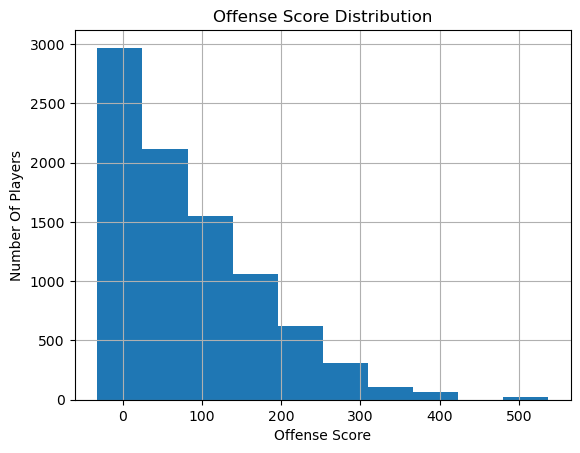

In [2076]:
# check on distributions
all_years_df_new['off_score'].hist()
plt.xlabel('Offense Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Offense Score Distribution') # label for the whole plot

<Axes: >

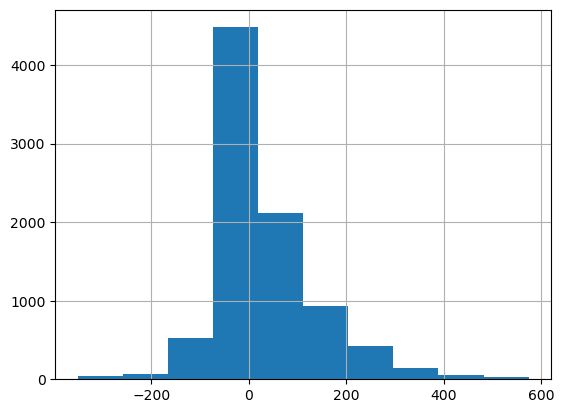

In [1912]:
# defense score distributions
all_years_df_new['def_score'].hist()
plt.xlabel('Defense Score') # add a label for the x-axis
plt.ylabel('Number Of Players')         # add a label for the y-axis
plt.title('Defense Score Distribution') # label for the whole plot

Creating the elite/sub-elite threshold here.

In [1913]:
all_years_df_new['is_good'] = np.where(((all_years_df_new['off_score']>200) & (all_years_df_new['def_score']>25)), 1, 0)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3446053949.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1914]:
# value counts
all_years_df_new['is_good'].value_counts()

0    8037
1     784
Name: is_good, dtype: int64

In [1915]:
# logisitc regresion on all but the engineered features
y = all_years_df_new['is_good']
X = all_years_df_new.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1916]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_primaryAssists  I_F_secondaryAssists  \
name                                                                           
Frans Nielsen       1.0        5.0                 4.0                   4.0   
Brandon Sutter      1.0        0.0                 3.0                   2.0   
Martins Karsums     1.0        1.0                 3.0                   0.0   
Brendan Morrison    1.0       13.0                 7.0                   3.0   
Wojtek Wolski       1.0       10.0                11.0                   5.0   

                  I_F_shotsOnGoal  shotsBlockedByPlayer  penalityMinutesDrawn  \
name                                                                            
Frans Nielsen                66.0                  30.0                  43.0   
Brandon Sutter               51.0                   8.0                  26.0   
Martins Karsums              28.0                  12.0                  10.0   
Brendan Morrison             88.0                  11.0                  26.0   
Wojtek Wolski               122.0                  25.0                  30.0   

                  penalityMinutes  faceoffsWon  faceoffsLost  ...  \
name                                                          ...   
Frans Nielsen                12.0        243.0         282.0  ...   
Brandon Sutter               16.0         93.0         123.0  ...   
Martins Karsums               6.0          1.0           1.0  ...   
Brendan Morrison             26.0        153.0         175.0  ...   
Wojtek Wolski                18.0        185.0         203.0  ...   

                  OnIce_F_reboundGoals  OnIce_A_reboundGoals  \
name                                                           
Frans Nielsen                      5.0                   5.0   
Brandon Sutter                     3.0                   4.0   
Martins Karsums                    1.0                   1.0   
Brendan Morrison                   6.0                   9.0   
Wojtek Wolski                      7.0                   7.0   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftStarts  \
name                                                           
Frans Nielsen                    125.0                 112.0   
Brandon Sutter                    34.0                  56.0   
Martins Karsums                   50.0                  34.0   
Brendan Morrison                 100.0                 156.0   
Wojtek Wolski                    138.0                 155.0   

                  I_F_oZoneShiftEnds  I_F_dZoneShiftEnds  \
name                                                       
Frans Nielsen                  108.0               145.0   
Brandon Sutter                  92.0                56.0   
Martins Karsums                 62.0                42.0   
Brendan Morrison               205.0               200.0   
Wojtek Wolski                  212.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_F_lowDangerShots  \
name                                                                  
Frans Nielsen                          66.0                   371.0   
Brandon Sutter                         29.0                   193.0   
Martins Karsums                        32.0                   120.0   
Brendan Morrison                       88.0                   488.0   
Wojtek Wolski                         118.0                   475.0   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
name                                                                 
Frans Nielsen                          75.0                   383.0  
Brandon Sutter                         31.0                   195.0  
Martins Karsums                        37.0                   119.0  
Brendan Morrison                       93.0                   488.0  
Wojtek Wolski                         130.0                   589.0  

[5 rows x 26 columns]

In [1917]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.221612
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8795
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2611
Time:                        15:27:21   Log-Likelihood:                -1954.8
converged:                       True   LL-Null:                       -2645.7
Covariance Type:            nonrobust   LLR p-value:                2.953e-276
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.6061      0.112    -32.096      0.000      -3.826      -3.386
I_F_goals                     0.0551      0.018      3.073      0.002       0.020       0.090
I_F_primaryAssists           -0.0160      0.017     -0.961      0.336      -0.049       0.017
I_F_secondaryAssists         -0.0316      0.021     -1.516      0.130      -0.072       0.009
I_F_shotsOnGoal               0.0120      0.002      5.187      0.000       0.007       0.017
shotsBlockedByPlayer          0.0028      0.005      0.622      0.534      -0.006       0.012
penalityMinutesDrawn          0.0194      0.004      5.031      0.000       0.012       0.027
penalityMinutes              -0.0320      0.004     -7.951      0.000      -0.040      -0.024
faceoffsWon                   0.0036      0.001      3.290      0.001       0.001       0.006
faceoffsLost                 -0.0003      0.001     -0.222      0.824      -0.002       0.002
OnIce_F_goals                 0.0014      0.012      0.111      0.912      -0.023       0.025
OnIce_A_goals                 0.0114      0.008      1.424      0.154      -0.004       0.027
I_F_takeaways                 0.0057      0.005      1.153      0.249      -0.004       0.015
I_F_giveaways                 0.0236      0.005      5.100      0.000       0.015       0.033
OnIce_F_highDangerShots       0.0358      0.007      5.325      0.000       0.023       0.049
OnIce_A_highDangerShots       0.0040      0.008      0.535      0.593      -0.011       0.019
OnIce_F_reboundGoals         -0.0515      0.019     -2.677      0.007      -0.089      -0.014
OnIce_A_reboundGoals         -0.0054      0.020     -0.266      0.791      -0.045       0.035
I_F_dZoneShiftStarts          0.0044      0.002      2.902      0.004       0.001       0.007
I_F_oZoneShiftStarts          0.0020      0.002      1.266      0.205      -0.001       0.005
I_F_oZoneShiftEnds           -0.0022      0.002     -1.268      0.205      -0.006       0.001
I_F_dZoneShiftEnds           -0.0056      0.002     -2.372      0.018      -0.010      -0.001
OnIce_F_mediumDangerShots     0.0154      0.003      5.225      0.000       0.010       0.021
OnIce_F_lowDangerShots     5.783e-05      0.001      0.055      0.956      -0.002       0.002
OnIce_A_mediumDangerShots    -0.0082      0.003     -2.538      0.011      -0.015      -0.002
OnIce_A_lowDangerShots       -0.0064      0.001     -5.427      0.000      -0.009      -0.004
=============================================================================================
"""

In this logistic regression, low danger shots for has a really high p-value, almost 1. It's interesting to see that change. In the single season, faceoffs lost had a high p-value in the unsalced data, but was a huge determinant in the scaled data. 

In [1918]:
# drop the high p-values
all_years_df_new.drop(columns = 'I_F_primaryAssists', inplace = True)
all_years_df_new.drop(columns = 'I_F_secondaryAssists', inplace = True)
all_years_df_new.drop(columns = 'shotsBlockedByPlayer', inplace = True)
all_years_df_new.drop(columns = 'faceoffsLost', inplace = True)
all_years_df_new.drop(columns = 'OnIce_F_goals', inplace = True)
all_years_df_new.drop(columns = 'OnIce_A_goals', inplace = True)
all_years_df_new.drop(columns = 'I_F_takeaways', inplace = True)
all_years_df_new.drop(columns = 'OnIce_A_highDangerShots', inplace = True)
all_years_df_new.drop(columns = 'OnIce_A_reboundGoals', inplace = True)
all_years_df_new.drop(columns = 'I_F_oZoneShiftStarts', inplace = True)
all_years_df_new.drop(columns = 'OnIce_F_lowDangerShots', inplace = True)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3609403741.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3609403741.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3609403741.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipyker

In [1919]:
# sanity check
all_years_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8821 entries, Frans Nielsen to Tyler Pitlick
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   I_F_goals                  8821 non-null   float64
 1   I_F_shotsOnGoal            8821 non-null   float64
 2   penalityMinutesDrawn       8821 non-null   float64
 3   penalityMinutes            8821 non-null   float64
 4   faceoffsWon                8821 non-null   float64
 5   I_F_giveaways              8821 non-null   float64
 6   OnIce_F_highDangerShots    8821 non-null   float64
 7   OnIce_F_reboundGoals       8821 non-null   float64
 8   I_F_dZoneShiftStarts       8821 non-null   float64
 9   I_F_oZoneShiftEnds         8821 non-null   float64
 10  I_F_dZoneShiftEnds         8821 non-null   float64
 11  OnIce_F_mediumDangerShots  8821 non-null   float64
 12  OnIce_A_mediumDangerShots  8821 non-null   float64
 13  OnIce_A_lowDangerShots     8821 

In [1920]:
# run it again
y = all_years_df_new['is_good']
X = all_years_df_new.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1921]:
# add the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_shotsOnGoal  penalityMinutesDrawn  \
name                                                                        
Frans Nielsen       1.0        5.0             66.0                  43.0   
Brandon Sutter      1.0        0.0             51.0                  26.0   
Martins Karsums     1.0        1.0             28.0                  10.0   
Brendan Morrison    1.0       13.0             88.0                  26.0   
Wojtek Wolski       1.0       10.0            122.0                  30.0   

                  penalityMinutes  faceoffsWon  I_F_giveaways  \
name                                                            
Frans Nielsen                12.0        243.0           16.0   
Brandon Sutter               16.0         93.0            4.0   
Martins Karsums               6.0          1.0            6.0   
Brendan Morrison             26.0        153.0           24.0   
Wojtek Wolski                18.0        185.0           34.0   

                  OnIce_F_highDangerShots  OnIce_F_reboundGoals  \
name                                                              
Frans Nielsen                        20.0                   5.0   
Brandon Sutter                       15.0                   3.0   
Martins Karsums                       3.0                   1.0   
Brendan Morrison                     20.0                   6.0   
Wojtek Wolski                        25.0                   7.0   

                  I_F_dZoneShiftStarts  I_F_oZoneShiftEnds  \
name                                                         
Frans Nielsen                    125.0               108.0   
Brandon Sutter                    34.0                92.0   
Martins Karsums                   50.0                62.0   
Brendan Morrison                 100.0               205.0   
Wojtek Wolski                    138.0               212.0   

                  I_F_dZoneShiftEnds  OnIce_F_mediumDangerShots  \
name                                                              
Frans Nielsen                  145.0                       66.0   
Brandon Sutter                  56.0                       29.0   
Martins Karsums                 42.0                       32.0   
Brendan Morrison               200.0                       88.0   
Wojtek Wolski                  177.0                      118.0   

                  OnIce_A_mediumDangerShots  OnIce_A_lowDangerShots  
name                                                                 
Frans Nielsen                          75.0                   383.0  
Brandon Sutter                         31.0                   195.0  
Martins Karsums                        37.0                   119.0  
Brendan Morrison                       93.0                   488.0  
Wojtek Wolski                         130.0                   589.0

In [1922]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model 
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.222210
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8806
Method:                           MLE   Df Model:                           14
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2591
Time:                        15:27:22   Log-Likelihood:                -1960.1
converged:                       True   LL-Null:                       -2645.7
Covariance Type:            nonrobust   LLR p-value:                2.528e-284
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.5854      0.111    -32.264      0.000      -3.803      -3.368
I_F_goals                     0.0591      0.013      4.563      0.000       0.034       0.084
I_F_shotsOnGoal               0.0125      0.002      6.221      0.000       0.009       0.016
penalityMinutesDrawn          0.0193      0.004      5.079      0.000       0.012       0.027
penalityMinutes              -0.0324      0.004     -8.216      0.000      -0.040      -0.025
faceoffsWon                   0.0035      0.000     12.375      0.000       0.003       0.004
I_F_giveaways                 0.0237      0.004      5.492      0.000       0.015       0.032
OnIce_F_highDangerShots       0.0389      0.006      6.076      0.000       0.026       0.051
OnIce_F_reboundGoals         -0.0621      0.018     -3.397      0.001      -0.098      -0.026
I_F_dZoneShiftStarts          0.0046      0.001      3.264      0.001       0.002       0.007
I_F_oZoneShiftEnds           -0.0018      0.002     -1.183      0.237      -0.005       0.001
I_F_dZoneShiftEnds           -0.0048      0.002     -2.262      0.024      -0.009      -0.001
OnIce_F_mediumDangerShots     0.0144      0.003      5.638      0.000       0.009       0.019
OnIce_A_mediumDangerShots    -0.0058      0.003     -2.069      0.039      -0.011      -0.000
OnIce_A_lowDangerShots       -0.0059      0.001     -5.422      0.000      -0.008      -0.004
=============================================================================================
"""

In [1923]:
#drop the high p-values
all_years_df_new.drop(columns = 'I_F_oZoneShiftEnds', inplace = True)

/var/folders/0k/4_3b0kpd5nsc5v58ybw30tc00000gp/T/ipykernel_34828/3432139896.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1924]:
# run it again
y = all_years_df_new['is_good']
X = all_years_df_new.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1925]:
X_withconstant = sm.add_constant(X)
X_withconstant.head()

const  I_F_goals  I_F_shotsOnGoal  penalityMinutesDrawn  \
name                                                                        
Frans Nielsen       1.0        5.0             66.0                  43.0   
Brandon Sutter      1.0        0.0             51.0                  26.0   
Martins Karsums     1.0        1.0             28.0                  10.0   
Brendan Morrison    1.0       13.0             88.0                  26.0   
Wojtek Wolski       1.0       10.0            122.0                  30.0   

                  penalityMinutes  faceoffsWon  I_F_giveaways  \
name                                                            
Frans Nielsen                12.0        243.0           16.0   
Brandon Sutter               16.0         93.0            4.0   
Martins Karsums               6.0          1.0            6.0   
Brendan Morrison             26.0        153.0           24.0   
Wojtek Wolski                18.0        185.0           34.0   

                  OnIce_F_highDangerShots  OnIce_F_reboundGoals  \
name                                                              
Frans Nielsen                        20.0                   5.0   
Brandon Sutter                       15.0                   3.0   
Martins Karsums                       3.0                   1.0   
Brendan Morrison                     20.0                   6.0   
Wojtek Wolski                        25.0                   7.0   

                  I_F_dZoneShiftStarts  I_F_dZoneShiftEnds  \
name                                                         
Frans Nielsen                    125.0               145.0   
Brandon Sutter                    34.0                56.0   
Martins Karsums                   50.0                42.0   
Brendan Morrison                 100.0               200.0   
Wojtek Wolski                    138.0               177.0   

                  OnIce_F_mediumDangerShots  OnIce_A_mediumDangerShots  \
name                                                                     
Frans Nielsen                          66.0                       75.0   
Brandon Sutter                         29.0                       31.0   
Martins Karsums                        32.0                       37.0   
Brendan Morrison                       88.0                       93.0   
Wojtek Wolski                         118.0                      130.0   

                  OnIce_A_lowDangerShots  
name                                      
Frans Nielsen                      383.0  
Brandon Sutter                     195.0  
Martins Karsums                    119.0  
Brendan Morrison                   488.0  
Wojtek Wolski                      589.0

In [1926]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.222290
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_good   No. Observations:                 8821
Model:                          Logit   Df Residuals:                     8807
Method:                           MLE   Df Model:                           13
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2589
Time:                        15:27:23   Log-Likelihood:                -1960.8
converged:                       True   LL-Null:                       -2645.7
Covariance Type:            nonrobust   LLR p-value:                4.838e-285
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.6133      0.109    -33.051      0.000      -3.828      -3.399
I_F_goals                     0.0619      0.013      4.866      0.000       0.037       0.087
I_F_shotsOnGoal               0.0122      0.002      6.130      0.000       0.008       0.016
penalityMinutesDrawn          0.0188      0.004      4.992      0.000       0.011       0.026
penalityMinutes              -0.0323      0.004     -8.199      0.000      -0.040      -0.025
faceoffsWon                   0.0035      0.000     12.558      0.000       0.003       0.004
I_F_giveaways                 0.0241      0.004      5.605      0.000       0.016       0.033
OnIce_F_highDangerShots       0.0387      0.006      6.048      0.000       0.026       0.051
OnIce_F_reboundGoals         -0.0631      0.018     -3.460      0.001      -0.099      -0.027
I_F_dZoneShiftStarts          0.0038      0.001      3.055      0.002       0.001       0.006
I_F_dZoneShiftEnds           -0.0055      0.002     -2.725      0.006      -0.009      -0.002
OnIce_F_mediumDangerShots     0.0139      0.003      5.523      0.000       0.009       0.019
OnIce_A_mediumDangerShots    -0.0056      0.003     -2.002      0.045      -0.011      -0.000
OnIce_A_lowDangerShots       -0.0059      0.001     -5.468      0.000      -0.008      -0.004
=============================================================================================
"""

Interesting changes between the scaled an unscaled data. This model favors goals scored by the player the most. This was one of my intial assumptions. Scoring more goals than the other team is how you win games, so I thought it would have a higher coefficient every time I ran these regressions. It's only on the uncaled full data that this pops up.


Next, since I've reduced the dimensionality, I'll move on to a KNN.

# KNN on All Years

I'll start in the same way as with the single year dataframe. I'll have my elite classifier as the target variable and use all o the features except ofeense, denfense and two way score.

In [1927]:
y = scaled_all_ml_df['is_good']

In [1928]:
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1929]:
X.shape

(8821, 13)

In [1930]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [1931]:
# default KNN

# 1) instantiate

KNN_all = KNeighborsClassifier()

# 2) fit (on training data)

KNN_all.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {KNN_all.score(X_train,y_train)}")
print(f"Test set accuracy: {KNN_all.score(X_test,y_test)}")

Score on training set: 0.9428247489471979
Test set accuracy: 0.9293539856441254


Pretty accurate! Let;s see if we can optimize it a bit more.

In [1932]:
# this takes a while to run, you might want to get a coffee or something
candidate_ks = list(range(1,len(X_train),100))

# two empty lists to capture train and test accuracies corresponding to each k

train_accs = []
test_accs = []

for k in candidate_ks:
    
    # 1) instantiate

    players_knn = KNeighborsClassifier(n_neighbors = k)

# 2) fit (on training data)

    players_knn.fit(X_train,y_train)
    
    # 3) store accuracies in lists
    
    train_accs.append(players_knn.score(X_train,y_train))
    test_accs.append(players_knn.score(X_test,y_test))
    
    print(f"fitting with k = {k}")

fitting with k = 1
fitting with k = 101
fitting with k = 201
fitting with k = 301
fitting with k = 401
fitting with k = 501
fitting with k = 601
fitting with k = 701
fitting with k = 801
fitting with k = 901
fitting with k = 1001
fitting with k = 1101
fitting with k = 1201
fitting with k = 1301
fitting with k = 1401
fitting with k = 1501
fitting with k = 1601
fitting with k = 1701
fitting with k = 1801
fitting with k = 1901
fitting with k = 2001
fitting with k = 2101
fitting with k = 2201
fitting with k = 2301
fitting with k = 2401
fitting with k = 2501
fitting with k = 2601
fitting with k = 2701
fitting with k = 2801
fitting with k = 2901
fitting with k = 3001
fitting with k = 3101
fitting with k = 3201
fitting with k = 3301
fitting with k = 3401
fitting with k = 3501
fitting with k = 3601
fitting with k = 3701
fitting with k = 3801
fitting with k = 3901
fitting with k = 4001
fitting with k = 4101
fitting with k = 4201
fitting with k = 4301
fitting with k = 4401
fitting with k = 4501


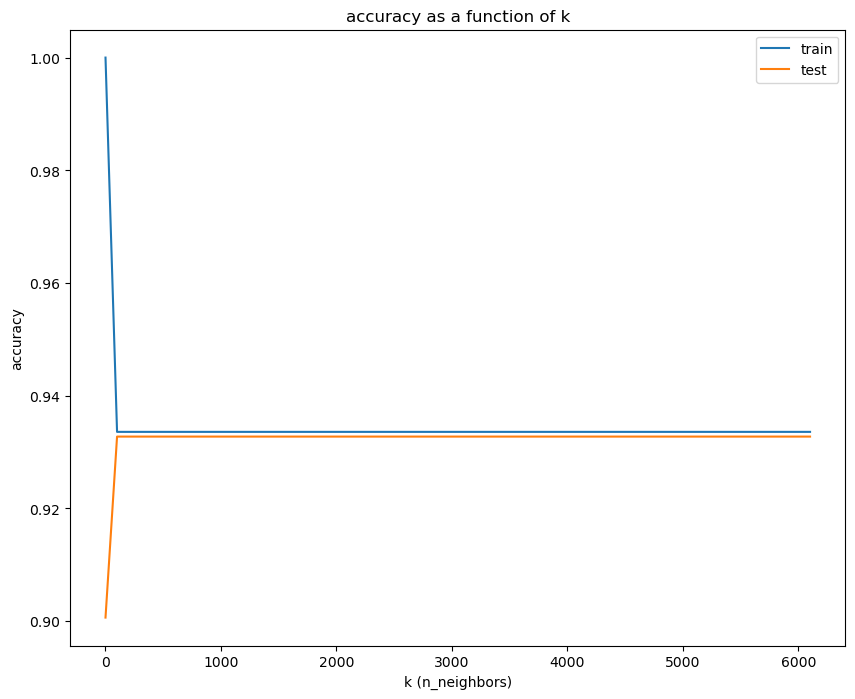

In [1933]:
plt.figure(figsize = (10,8))
plt.plot(candidate_ks,train_accs,label = "train")
plt.plot(candidate_ks,test_accs,label = "test")
plt.title("accuracy as a function of k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("accuracy")
plt.legend()
plt.show()

This looks like 10 to me. I'll give that a try and see if it comes out more accurate.

In [1934]:
# default KNN

# 1) instantiate

KNN_all = KNeighborsClassifier(n_neighbors = 10)

# 2) fit (on training data)

KNN_all.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {KNN_all.score(X_train,y_train)}")
print(f"Test set accuracy: {KNN_all.score(X_test,y_test)}")

Score on training set: 0.9382896015549077
Test set accuracy: 0.9342652058934643


Awesome! The test set is 1% more accurate and is a near perfect fit with the training set!


Next, I'll try and fit the KNN with my engineered features, the offense and defense scores.

In [1935]:
# target variable
y = scaled_all_ml_df['is_good']

In [1936]:
# drop all but offense and defense scores
X = scaled_all_ml_df.drop(columns=['OnIce_A_mediumDangerShots','I_F_primaryAssists','I_F_secondaryAssists','penalityMinutes','faceoffsWon','OnIce_F_highDangerShots','OnIce_A_highDangerShots','OnIce_A_reboundGoals','I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','OnIce_F_mediumDangerShots','OnIce_F_lowDangerShots','OnIce_A_lowDangerShots','two_way_score','is_good'], axis = 1)

In [1937]:
# sanity check
X

off_score  def_score
name                                   
Frans Nielsen      -0.563079  -0.554165
Brandon Sutter      0.493803   0.228372
Martins Karsums    -0.495618   0.056596
Brendan Morrison   -0.428157  -0.477820
Wojtek Wolski      -0.349454   0.457407
...                      ...        ...
Oskar Lindblom     -0.079611  -0.582794
Vinnie Hinostroza  -0.338210   0.180656
Rasmus Asplund     -0.473131   0.314260
Ross Johnston      -0.945355  -1.031321
Tyler Pitlick       0.212717  -0.105638

[8821 rows x 2 columns]

In [1938]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [1939]:
# default KNN

# 1) instantiate

off_def_all = KNeighborsClassifier()

# 2) fit (on training data)

off_def_all.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {off_def_all.score(X_train,y_train)}")
print(f"Test set accuracy: {off_def_all.score(X_test,y_test)}")

Score on training set: 0.9996760609005507
Test set accuracy: 0.9988666414809217


This is a great accuracy. Again, these are features that created the target variable, so they should be accurate. It's good to see this comparison again. My engineered features are as close to perfect as you can get, but the raw statistics aren't far behind!

Finally, I'll run the KNN with low danger shots for and against as the dependent variables. these variables were consistently the higest coefficients in my logistic regressions. I'd like to see how they perform as classifiers in the KNN.

I won't run the nearest neighbors finder on this, as it's about as accurate as you can get. It also takes a long time.

In [1940]:
y = scaled_all_ml_df['is_good']

In [1941]:
X = scaled_all_ml_df.drop(columns=['OnIce_A_mediumDangerShots','I_F_primaryAssists','I_F_secondaryAssists','penalityMinutes','faceoffsWon','OnIce_F_highDangerShots','OnIce_A_highDangerShots','OnIce_A_reboundGoals','I_F_dZoneShiftStarts','I_F_oZoneShiftStarts','OnIce_F_mediumDangerShots','off_score','def_score','two_way_score','is_good'], axis = 1)

In [1942]:
X

OnIce_F_lowDangerShots  OnIce_A_lowDangerShots
name                                                             
Frans Nielsen                    0.326688                0.405509
Brandon Sutter                  -0.503350               -0.513918
Martins Karsums                 -0.843759               -0.885601
Brendan Morrison                 0.872275                0.919018
Wojtek Wolski                    0.811655                1.412966
...                                   ...                     ...
Oskar Lindblom                   0.046900                0.366384
Vinnie Hinostroza               -0.596613               -0.685088
Rasmus Asplund                  -0.461382               -0.249828
Ross Johnston                   -1.216810               -1.086115
Tyler Pitlick                   -0.209573               -0.010190

[8821 rows x 2 columns]

In [1943]:
# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [1944]:
# default KNN

# 1) instantiate

ldsfa_all = KNeighborsClassifier()

# 2) fit (on training data)

ldsfa_all.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {ldsfa_all.score(X_train,y_train)}")
print(f"Test set accuracy: {ldsfa_all.score(X_test,y_test)}")

Score on training set: 0.9361839974084872
Test set accuracy: 0.927087268605969


In [1945]:
# this takes a while to run, you might want to get a coffee or something
candidate_ks = list(range(1,len(X_train),100))

# two empty lists to capture train and test accuracies corresponding to each k

train_accs = []
test_accs = []

for k in candidate_ks:
    
    # 1) instantiate

    players_knn = KNeighborsClassifier(n_neighbors = k)

# 2) fit (on training data)

    players_knn.fit(X_train,y_train)
    
    # 3) store accuracies in lists
    
    train_accs.append(players_knn.score(X_train,y_train))
    test_accs.append(players_knn.score(X_test,y_test))
    
    print(f"fitting with k = {k}")

fitting with k = 1
fitting with k = 101
fitting with k = 201
fitting with k = 301
fitting with k = 401
fitting with k = 501
fitting with k = 601
fitting with k = 701
fitting with k = 801
fitting with k = 901
fitting with k = 1001
fitting with k = 1101
fitting with k = 1201
fitting with k = 1301
fitting with k = 1401
fitting with k = 1501
fitting with k = 1601
fitting with k = 1701
fitting with k = 1801
fitting with k = 1901
fitting with k = 2001
fitting with k = 2101
fitting with k = 2201
fitting with k = 2301
fitting with k = 2401
fitting with k = 2501
fitting with k = 2601
fitting with k = 2701
fitting with k = 2801
fitting with k = 2901
fitting with k = 3001
fitting with k = 3101
fitting with k = 3201
fitting with k = 3301
fitting with k = 3401
fitting with k = 3501
fitting with k = 3601
fitting with k = 3701
fitting with k = 3801
fitting with k = 3901
fitting with k = 4001
fitting with k = 4101
fitting with k = 4201
fitting with k = 4301
fitting with k = 4401
fitting with k = 4501


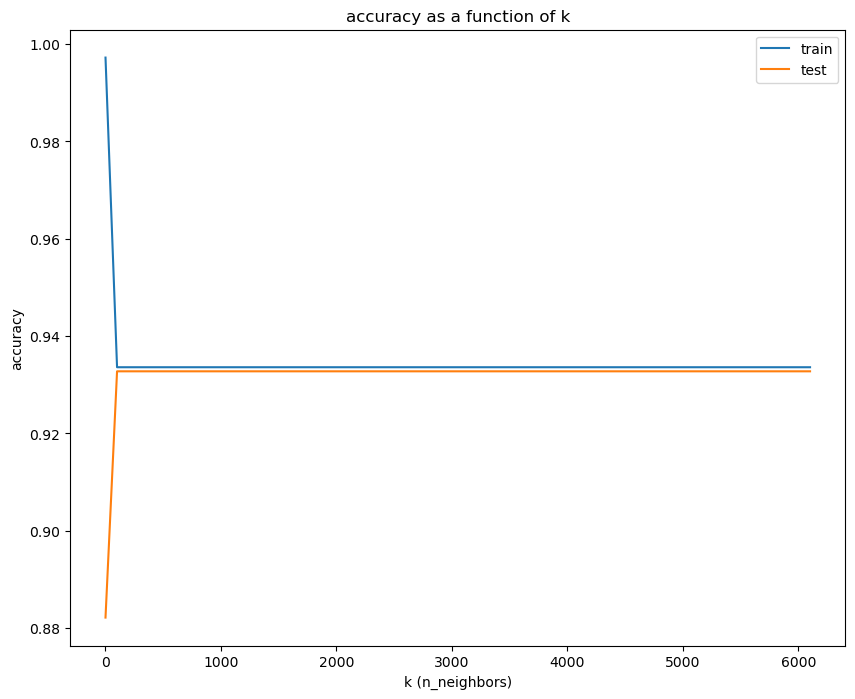

In [1946]:
plt.figure(figsize = (10,8))
plt.plot(candidate_ks,train_accs,label = "train")
plt.plot(candidate_ks,test_accs,label = "test")
plt.title("accuracy as a function of k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [1947]:
# default KNN

# 1) instantiate

ldsfa_all = KNeighborsClassifier(n_neighbors = 10)

# 2) fit (on training data)

ldsfa_all.fit(X_train,y_train)

# 3) score/evaluate

print(f"Score on training set: {ldsfa_all.score(X_train,y_train)}")
print(f"Test set accuracy: {ldsfa_all.score(X_test,y_test)}")

Score on training set: 0.9347262714609653
Test set accuracy: 0.9327540612013601


One percent better! I'll move on to the decision trees to see how the model decides how to split the players.

# Decision Trees

Starting the same way, with the tree testing against all of the features except my engineered ones.

In [1948]:
# all but my enigneered features
y = scaled_all_ml_df['is_good']
X = scaled_all_ml_df.drop(columns=['two_way_score','off_score','def_score','is_good'], axis = 1)

In [1949]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1950]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

# Visualize its results
#PlotBoundaries(DT_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 1.0
DT test set accuracy: 0.8919531545145448


This iactually a bit overfit. I'll look to optimize the run dpeth to get a better result

In [1951]:
# for fitting the tree
for depth in range(1,11):
    DT_model = DecisionTreeClassifier(max_depth=depth)
    DT_model.fit(X_train, y_train)
    train_acc = DT_model.score(X_train,y_train)
    test_acc = DT_model.score(X_test,y_test)
    print("Run depth={} Train_acc={:.2f} Test_acc={:.2f}".format(depth,train_acc,test_acc))

Run depth=1 Train_acc=0.93 Test_acc=0.94
Run depth=2 Train_acc=0.93 Test_acc=0.94
Run depth=3 Train_acc=0.93 Test_acc=0.94
Run depth=4 Train_acc=0.94 Test_acc=0.94
Run depth=5 Train_acc=0.94 Test_acc=0.93
Run depth=6 Train_acc=0.95 Test_acc=0.93
Run depth=7 Train_acc=0.95 Test_acc=0.93
Run depth=8 Train_acc=0.96 Test_acc=0.92
Run depth=9 Train_acc=0.97 Test_acc=0.92
Run depth=10 Train_acc=0.97 Test_acc=0.92


Text(0.5, 0, 'Max_Depth')

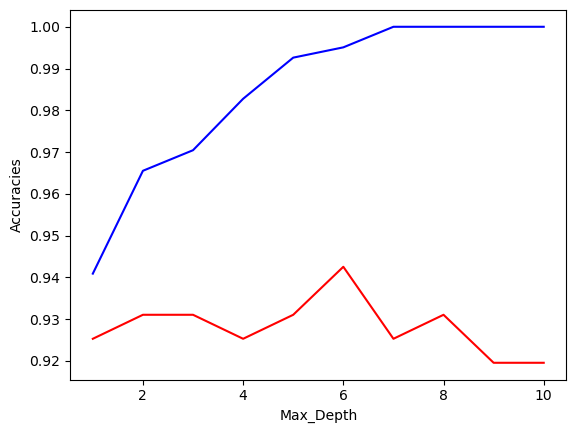

In [1952]:
fig,ax = plt.subplots()
ax.plot(depths,train_scores,color='blue')
ax.plot(depths,test_scores,color='r')
ax.set_ylabel("Accuracies")
ax.set_xlabel("Max_Depth")

It looks like the best fit happens at a run depth of 3 by this chart. It's the highest test accuracy before overfitting begins.

The spike at 8 looks promising, but I don't like the opverfitting trend it presents. I find these decision trees get overfit very quickly. I'd like to keep this as small as possible.

In [1953]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=4,min_samples_leaf=5)
DT_model.fit(X_train, y_train)

# Visualize its results
#PlotBoundaries(DT_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.9369938451571105
DT test set accuracy: 0.9361541367585946


Perfect! Not 100% on the accuracy, but there's no overfitting and a nearly perfect fit on the train and test accuracy.

Now, let's visualize the decisions this model made.

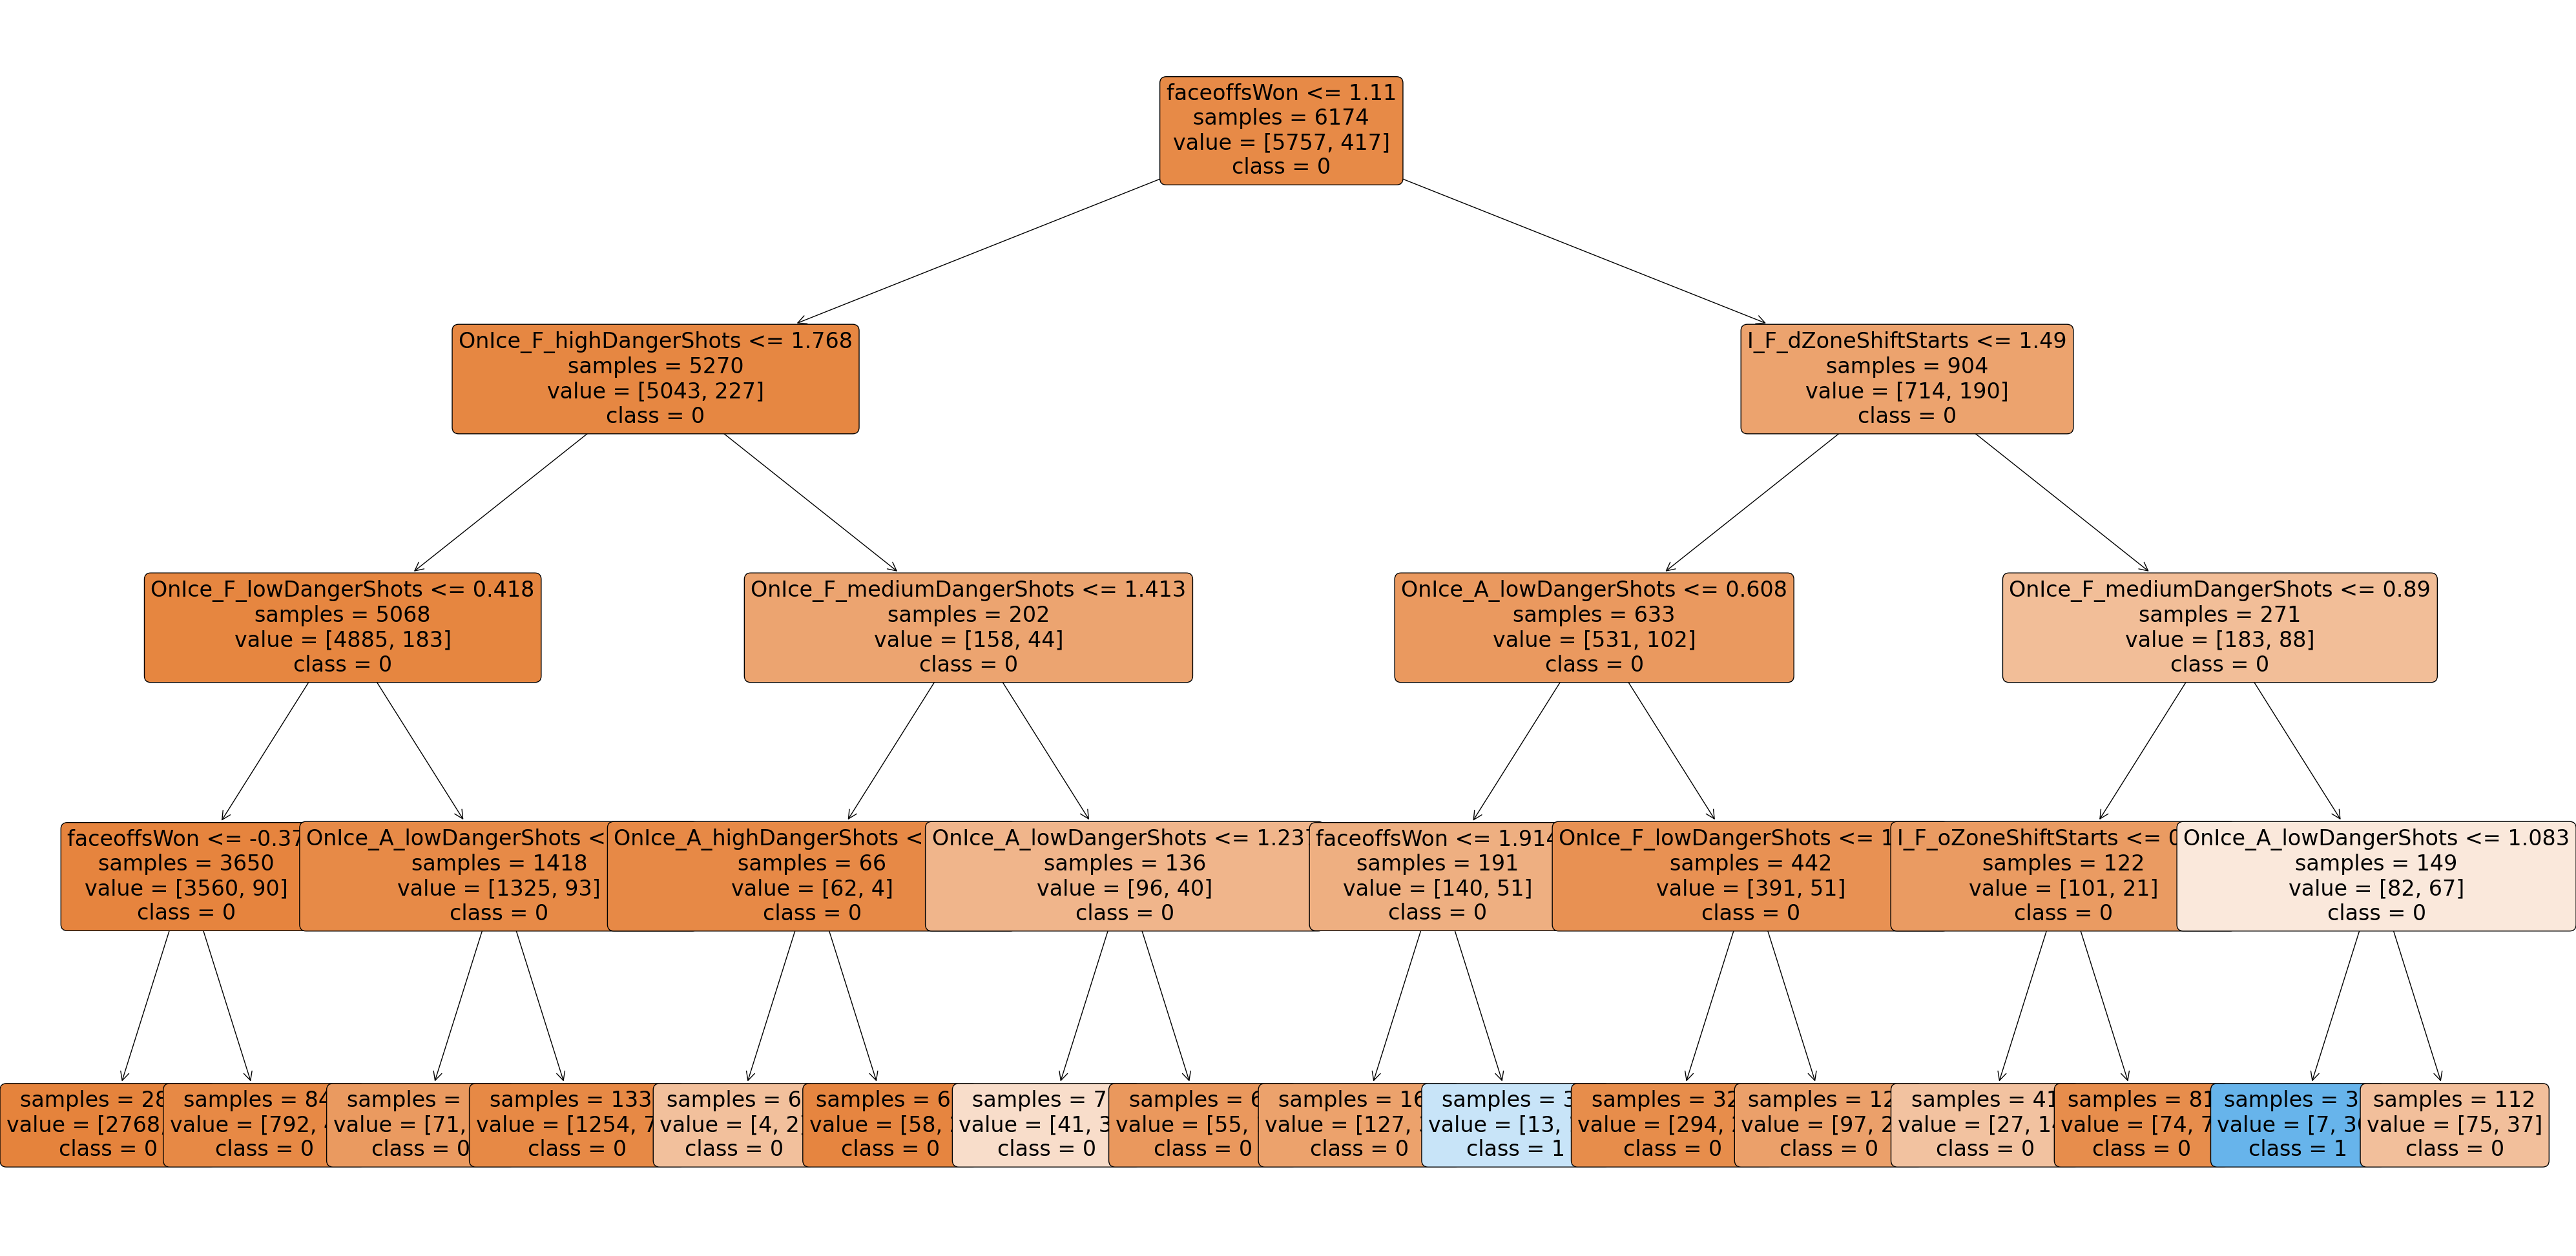

In [1954]:
# size for our tree figure
fig, ax = plt.subplots(figsize=(50,25))

plot_tree(DT_model,
          feature_names=X.columns,
          class_names=["0","1"],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=24);

Interesting to see how this splits the players! Faceoffs won is in the exact same spot as the smaller dataset decision tree, right at the top.

This makes me think that the main differentiator between being an elite two way forward and not is being a centre. Typically, this position is thought of as being a two way forward, so thia makes sense. centres are tasked with playing on offense and defense, so naturally these players might have to become good at both.

The NHL awards a trophy for the best defensive forward every year, called the Frank J Selke Trophy. In 44 years of awarding this trophy, they've only given it to a player who isn't a centre 10 times.

# Conclusions

I was happy to find that my classifier for elite vs non-elite two way forwards was an awesome success! The features that I engineered helped shed some light on who exactly these players were.

My assumptions about which features would predict a player's performance were wildly incorrect. I thought that goals and high danger shots for and against would be the main determinants of two way success. It turns out that low danger shots for and against and whether you win faceoffss are the biggest determinants!

I'm happy to have conducted this analysis for my capstone project, thanks for reading!

# Next Steps

I have a few things I'd like to add or try for the next project I do. I found that players who play with an elite two way forward can become elite for the time they play with them. Having looked back at my statistics I've found that al ot of the features deal with "line statistics" not necessarily individual statistics.

Take the puck transportation feature.

puck transportation = ('I_F_dZoneShiftStarts' - 'I_F_oZoneShiftStarts') + ('I_F_oZoneShiftEnds' - 'I_F_dZoneShiftEnds')

This can have the same effect for all the players who were on the ice for the same shift. So, if there was an elite two way player on the ice with you, this feature would consider you the same as the elite forward.

Going forward I'd like to find more microstatistics that will help me differentiate individual impacts, to make sure I'm not misclassifying any players.

Also, I'd like to include a player's position in the analysis. Seeing faceoffs won as major determinant of elite two way players was eye opening. I think the effect of winning faceoffs is understated, but seeing this underscored that for me. I'd like to see if being a centre is the determiningf factor or being good at taking faceoffs is more important.

I'm most excited about the fact that I have way more questions than answers. Ican't wait to improve my technical and analytical skills! 

 ### Justin Anto